Draft to measure emmsion lines.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interpolate
from craftroom import resample
from astropy.convolution import convolve, Box1DKernel
from astropy.modeling import models, fitting
from scipy.optimize import leastsq
from astropy.modeling import functional_models
from matplotlib.gridspec import GridSpec

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20


In [2]:
# path = '/media/david/1tb_storage1/emergency_data/mega_muscles/v01_seds/'
path = '/media/david/2tb_ext_hd/hddata/mega_muscles/v10_seds/'

In [3]:
hdul = fits.open('{}hlsp_muscles_multi_multi_gj1132_broadband_v10_var-res-sed.fits'.format(path))

In [4]:
data = hdul[1].data
inst_list = hdul[2].data
inst_list

FITS_rec([(     1, 'HST', 'COS', 'G130M', 'hlsp_muscles_hst_cos_gj1132_g130m_v10_component-spec.fits'),
          (     2, 'HST', 'COS', 'G160M', 'hlsp_muscles_hst_cos_gj1132_g160m_v10_component-spec.fits'),
          ( 65536, 'MOD', 'LYA', 'YOUNG', 'hlsp_muscles_mod_lya_gj1132_young_v10_component-spec.fits'),
          (     8, 'HST', 'STS', 'G140M', 'hlsp_muscles_hst_sts_gj1132_g140m_v10_component-spec.fits'),
          (   128, 'HST', 'STS', 'G230L', 'hlsp_muscles_hst_sts_gj1132_g230l_v10_component-spec.fits'),
          (  1024, 'MOD', 'GAP', 'FILL-', 'hlsp_muscles_mod_gap_gj1132_fill-_v10_component-spec.fits'),
          (131072, 'MOD', 'PHX', 'NA', 'hlsp_muscles_mod_phx_gj1132_na_v10_component-spec.fits'),
          (   256, 'HST', 'STS', 'G430L', 'hlsp_muscles_hst_sts_gj1132_g430l_v10_component-spec.fits'),
          (  2048, 'XMM', 'EPC', 'MULTI', 'hlsp_muscles_xmm_epc_gj1132_multi_v10_component-spec.fits'),
          ( 32768, 'MOD', 'APC', 'NA', 'hlsp_muscles_mod_apc_gj1132_na

In [5]:
mask = (data['WAVELENGTH'] > 1160) & (data['WAVELENGTH'] < 2000) & (data['INSTRUMENT'] != 65536)

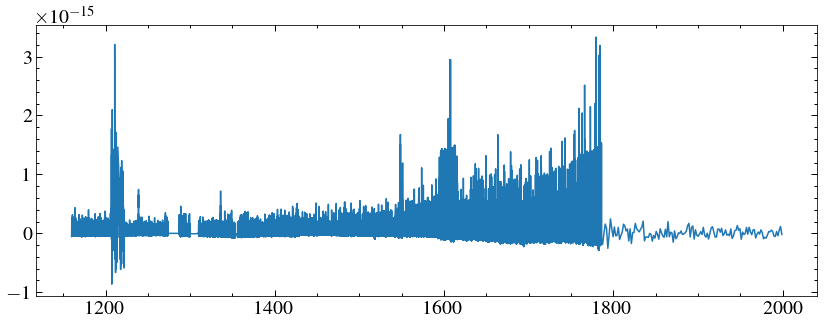

In [6]:
plt.plot(data['WAVELENGTH'][mask], data['FLUX'][mask])

In [7]:
line_list = Table.read('all_linelist.csv')

(1160.0, 1700.0)

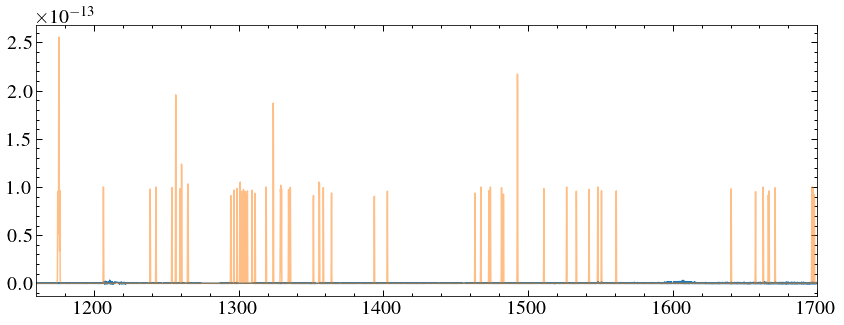

In [8]:
mod1 = models.Const1D(0)
for i in range(len(line_list)):
    amp = 1e-13
#     if line_list['Likelihood to measure'][i] == 'Low':
#         amp = amp/3
#     if line_list['Likelihood to measure'][i] == 'Medium':
#         amp = amp/2
    if line_list['Likelihood to measure'][i] in ['High', 'Medium']:
#     mod1 = mod1+ functional_models.Voigt1D(x_0=line_list['Wavelength'][i], amplitude_L=amp, fwhm_G=0.05, fwhm_L=0.05)
        mod1 = mod1 + models.Gaussian1D(amplitude=amp, mean = line_list['Wavelength'][i], stddev=0.1)


mw = np.arange(900, 1700, 0.1)
plt.plot(data['WAVELENGTH'][mask], data['FLUX'][mask])
plt.plot(mw, mod1(mw), alpha=0.5)
plt.xlim(1160, 1700)


In [9]:
# stars =[]
# for j, spec in enumerate(specs):
#     star = fits.getheader(spec)['TARGNAME']
#     stars.append(star)
# print(stars)

In [10]:
specs = glob.glob('{}*_var*'.format(path))
specs

['/media/david/2tb_ext_hd/hddata/mega_muscles/v10_seds/hlsp_muscles_multi_multi_gj1132_broadband_v10_var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v10_seds/hlsp_muscles_multi_multi_gj15a_broadband_v10_var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v10_seds/hlsp_muscles_multi_multi_gj163_broadband_v10_var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v10_seds/hlsp_muscles_multi_multi_gj649_broadband_v10_var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v10_seds/hlsp_muscles_multi_multi_gj676a_broadband_v10_var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v10_seds/hlsp_muscles_multi_multi_gj699_broadband_v10_var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v10_seds/hlsp_muscles_multi_multi_gj729_broadband_v10_var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v10_seds/hlsp_muscles_multi_multi_gj849_broadband_v10_var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/

What about just doublets to get the rv?

Measuring clean doublets that are detected in all stars to get velocities

GJ1132
0
4.4 km / s
Model: Voigt1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
           x_0             amplitude_L       ...         fwhm_G       
    ----------------- ---------------------- ... ---------------------
    1242.944312041775 1.3889578654126881e-16 ... -0.008579628880722032
1238.821 33.95526221361638 km / s 1.1597355471885074 km / s
1242.804 33.84644070237438 km / s 1.15601876910004 km / s
Model: Voigt1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
           x_0             amplitude_L      ...        fwhm_G      
    ------------------ -------------------- ... -------------------
    1335.9088981506084 9.08252018957767e-15 ... 0.22525244901544744
1334.524 44.90586750068188 km / s 1.062307690260969 km / s
1335.709 44.86602839430257 km / s 1.0613652435378285 km / s
Model: Voigt1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
           x_0              amplitude_L      ...       fwhm_G      
    ------------------ -------

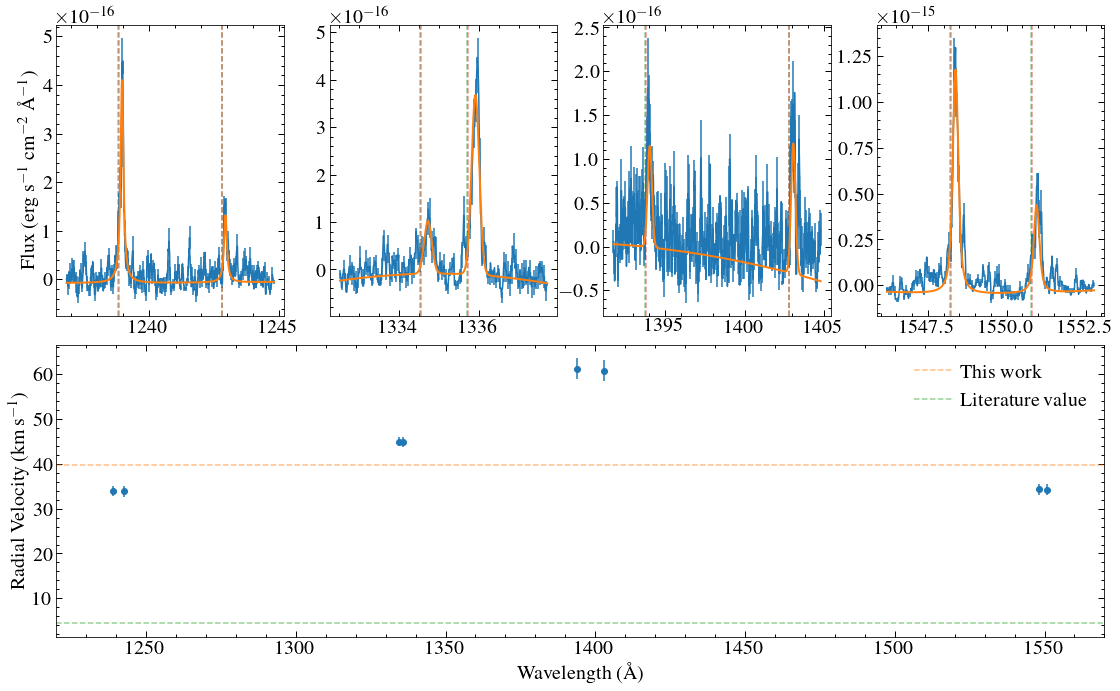

GJ15A
1
11.6 km / s
1238.821 -9.559433396363447 km / s 0.3881296858157368 km / s
1242.804 -9.528796849303351 km / s 0.38688578853489464 km / s
1334.524 -9.578376048728218 km / s 0.3690660060321065 km / s
1335.709 -9.569878407704259 km / s 0.36873858201312526 km / s
1393.755 -4.111483397058285 km / s 0.707907119986775 km / s
1402.77 -4.085060660038945 km / s 0.7033577051223208 km / s


/home/david/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:88: RuntimeWarning: divide by zero encountered in true_divide


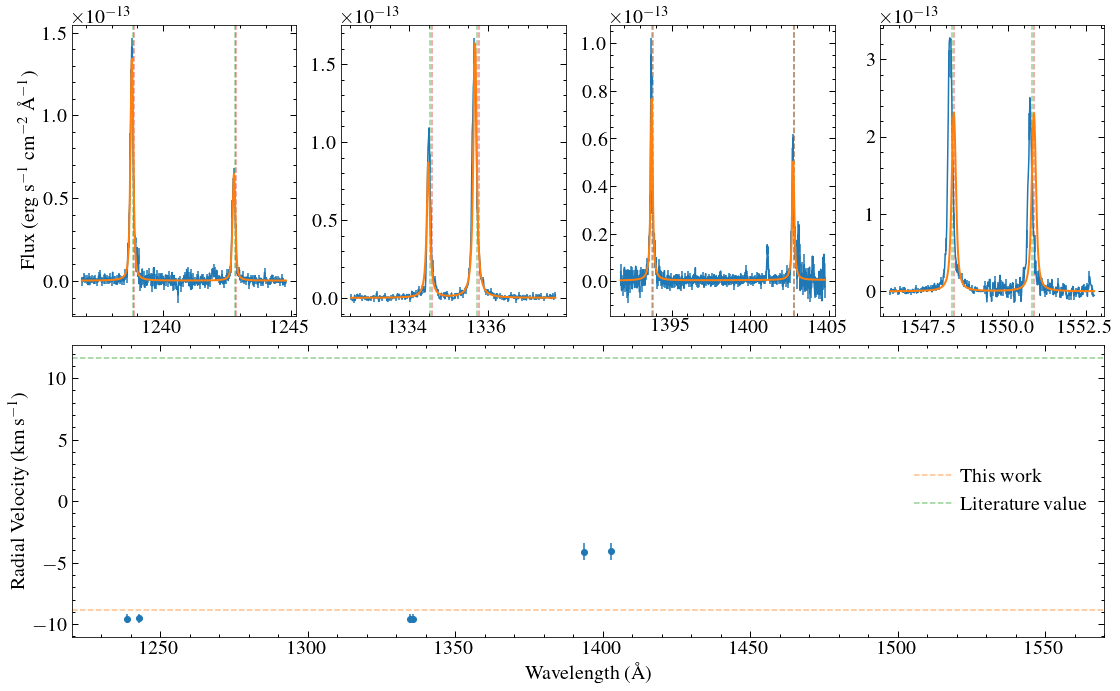

GJ163
2
36.9 km / s
1238.821 43.8857697306523 km / s 0.8126913602747976 km / s
1242.804 43.74512243562447 km / s 0.8100868066393225 km / s
1334.524 56.46749395575779 km / s 0.42703786968573 km / s
1335.709 56.41739772949479 km / s 0.4266590147905269 km / s
1393.755 55.79298258869179 km / s 1.3153015840998705 km / s
1402.77 55.4344250645877 km / s 1.3068487060224 km / s
1548.201 -31.4321223420424 km / s 0.5497759860741116 km / s
1550.772 -31.38001153109724 km / s 0.5488645212858216 km / s


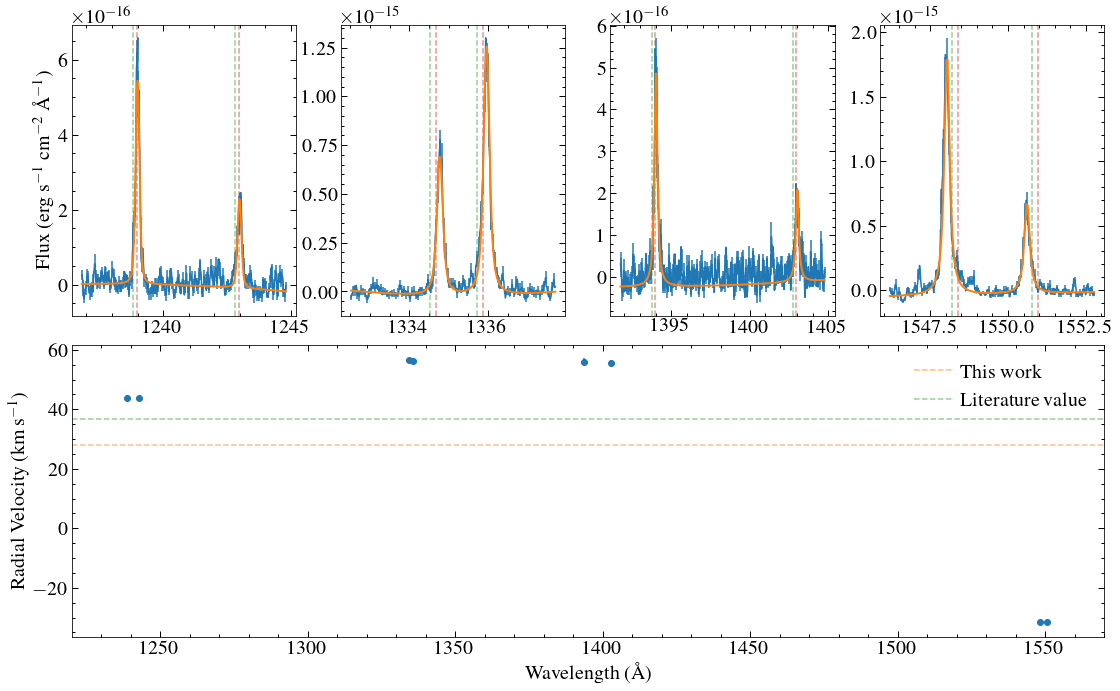

GJ649
3
4.4 km / s
1238.821 -2.6055761719458914 km / s 0.26186096610861553 km / s
1242.804 -2.5972256920129158 km / s 0.2610217410673006 km / s
1334.524 -3.5236369979595863 km / s 0.18703253668743747 km / s
1335.709 -3.520510935443245 km / s 0.18686660717979842 km / s
1393.755 67.79287489434465 km / s 11.70098191250279 km / s
1402.77 67.35719921899997 km / s 11.625784729823792 km / s
1548.201 91.17287637212144 km / s 11.463518156482124 km / s
1550.772 91.0217223241846 km / s 11.444512973793245 km / s


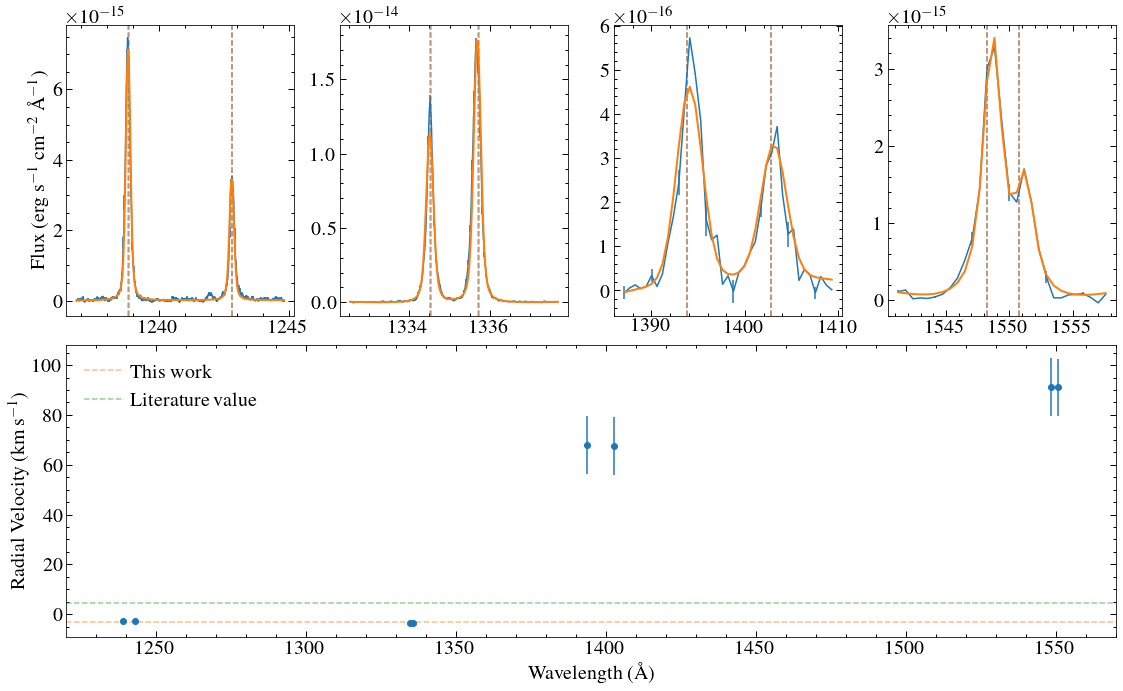

GJ676A
4
-39.1 km / s
1238.821 -44.0604628099457 km / s 0.21628258731584182 km / s
1242.804 -43.9192556498601 km / s 0.2155894341414566 km / s
1334.524 -45.90571620360587 km / s 0.17181371688052494 km / s
1335.709 -45.8649900621207 km / s 0.17166128903485856 km / s
1393.755 -60.37554258210439 km / s 11.852583069664416 km / s
1402.77 -59.98753491416234 km / s 11.776411611491543 km / s
1548.201 -18.34403731883952 km / s 11.361674855937013 km / s
1550.772 -18.313625033910657 km / s 11.342838517621248 km / s


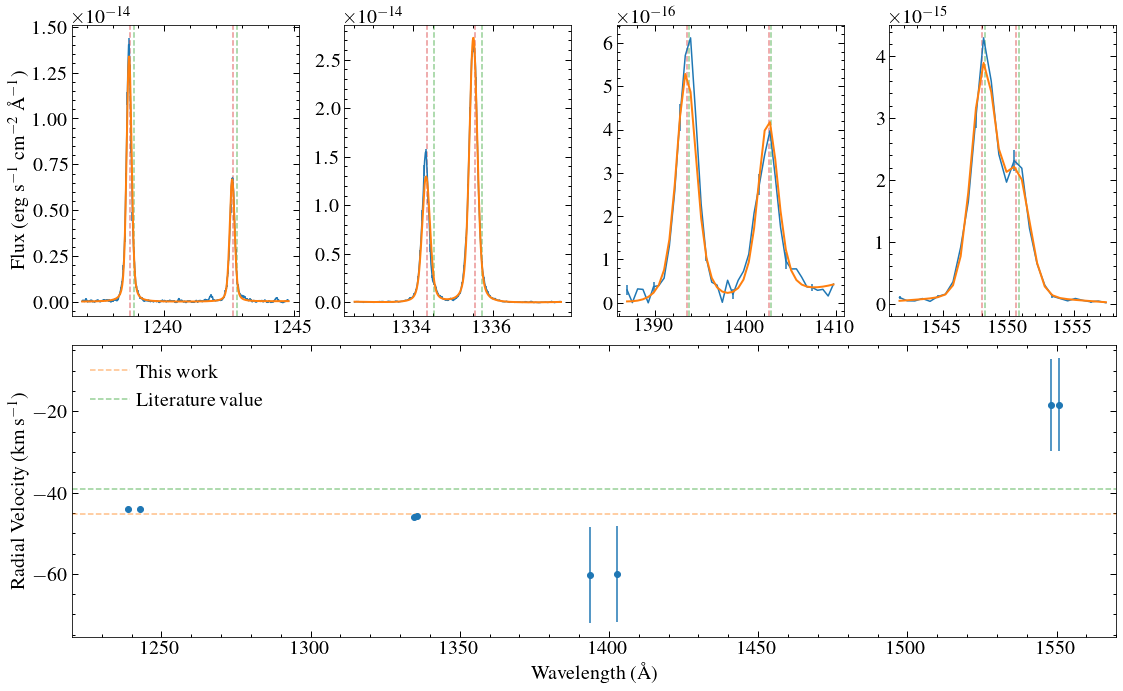

GJ699
5
-110.5 km / s
1238.821 -131.44406504525557 km / s 0.4017841566980991 km / s
1242.804 -131.02280657566575 km / s 0.40049649887443195 km / s
1334.524 -119.29150755682231 km / s 0.31321959546112055 km / s
1335.709 -119.18567579521195 km / s 0.312941716649874 km / s
1393.755 -66.20907875495325 km / s 46.54244730048465 km / s
1402.77 -65.7835814567693 km / s 46.24333899160793 km / s


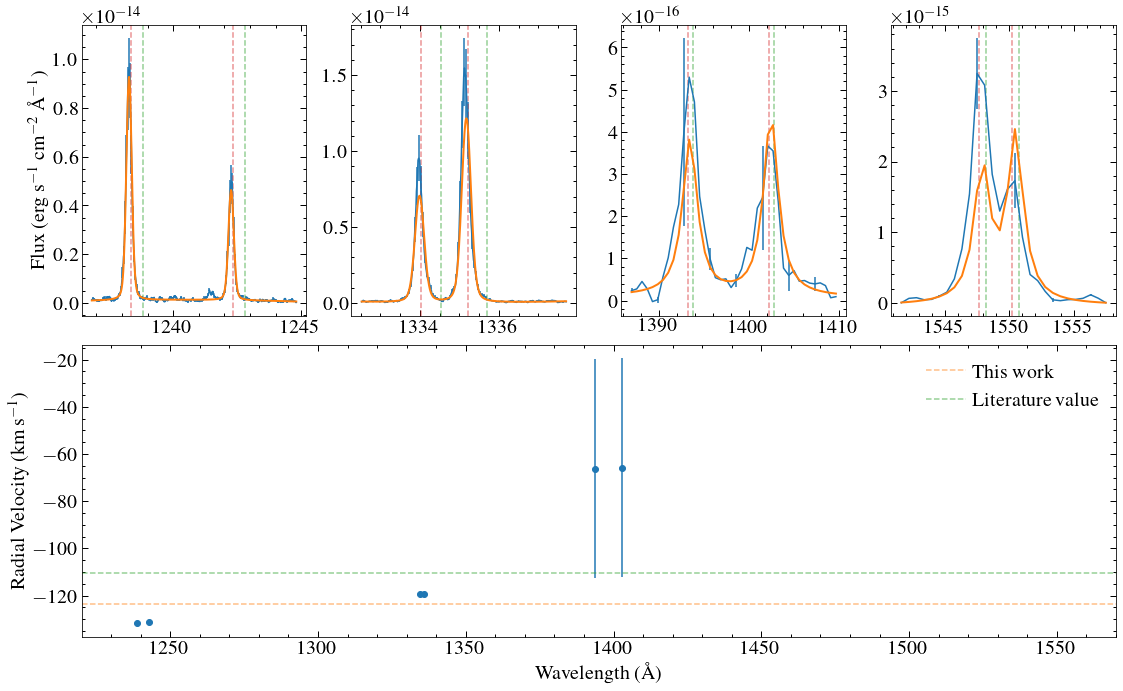

GJ729
6
-10.5 km / s
1238.821 0.519601567685079 km / s 6.537777444221865 km / s
1242.804 0.5179363227570344 km / s 6.516824850277239 km / s
1334.524 11.093577742727884 km / s 0.9495275284206182 km / s
1335.709 11.083735861260998 km / s 0.9486851367729434 km / s
1393.755 16.08088026477613 km / s 2.027752240076831 km / s
1402.77 15.977535357497649 km / s 2.0147207477890854 km / s
1548.201 13.653740941121244 km / s 1.1202455868857628 km / s
1550.772 13.631104623233245 km / s 1.1183883496887708 km / s


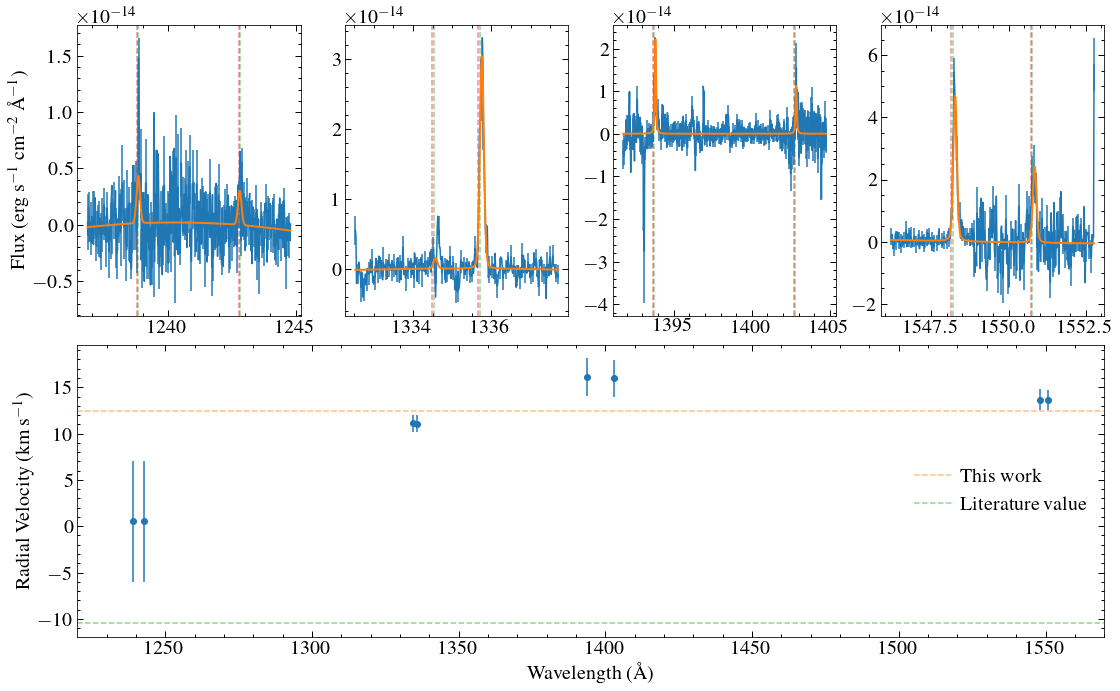

GJ849
7
-15.3 km / s
1238.821 -25.645342206645292 km / s 0.22259394947192135 km / s
1242.804 -25.563152739910848 km / s 0.22188056930817268 km / s
1334.524 -20.412025638078603 km / s 0.20894883763544847 km / s
1335.709 -20.393916715857692 km / s 0.20876346465218454 km / s
1393.755 -14.847235217711676 km / s 0.5157152583488314 km / s
1402.77 -14.751818417033398 km / s 0.5124009779959007 km / s
1548.201 -29.439967619870565 km / s 0.21351855194776803 km / s
1550.772 -29.39115957024012 km / s 0.21316456296714037 km / s


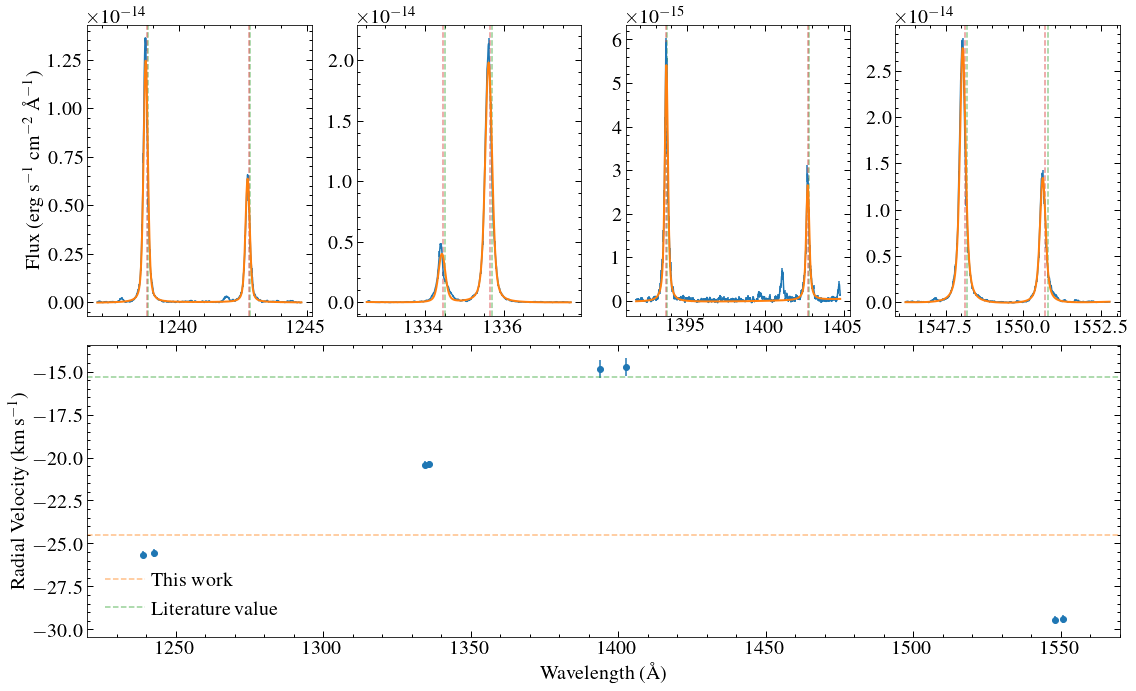

LHS-2686
8
-10.0 km / s
1238.821 7.127847895368947 km / s 0.24782373602589258 km / s
1242.804 7.105004214290377 km / s 0.2470294981962886 km / s
1334.524 4.530546120629022 km / s 0.25657515202559145 km / s
1335.709 4.526526759290356 km / s 0.25634752641521397 km / s
1393.755 -112.17467434577776 km / s 31.89988978231117 km / s
1402.77 -111.45377591680268 km / s 31.69488289851494 km / s
1548.201 -17.294075265082018 km / s 94.90937400061196 km / s
1550.772 -17.265403695389068 km / s 94.75202527330671 km / s


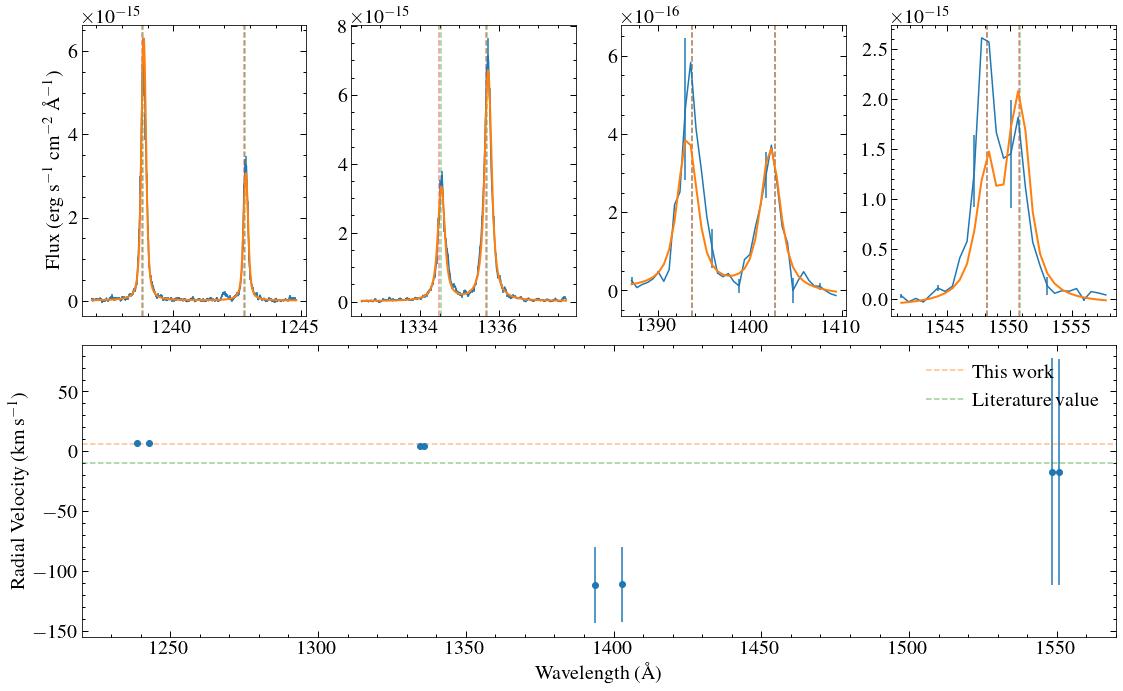

2MASS-J23062928-0502285
9
-54.0 km / s
1238.821 -79.38073486144008 km / s 7.400275692371437 km / s
1242.804 -79.12633153880192 km / s 7.376558921203824 km / s
1334.524 -65.49408217755054 km / s 1.85030893884527 km / s
1335.709 -65.43597783941573 km / s 1.8486674015774618 km / s
1393.755 -52.491739193922356 km / s 6.662318445558583 km / s
1402.77 -52.1543973425503 km / s 6.619502587811066 km / s
1548.201 -58.15796940174787 km / s 2.609380154026688 km / s
1550.772 -58.06155023805356 km / s 2.6050541045487563 km / s


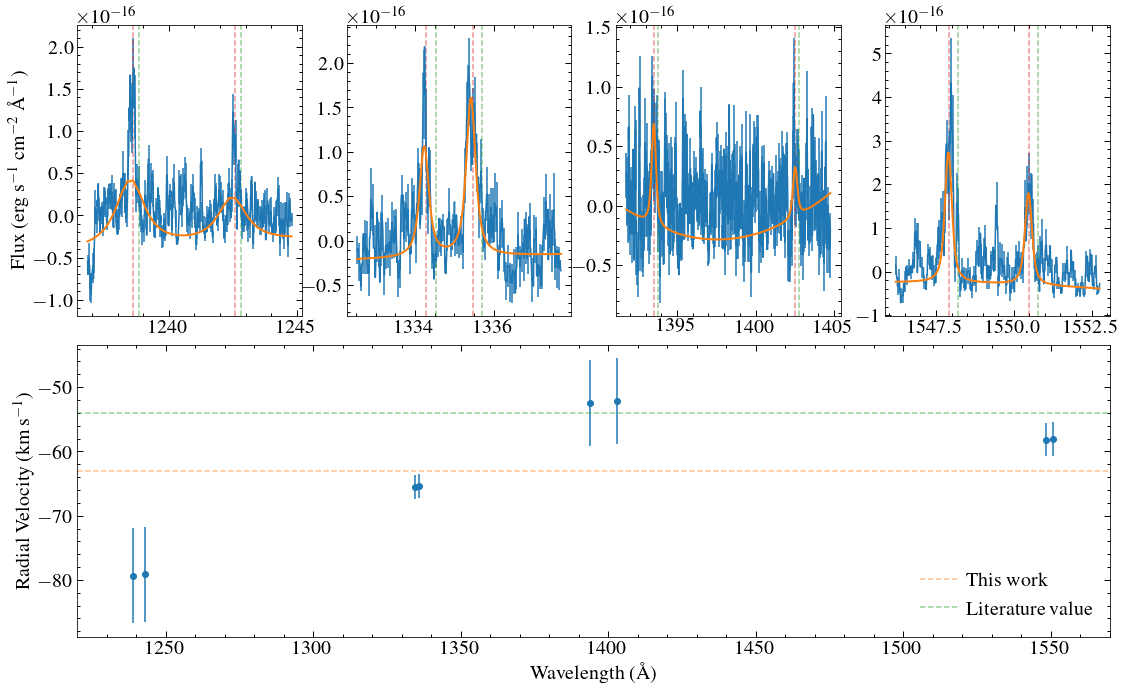

GJ674
10
-2.7 km / s
1238.821 -6.010564978238475 km / s 0.558508098689066 km / s
1242.804 -5.991302020977606 km / s 0.5567181641921932 km / s
1334.524 -9.92751006367076 km / s 0.39708711284112574 km / s
1335.709 -9.918702681681324 km / s 0.39673482936459603 km / s
1393.755 -47.681775862467504 km / s 19.774114352334493 km / s
1402.77 -47.3753455785171 km / s 19.647034616593544 km / s
1548.201 -22.287335549408215 km / s 24.195019849689707 km / s
1550.772 -22.250385733654706 km / s 24.154907314722713 km / s


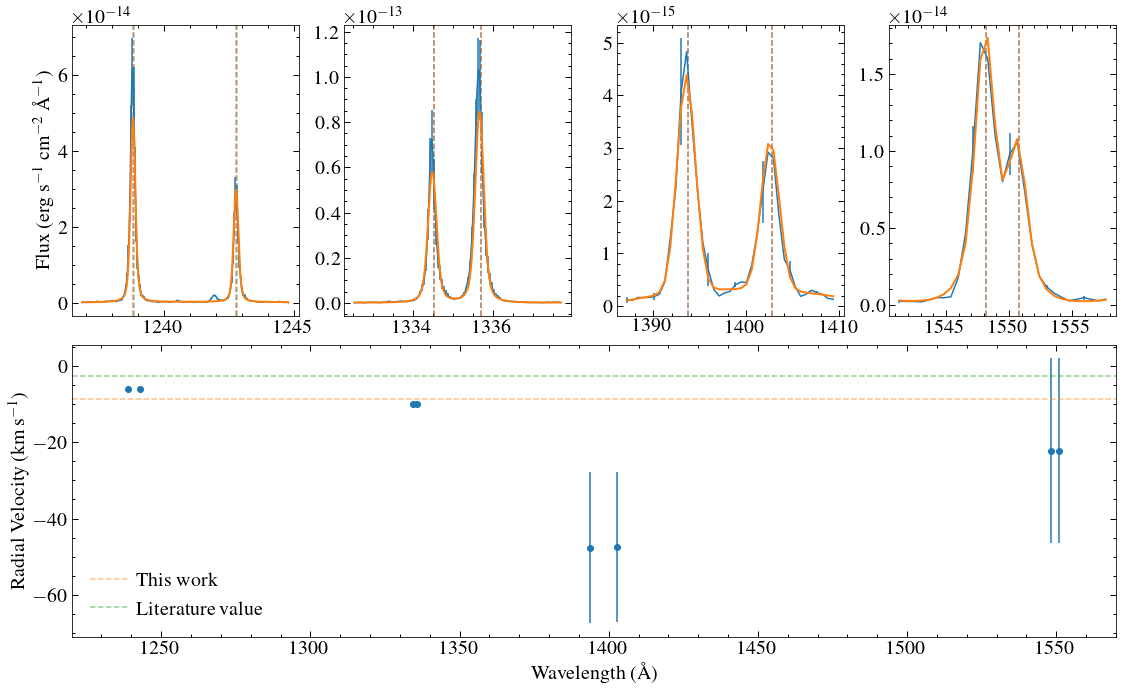

L-980-5
11
-11.3 km / s
1238.821 1.4221204409839627 km / s 0.7046045697070337 km / s
1242.804 1.4175627587606623 km / s 0.7023464179445551 km / s
1334.524 19.699577894554064 km / s 0.6036773456494 km / s
1335.709 19.682101034118777 km / s 0.603141781682691 km / s
1393.755 25.558373356599965 km / s 1.1977368203054723 km / s
1402.77 25.394120673802885 km / s 1.1900394804267318 km / s
1548.201 15.234285830104676 km / s 0.855534480559319 km / s
1550.772 15.20902915224288 km / s 0.8541161036507532 km / s


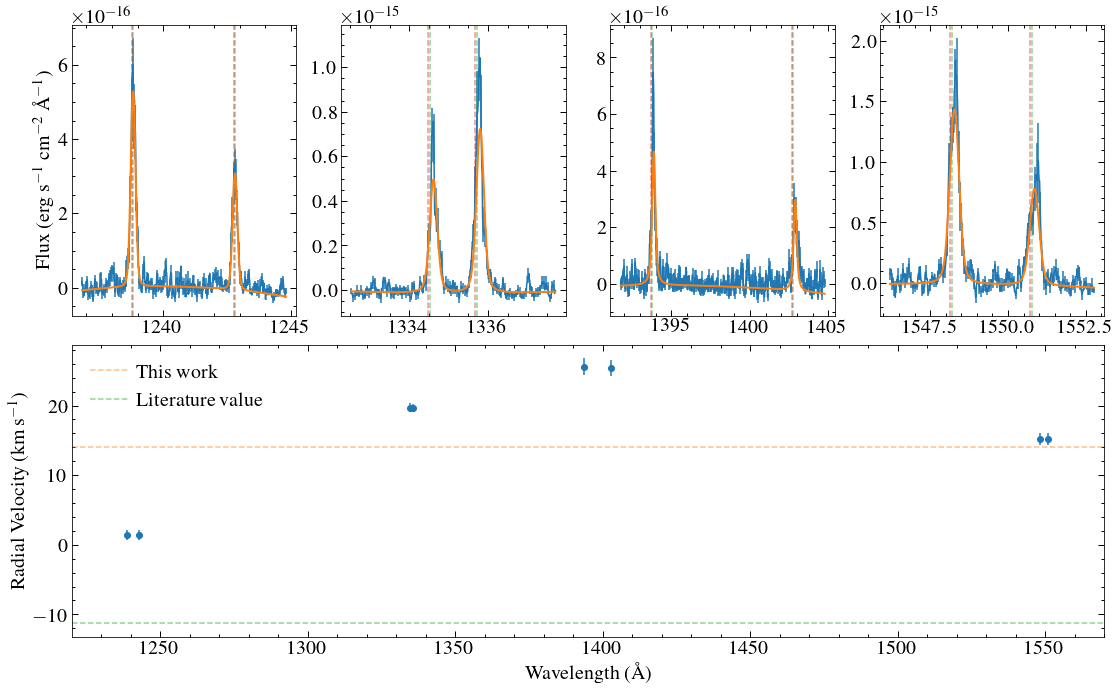

In [11]:
stars = []
final_dv = []
fitter = fitting.LevMarLSQFitter()


doublets = np.array([[1238.821, 1242.804],[1334.524,1335.709],[1393.755,1402.77],[1548.201,1550.772]])
all_lines = doublets.flatten()
names = ['N\,v', 'C\,II', 'Si\,IV', 'C\,IV']

# dv_guess = np.array([0, 0, -10, 0, 0, -10, -90, 10, 0, 0, 0, -50])*u.km/u.s
# ref_dvs = [4.4, -4, 11.6,36.9, -15.3,-2.7, -110.5, -10.5, -15.3,-11.3, -10, -54]
# ['GJ1132', 'GJ15A', 'GJ163', 'GJ649', 'GJ676A', 'GJ699', 'GJ729', 'GJ849', 'LHS-2686', '2MASS-J23062928-0502285', 'GJ674', 'L-980-5']


ref_dvs = [4.4, 11.6,  36.9,4.4,-39.1,-110.5,-10.5, -15.3, -10,-54,-2.7, -11.3]
dv_guess = np.array(ref_dvs)*u.km/u.s

for j, spec in enumerate(specs):
#     print(spec)
    plt.figure(figsize = (4*len(doublets), 10))
    gs = GridSpec(2, 4)
    data = fits.getdata(spec, 1)
    star = fits.getheader(spec)['TARGNAME']
    print(star)
    print(j)
    print(dv_guess[j])
    stars.append(star)
    w, f, e, inst = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['INSTRUMENT']
    # lines = line_list[(line_list['Likelihood to measure'] == 'High') | (line_list['Likelihood to measure'] == 'Medium')]['Wavelength']

    smooth =7 

    dvs = []
    dv_es = []

    for i, lines in enumerate(doublets):
#         plt.subplot(1, len(doublets) , i+1)
        plt.subplot(gs[0, i])
        if i == 0:
            plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
#         start, end = lines[0]-5, lines[1]+5
        mask = (w >= lines[0]-7) & (w <= lines[1]+7)
        if np.median(inst[mask]) in [1, 2, 16]:
            mask = (w >= lines[0]-2) & (w <= lines[1]+2)
     
            
        wi, fi, ei = w[mask], f[mask], e[mask]
        mod = models.Polynomial1D(2)
        std_guess = 0.5
        if np.median(inst[mask]) in [1, 2, 16]:
            std_guess = 0.1
        if np.median(inst[mask]) in [1, 2]:
            fi = convolve(fi,Box1DKernel(smooth))
            ei = convolve(ei,Box1DKernel(smooth))/smooth**0.5
        plt.errorbar(w[mask], fi, yerr =ei, errorevery=5)
    #         print(std_guess)
        for line in lines:
            line_guess = dv_guess[j].to(u.AA, equivalencies = u.doppler_optical(line*u.AA)).value
#             mod = mod+  models.Gaussian1D(amplitude=np.max(fi)/2, mean = line_guess, stddev=std_guess)
            mod = mod + functional_models.Voigt1D(x_0=line_guess, amplitude_L=np.max(fi), fwhm_G=std_guess, fwhm_L=std_guess)#, bounds=dict(amplitude_L=[0, 1]))
            plt.axvline(line, ls='--', c='C2', alpha =0.5)
            plt.axvline(line_guess, ls='--', c='C3', alpha =0.5)
    
        def tiedfunc0(mod):
            mean = mod.mean_1.value+np.diff(lines)
            return mean
        
        
        def tiedfunc1(mod):
            x_0 = mod.x_0_1.value+np.diff(lines)
            # fwhm_G = mod.fwhm_G_1.value
            return x_0
        
        def tiedfwhmg(mod):
            fwhm_G = mod.fwhm_G_1.value
            return fwhm_G
        
        def tiedfwhml(mod):
            fwhm_L = mod.fwhm_L_1.value
            return fwhm_L
        
        
#         mod.mean_2.tied=tiedfunc0
        mod.x_0_2.tied=tiedfunc1
        mod.fwhm_G_2.tied=tiedfwhmg
        mod.fwhm_L_2.tied=tiedfwhml
        
        gg_fit = fitter(mod, w[mask], fi, weights = 1/ei, maxiter=100000)
        if j == 0:
            print(gg_fit[2])

#         if i == 3 and  np.median(inst[mask]) not in [1, 2, 16]:
#             dvs.append(0)
#             dvs.append(0)
#             dv_es.append(0)
#             dv_es.append(0)
        if type(fitter.fit_info['param_cov']) == np.ndarray:
        #     print('hooray!')
            fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
#             print(fit_e)
#             mean_es = fit_e[4:][::4]
#             print(mean_es)
#             mean_es = fit_e[3:][1::3]

    #       print(gg_fit)
            for i in range(len(lines)):
                mean = gg_fit[i+1].x_0
#                 mean = gg_fit[i+1].mean
#                 mean_e = mean_es[i]
                mean_e = fit_e[3] #for double voights
#                 line_e = 
        #             obs_line = gg_fit[i+1].mean*u.AA

                dv = (mean*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[i]*u.AA))
                eup = ((mean+mean_e)*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[i]*u.AA))
                edo = ((mean-mean_e)*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[i]*u.AA))
                dve= np.mean([abs(dv-eup).value, abs(dv-edo).value])*u.km/u.s   
                print(lines[i], dv, dve)
                dvs.append(dv.value)
                dv_es.append(dve.value)
        else:
            dvs.append(0)
            dvs.append(0)
            dv_es.append(0)
            dv_es.append(0)
   
            
    
        plt.plot(wi, gg_fit(wi), lw=2, zorder=10)
#     plt.savefig('line_plots/{}_lines.pdf'.format(star), dpi=150)
#     plt.show()
    dvs, dv_es = np.array(dvs), np.array(dv_es)
    dv_av = np.average(dvs[dvs !=0], weights = 1/dv_es[dvs !=0]**2)
    final_dv.append(dv_av)
    plt.subplot(gs[1, :])
    plt.errorbar(all_lines[dvs !=0], dvs[dvs !=0], yerr =dv_es[dvs !=0], marker='o', ls='none')
    plt.axhline(dv_av, ls='--', c='C1', alpha=0.5, label='This work')
    plt.axhline(dv_guess[j].value, ls='--', c='C2', alpha=0.5, label='Literature value')
    plt.xlabel('Wavelength (\AA)')
    plt.ylabel('Radial Velocity (km\,s$^{-1}$)')
    plt.legend()
    plt.xlim(1220, 1570)
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.1)
    plt.savefig('rv_plots/{}_rv.png'.format(star), dpi=150)
    plt.savefig('rv_plots/{}_rv.pdf'.format(star), dpi=150)
    plt.show()
    
    #     start += step


In [12]:
for s, v in zip(stars, final_dv):
    print(s,',', v)

GJ1132 , 39.81718301485894
GJ15A , -8.874938991000736
GJ163 , 27.93788047955458
GJ649 , -3.1819281400571082
GJ676A , -45.14902144328076
GJ699 , -123.77735748267808
GJ729 , 12.466761090271442
GJ849 , -24.495933902330982
LHS-2686 , 5.865079959724009
2MASS-J23062928-0502285 , -63.11826761903297
GJ674 , -8.617045562209798
L-980-5 , 13.990040227314038


In [13]:
line_groups = np.array([
    [1174.935,1175.265,1175.592,1175.713,1175.989,1176.372],
    [1206.499],
    [1238.821,1242.804],
    [1264.737,1265.001],
    [1294.543],
    [1298.918],
    [1323.952],
    [1334.524, 1335.709],
    [1393.755,1402.77],
    [1548.201,1550.772],
    [1640.332,1640.345,1640.375,1640.391,1640.474,1640.49,1640.533],
    [1656.267,1656.926,1657.008,1657.379,1657.907,1658.122],
    [1670.787],
    [2796.35, 2803.53]], dtype='object')

line_oss = np.array([
    [1.136e-01, 2.724e-01,  6.810e-02, 2.042e-01, 9.074e-02, 6.807e-02],
                    [1.0], 
                    [1.56e-01,7.80e-02],
                    [1.09e+00, 1.13e-01],
                    [1.0],
                    [1.0],
                    [1.0],
                    [1.29e-01, 1.15e-01],
                    [5.13e-01, 2.55e-01],
                    [1.90e-01, 9.52e-02],
                    [6.9591e-01, 2.8995e-01, 1.3592e-02, 1.4498e-01, 6.2629e-01, 6.9588e-02, 1.3593e-02],
                    [5.98e-02, 1.43e-01,1.07e-01, 3.57e-02, 4.77e-02, 3.56e-02],
                    [1.0],
                    [6.08e-01, 3.03e-01]], dtype='object')

line_tab = np.array([1175, 1206.449, 1240, 1265, 1294.543, 1298.918, 1323.952, 1335, 1400, 1550, 1640, 1657, 1670.787, 2800]) #single value for multiplets to put into tables
line_names = np.array(['C\,III', 'Si\,III', 'N\,V', 'Si\,II', 'Si\,III', 'Si\,III', 'C\,II', 'C\,II', 'Si\,IV', 'C\,IV', 'He\,II', 'C\,I', 'Al\,II', 'Mg\,II'], dtype=str)
line_names_mult = []
for i in range(len(line_names)):
    if len(line_groups[i]) > 1:
        line_names_mult.append(r'{}$^m$'.format(line_names[i]))
    else:
        line_names_mult.append(line_names[i])
line_names_mult= np.array(line_names_mult)
# print(line_names_mult)
# for lines, oss in zip(line_groups, line_oss):
    # print(len(lines), len(oss), np.sum(oss))
print(len(line_groups), len(line_names_mult), len(line_tab))

14 14 14


GJ1132
109.25352441092056 6.084982470557665


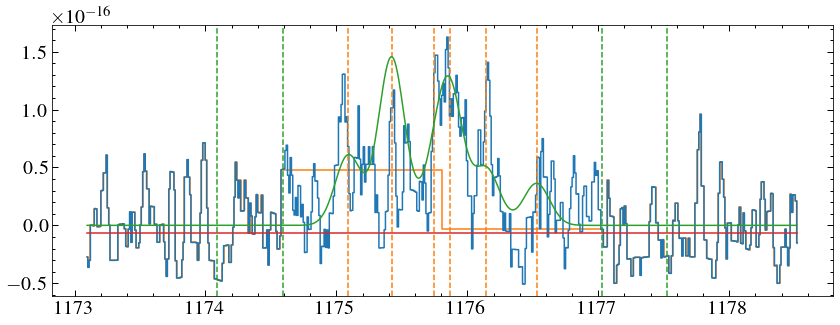

54.70493791224234 3.40248135445455


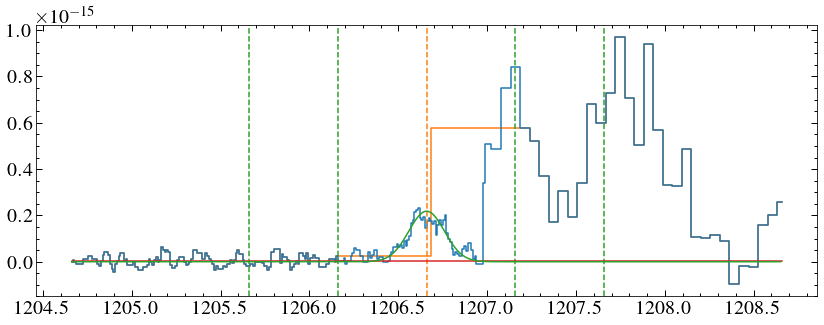

74.98530400961306 6.008037210833937


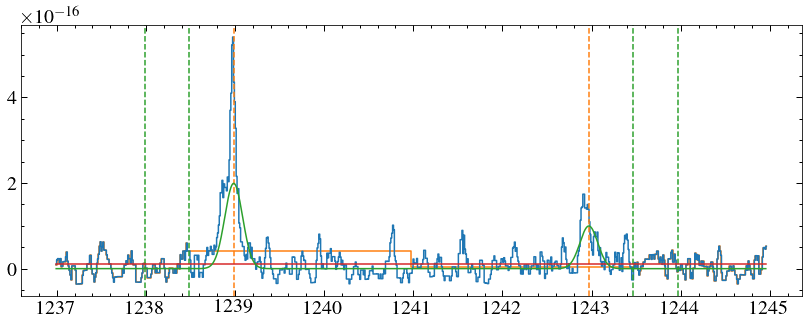

12.290547427610282 2.927137987615569


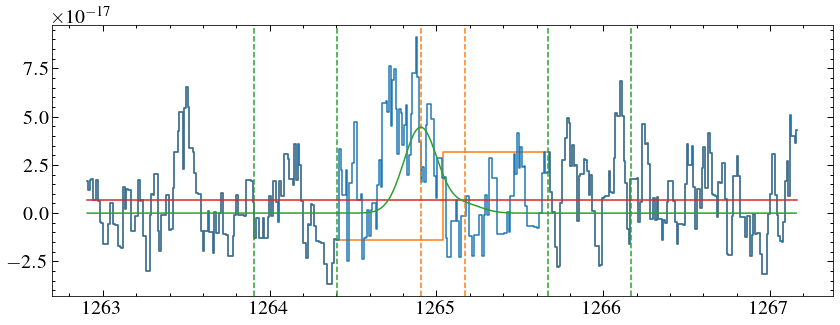

2.5020487740791673 3.7988838802811693


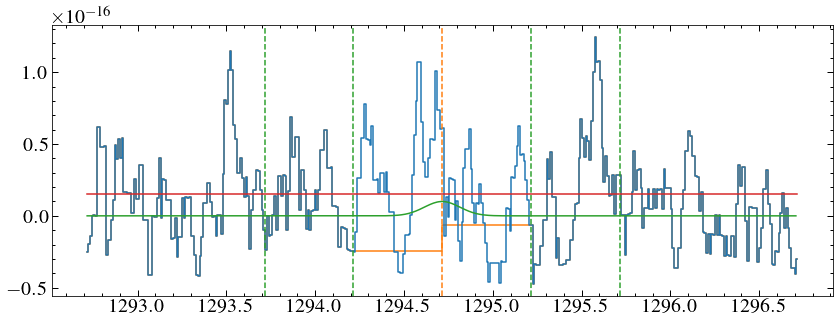

-9.864765408390776 3.352112151399009


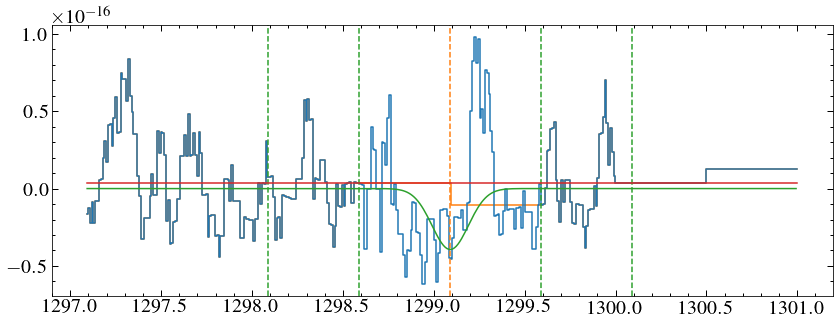

3.197838438289735 5.8935592523826585


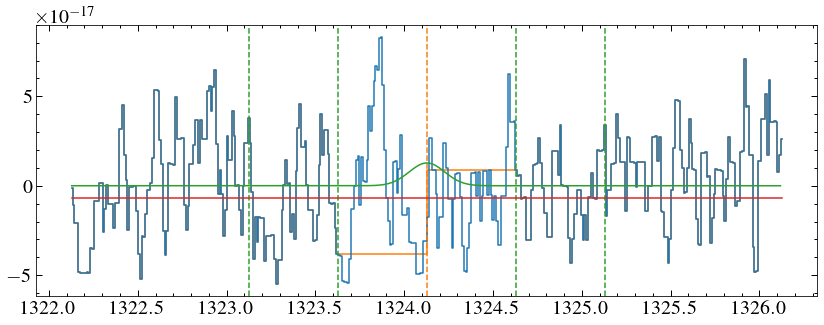

121.78484449480337 5.22480740681187


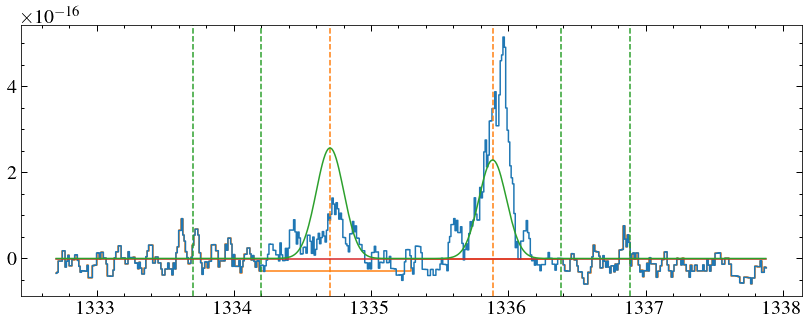

18.32669838300504 13.916230156917775


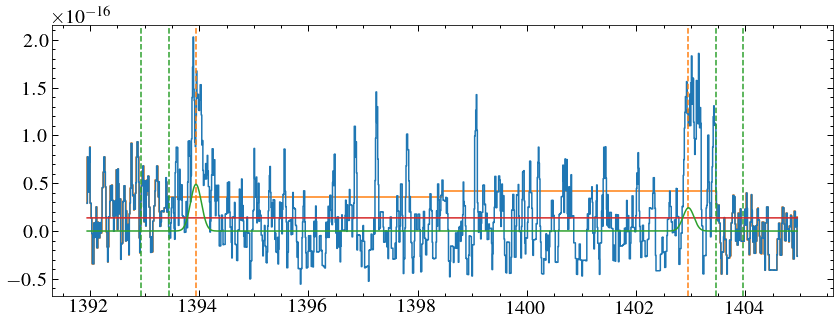

291.12307824481024 14.567621971182255


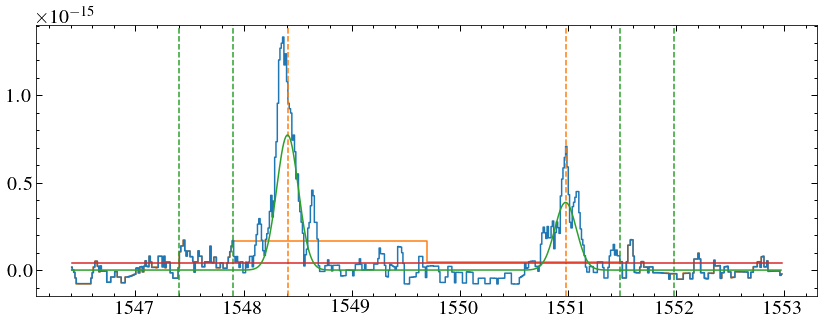

126.80438882559892 13.851794535502968


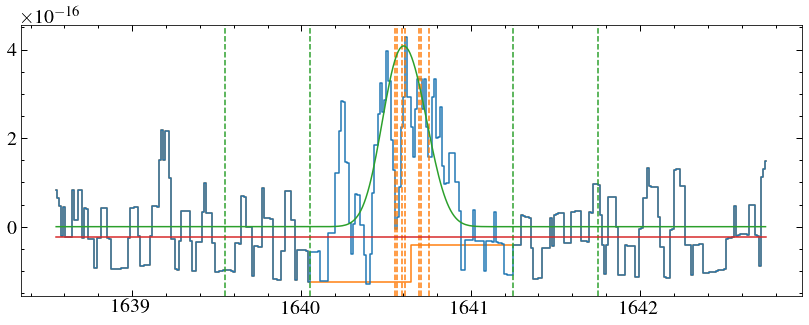

101.61788042185903 25.416413218723626


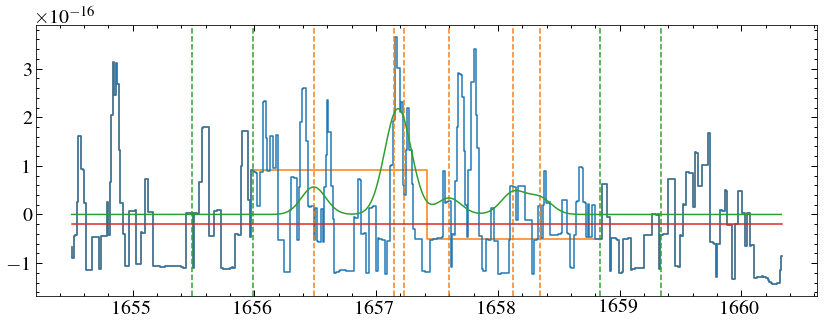

82.06435035577644 11.458024697464422


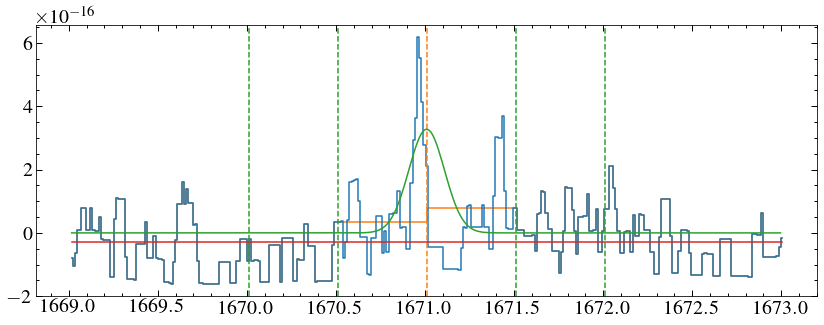

5366.356795402345 234.11845995833792


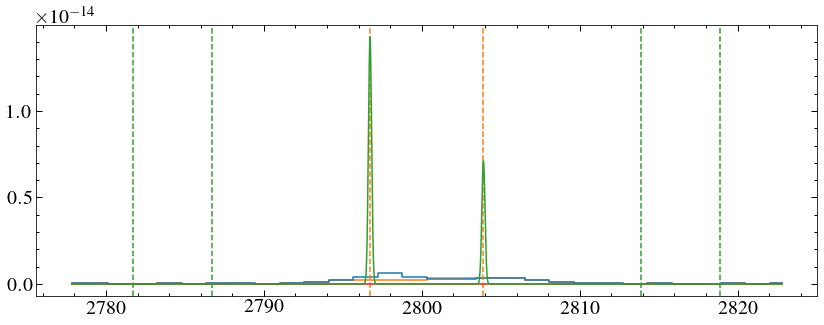

GJ15A
39473.2864785616 2435.94179737211


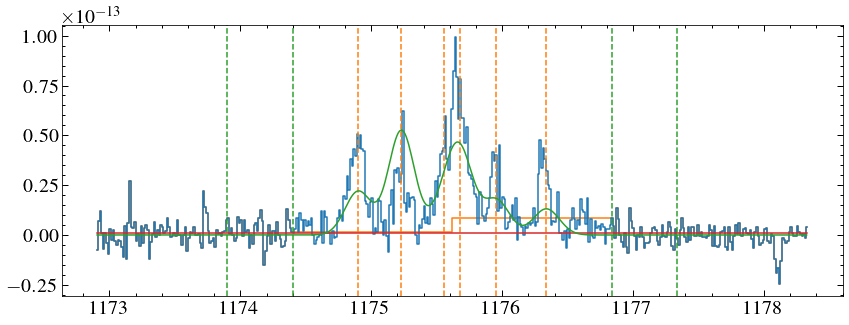

15337.590755759518 1001.4313805447877


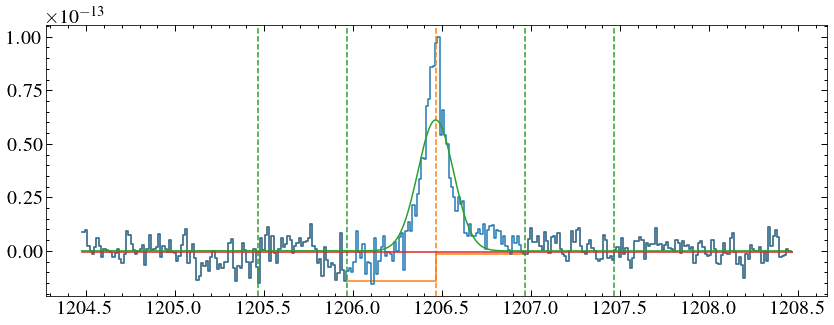

33007.77126543218 969.1392112517264


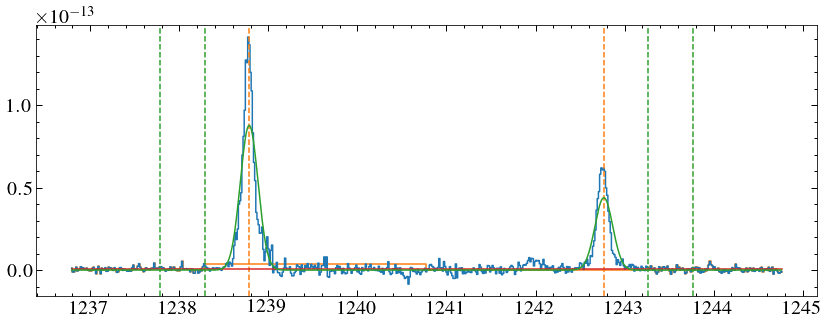

1827.0431857821857 270.9842525324947


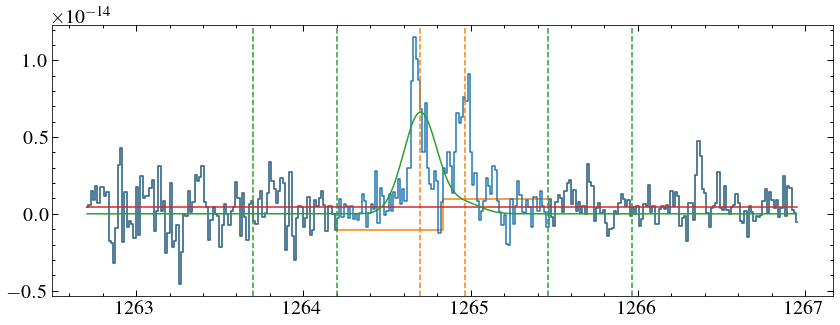

1243.9007762160822 316.48197664705873


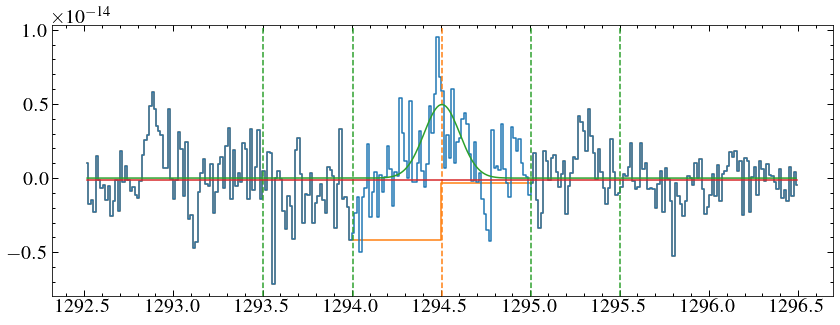

1355.740714543299 206.6667489709624


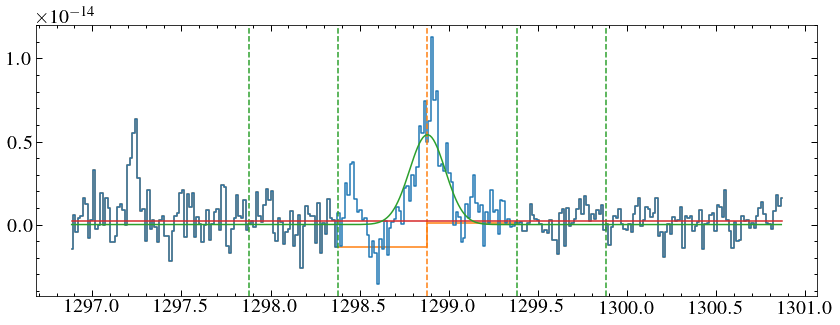

184.7160010702402 222.21796163475716


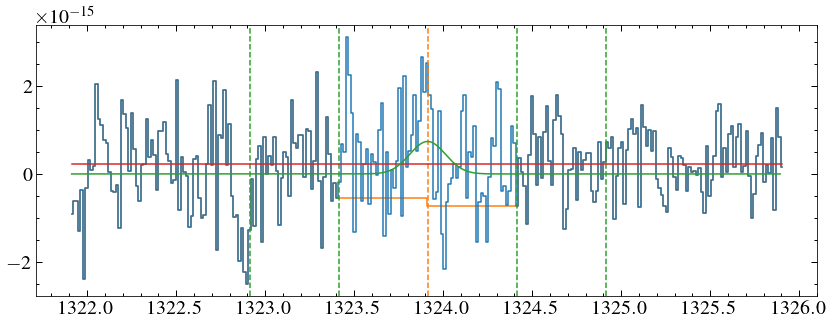

38026.086595878995 580.7328917211438


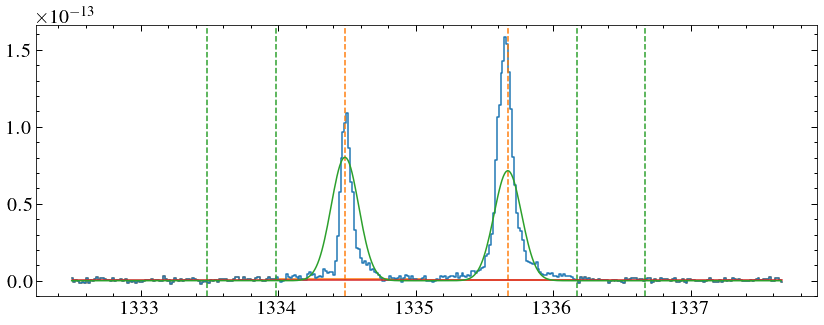

30195.727158968075 1008.6122727354584


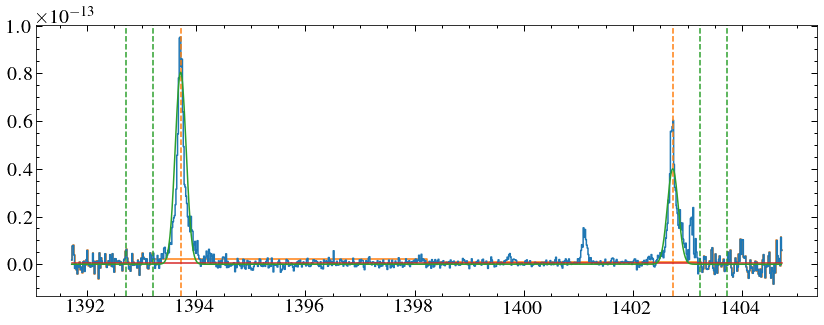

111498.83150430759 2190.588225748938


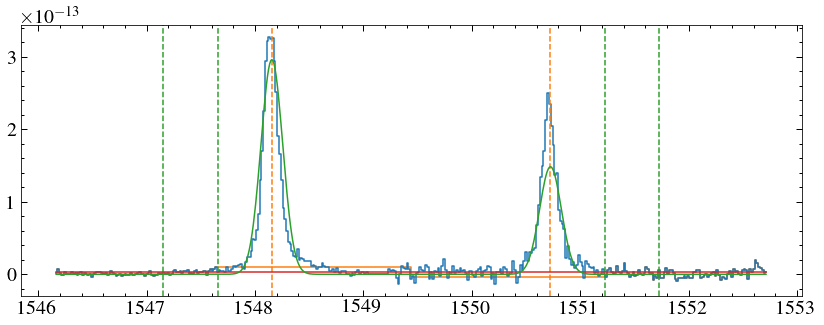

58854.77075299624 1646.2353522454791


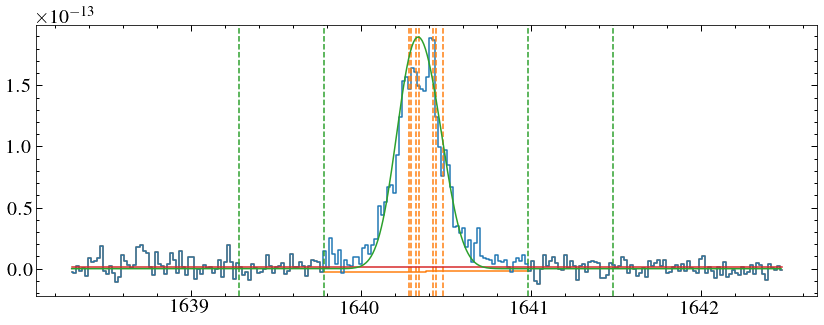

24800.226057964213 2445.080954439983


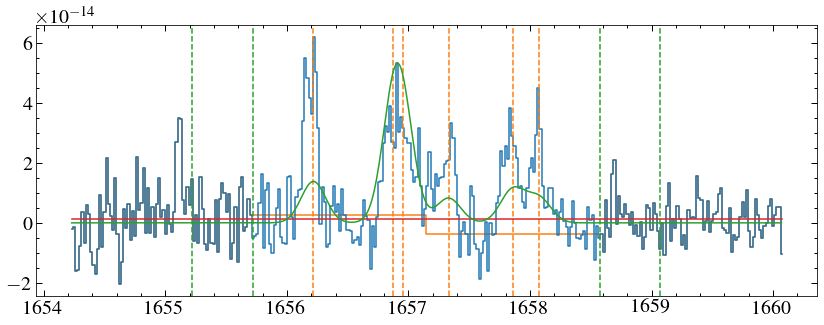

10104.369420604471 897.1407752771306


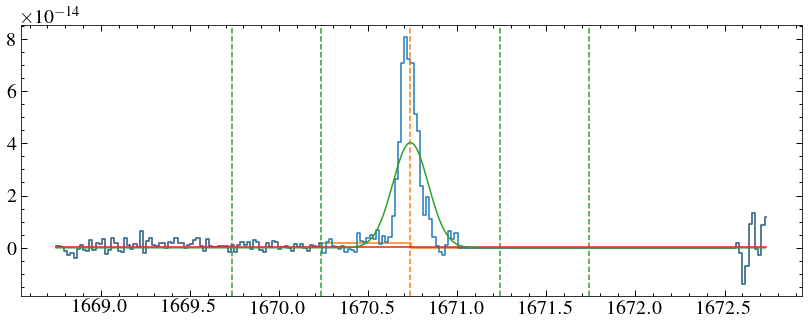

234616.92060114513 12132.266878878985


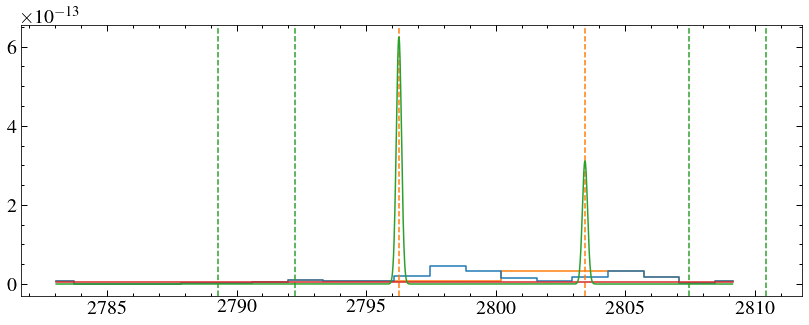

GJ163
232.59281002357037 6.950895696841459


151.83204427037933 5.125058448483306


222.61596579800448 6.293083746520824


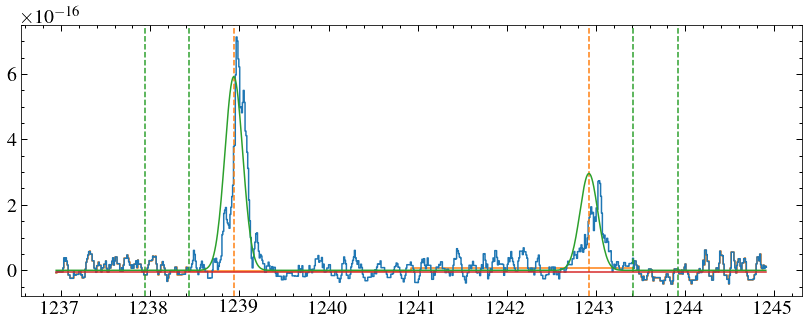

34.89837580807472 2.8590983298559256


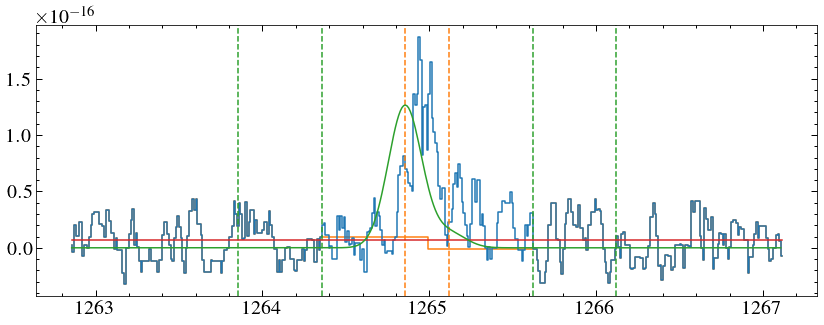

10.166585353481564 2.1992838258538763


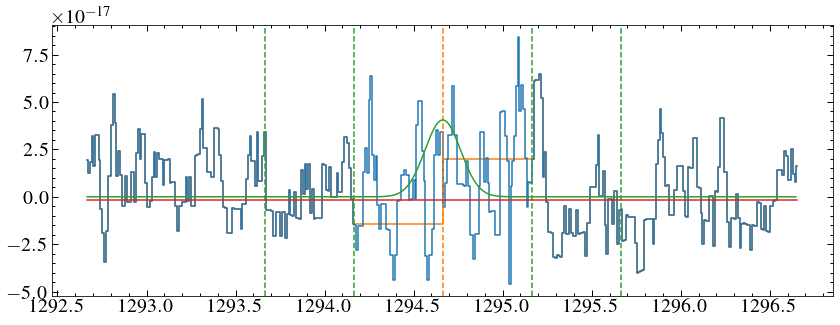

13.92219190928485 2.792327565719057


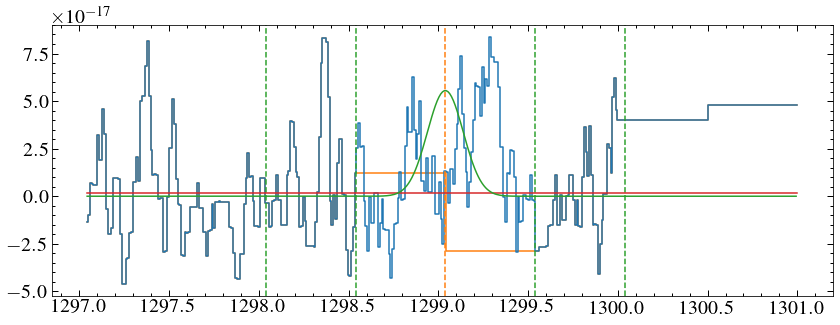

12.392004871569009 3.0014854315989994


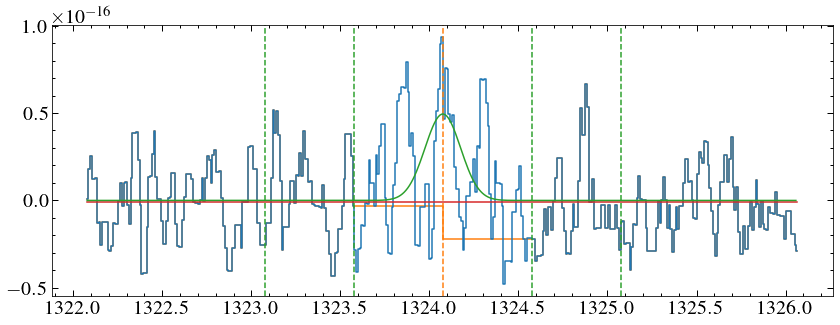

434.02365147572965 8.656201711738703


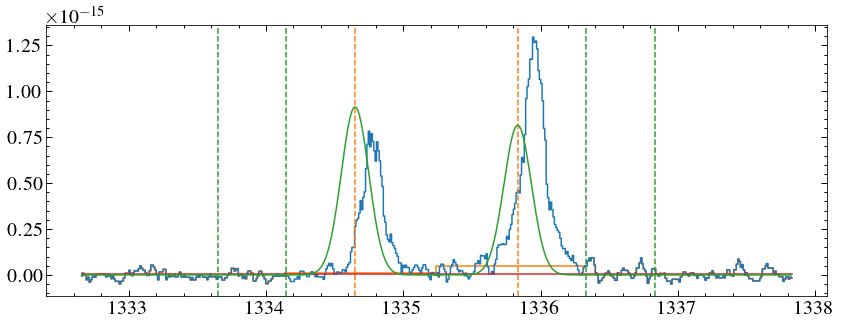

209.92382391909467 9.593930131531454


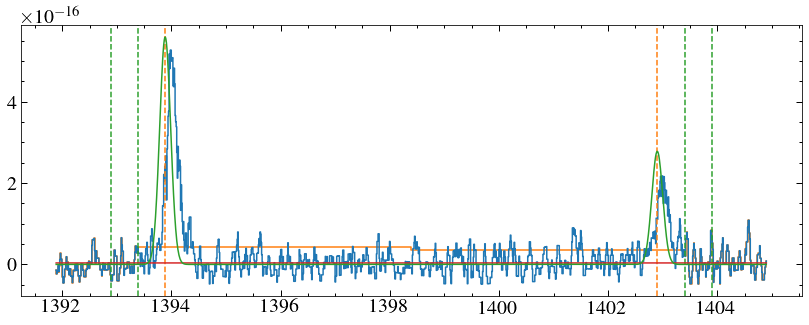

506.32049905211494 14.844931029775397


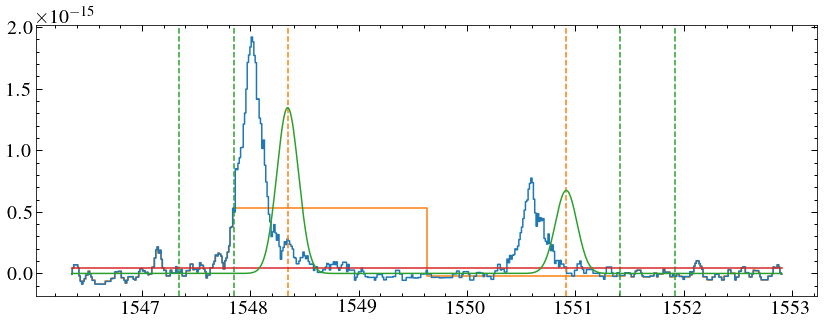

271.4793350048943 14.194811031985141


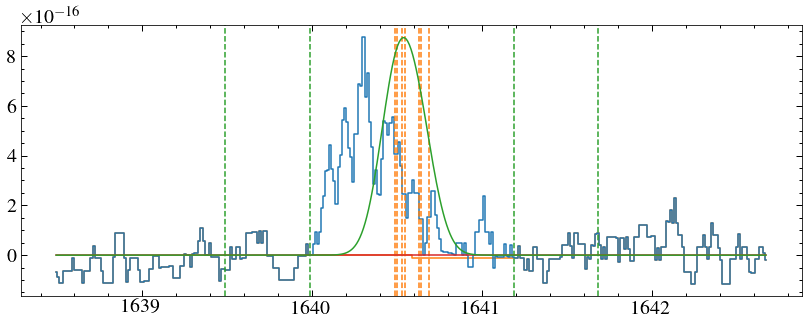

204.31975981463592 19.388764636428103


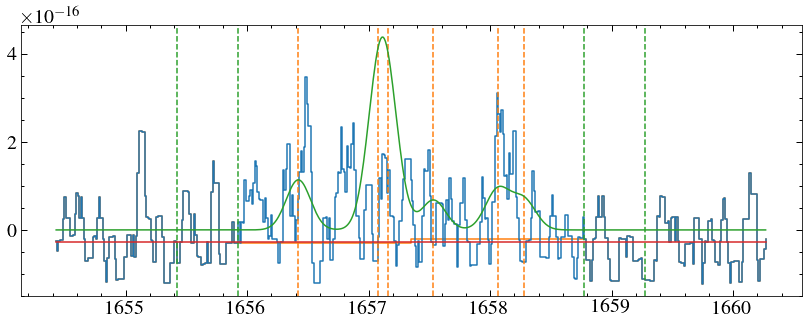

79.71937010924005 11.274944044698927


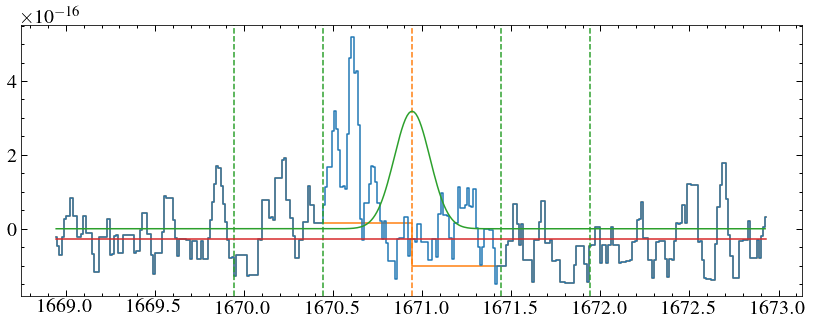

39506.793486583934 650.8893891745117


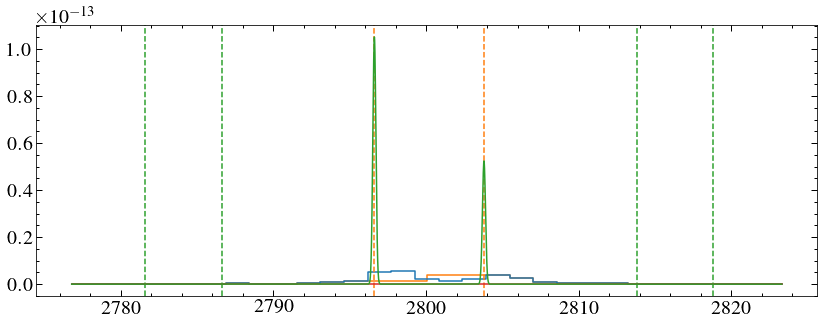

GJ649
2887.3988745171187 21.37675962066438


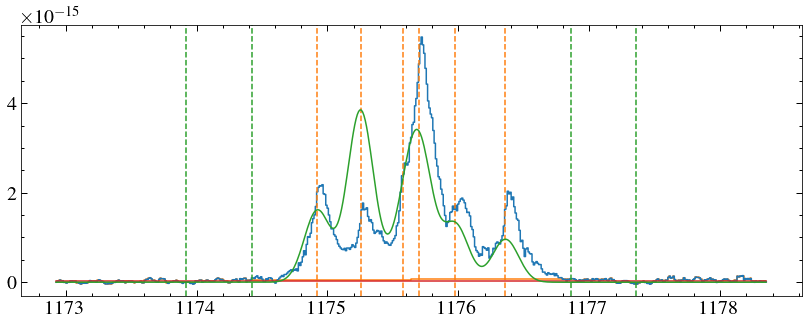

1770.6445565017898 19.9103234103374


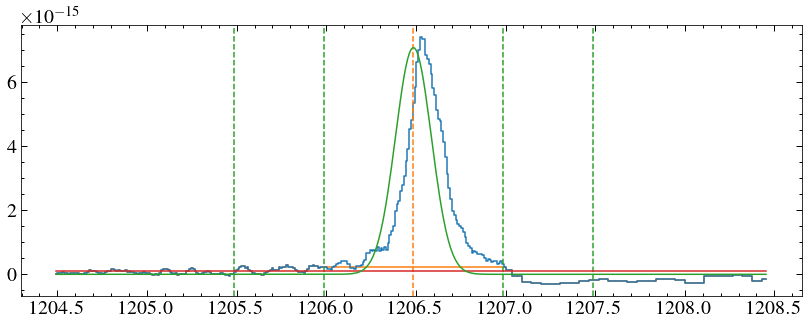

2594.5367741346154 21.51812835189902


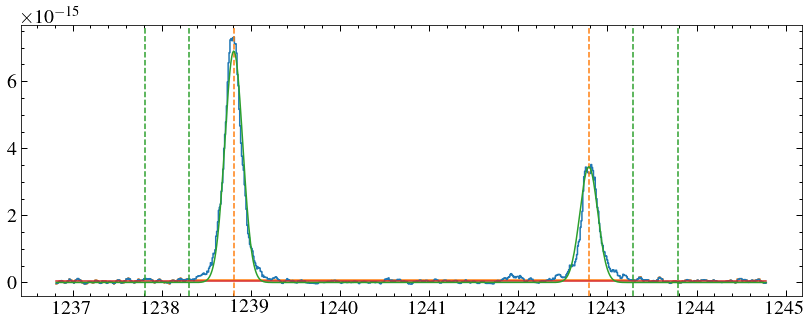

490.4075703154438 8.066186786491752


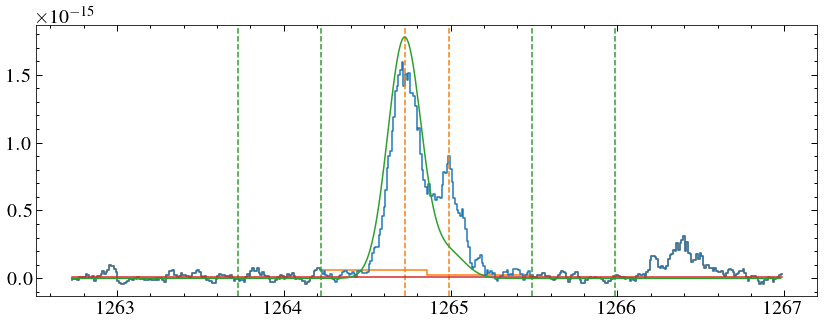

17.11421269002436 4.05202788094419


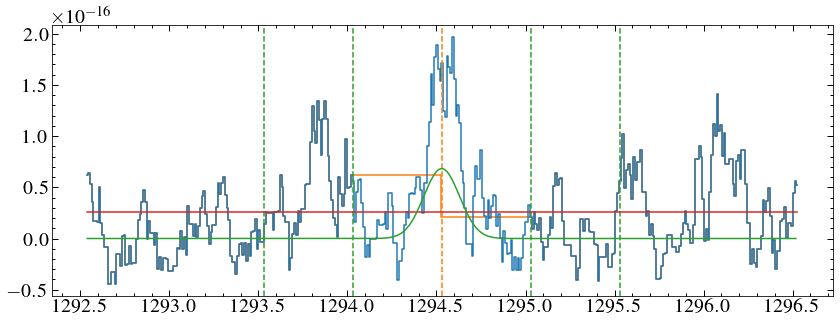

117.47142340492968 4.878243287201205


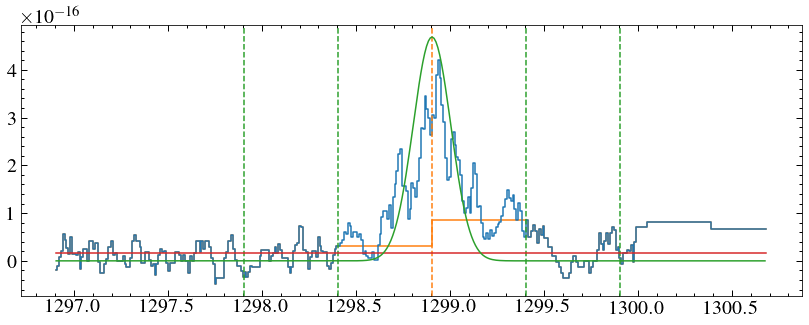

28.693621573891427 4.3244207471385145


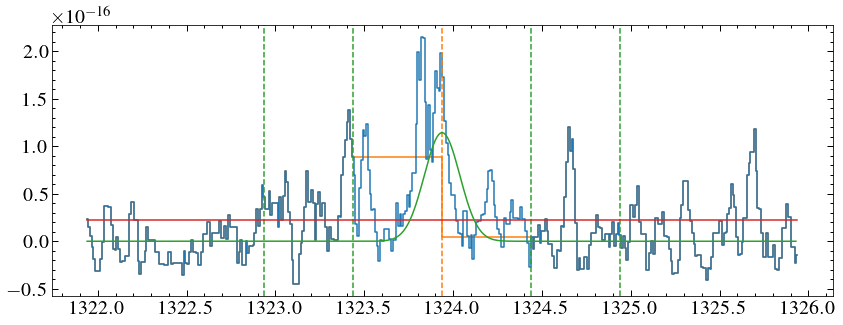

7469.393121349226 35.884745089347454


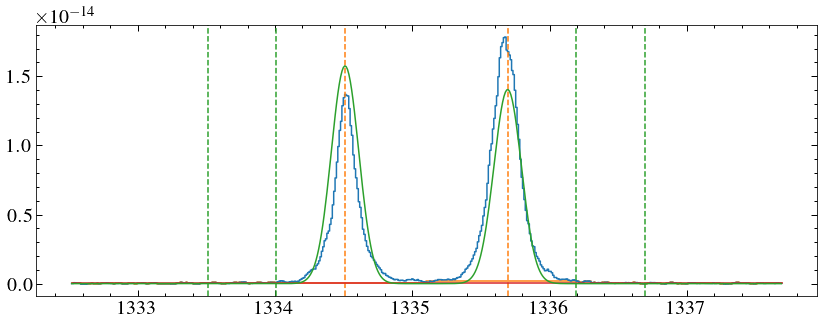

2690.857738682908 96.50964785380117


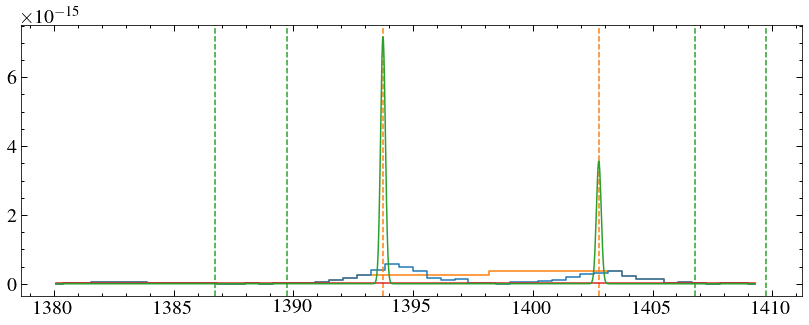

10290.577274531042 282.62074063009925


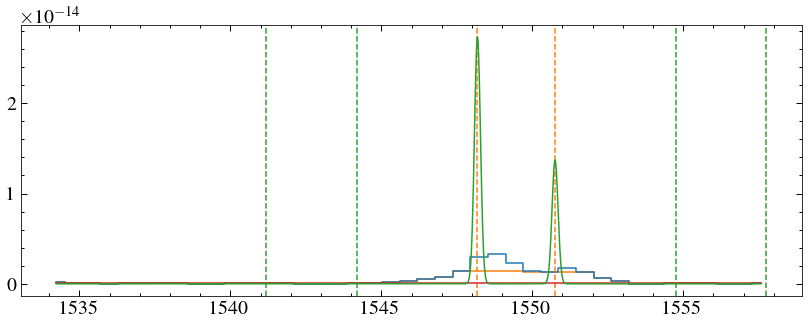

7285.975674983484 330.2909064977441


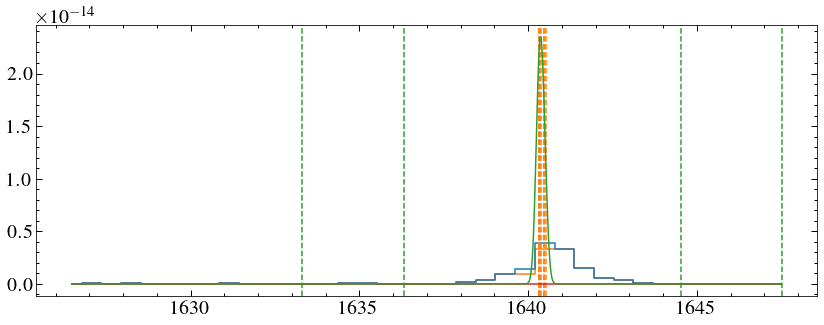

4976.326107916712 227.72816930576434


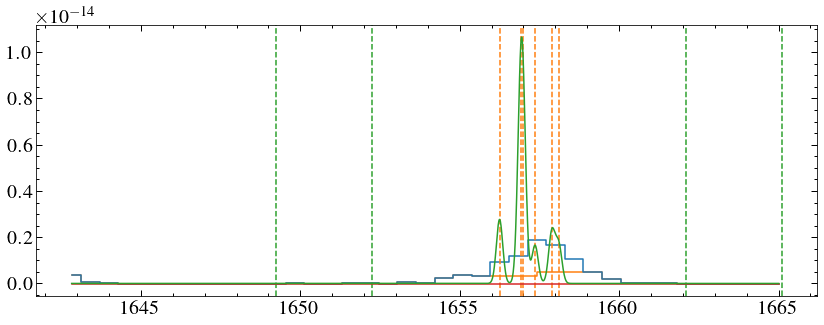

1081.824289474435 97.57691641810375


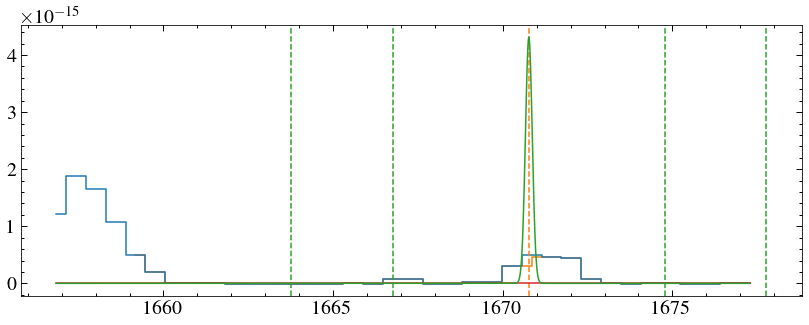

310370.9434195697 7150.313827943615


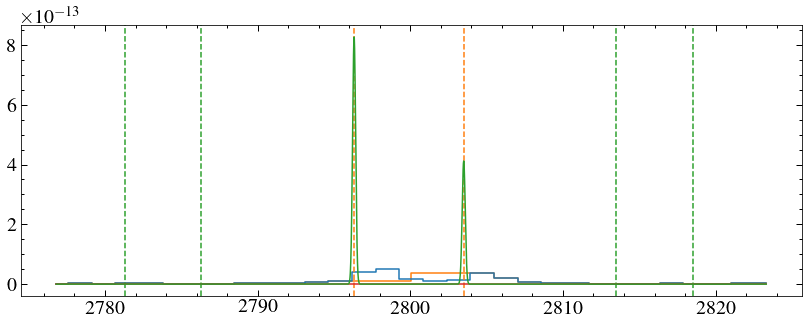

GJ676A
4446.904490299315 26.408662011951357


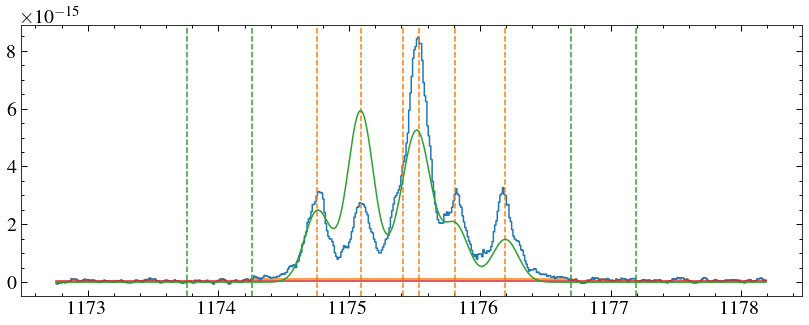

1954.9557171491688 18.137393503395717


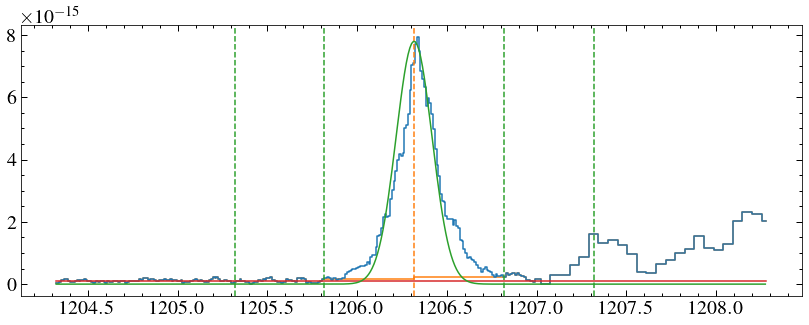

5144.2890540946255 31.12105703358484


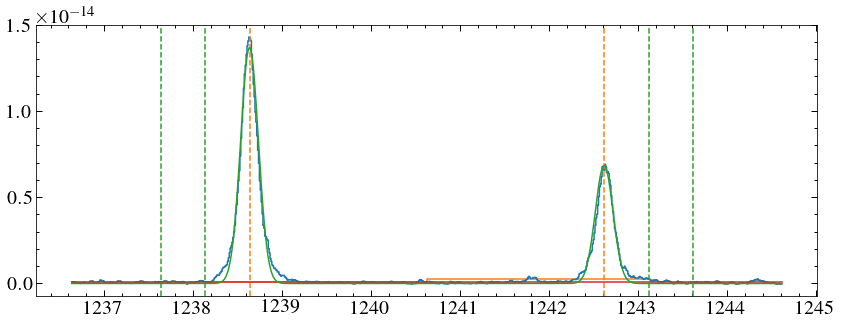

654.2600331367997 9.07444783485147


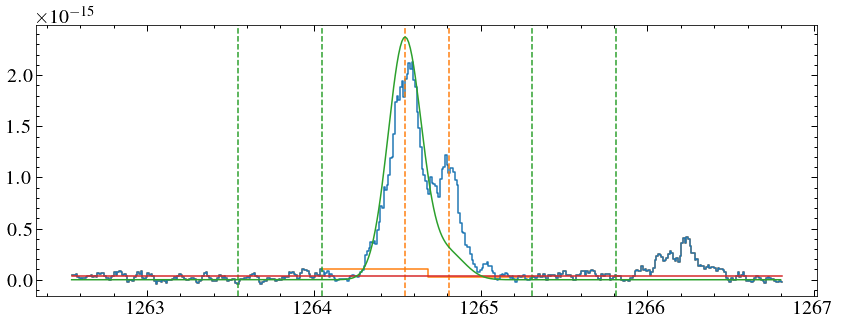

19.141941481330946 4.42102689875696


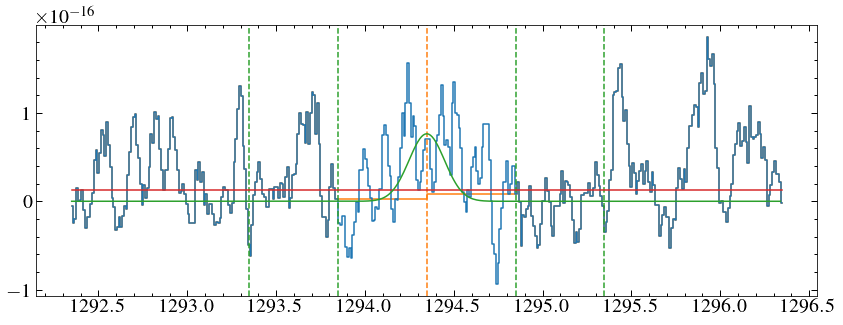

139.08100629864992 5.689402511019738


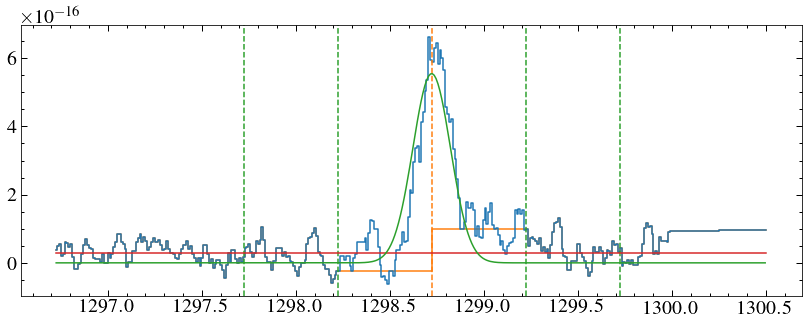

49.340575152740286 5.351639703517458


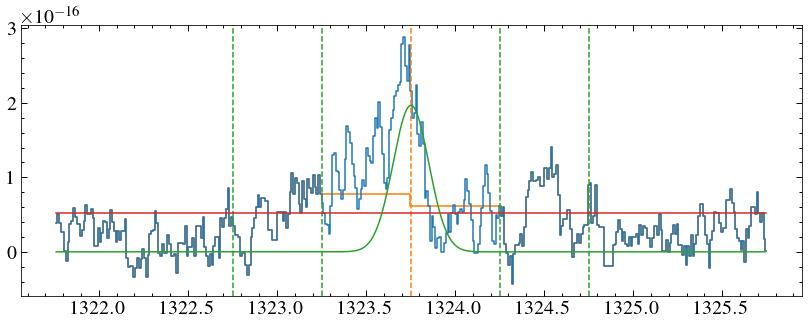

11047.579456214713 50.32957591286645


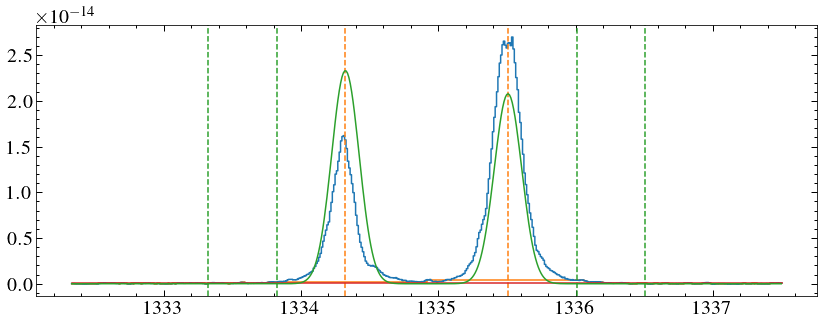

2679.4904151559385 84.45519453752233


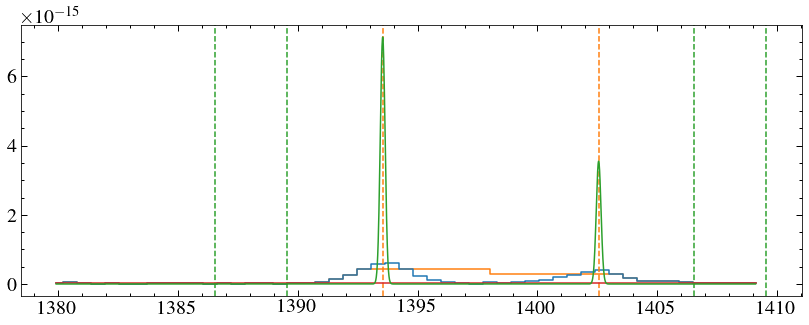

14188.203118860574 366.0430335810058


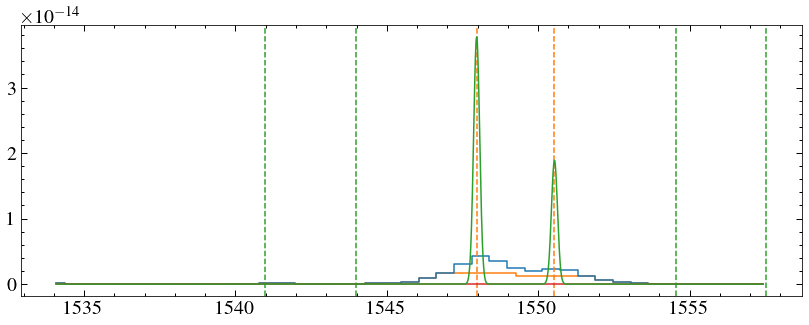

6440.929981888385 273.25671686162343


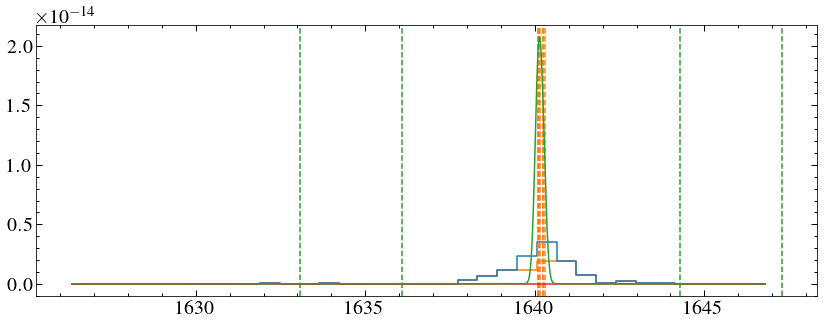

6127.880913851436 200.1095735327393


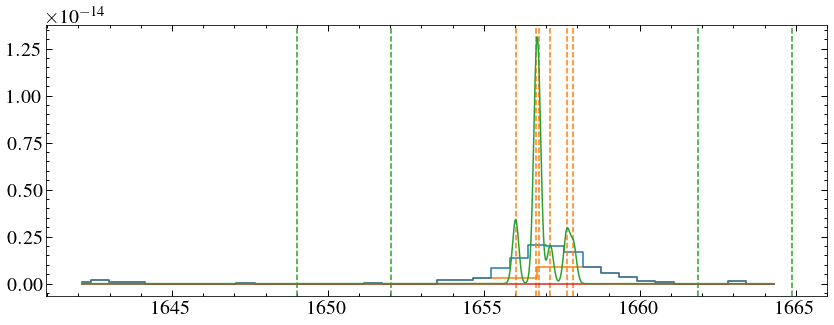

1987.443839701679 92.88209152554174


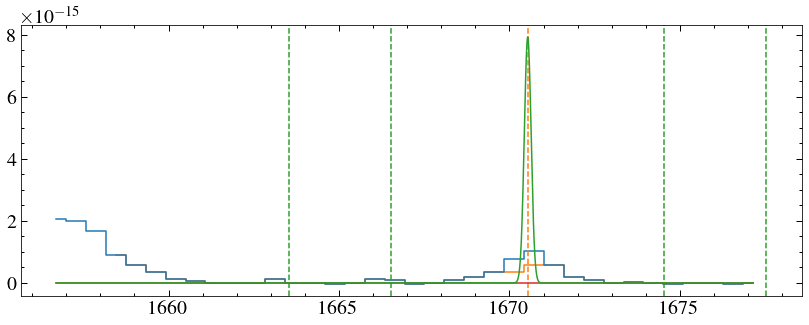

374396.5408784473 7074.396237028953


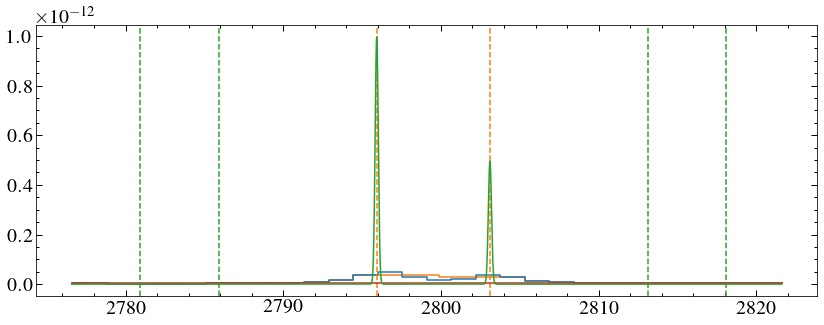

GJ699
4698.15016566919 75.48630816260639


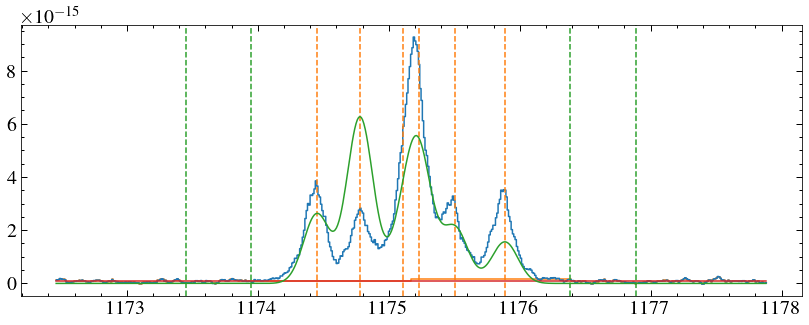

3380.843064238914 223.72310854238935


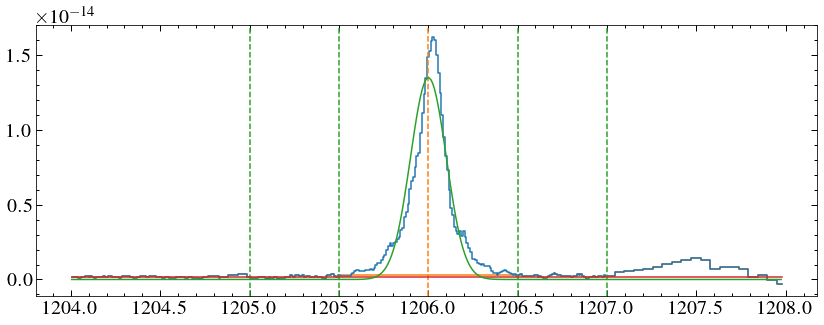

3929.154442747241 81.76484261921864


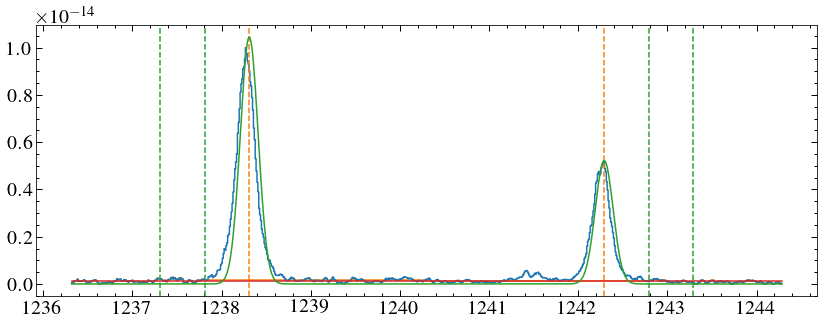

212.24371008684827 8.525811638145246


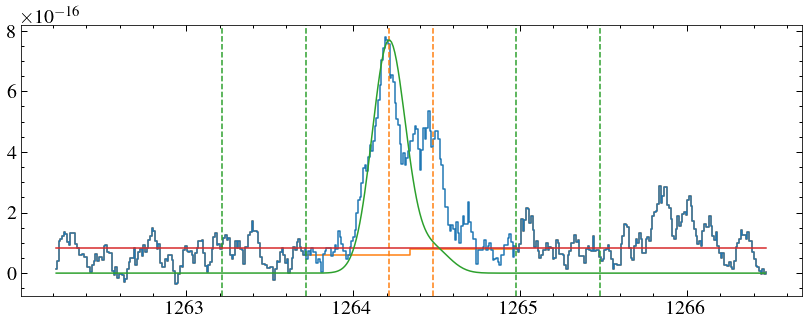

42.11787619194174 7.581243058544807


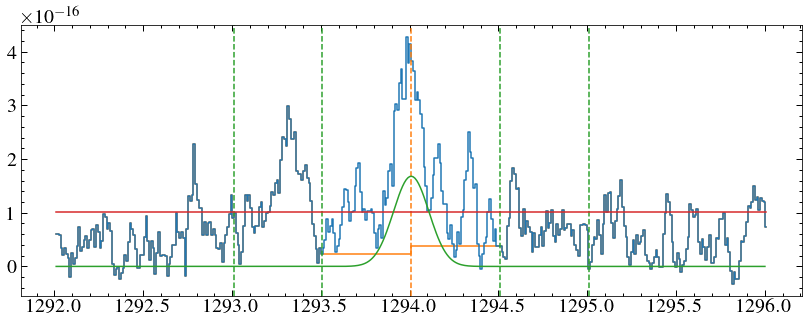

158.34091979659115 8.434803353896623


54.632121548407014 5.658837804004107


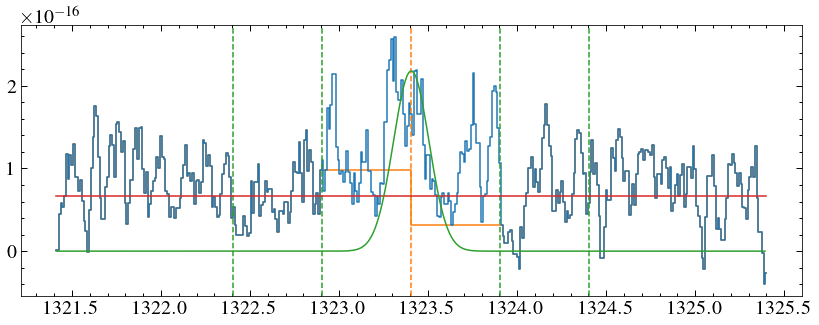

6522.055357014729 136.6587619722188


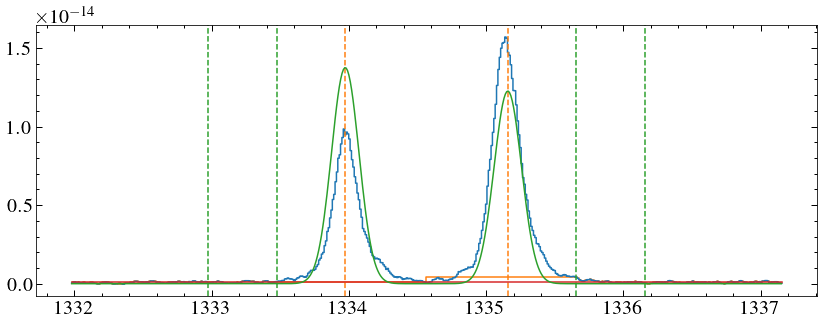

2208.404010981658 334.2619310777108


9737.291279531066 603.6253360334592


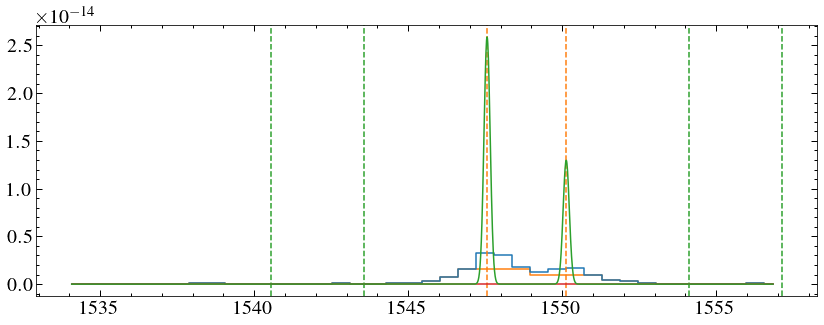

4759.005209273198 334.48576909674756


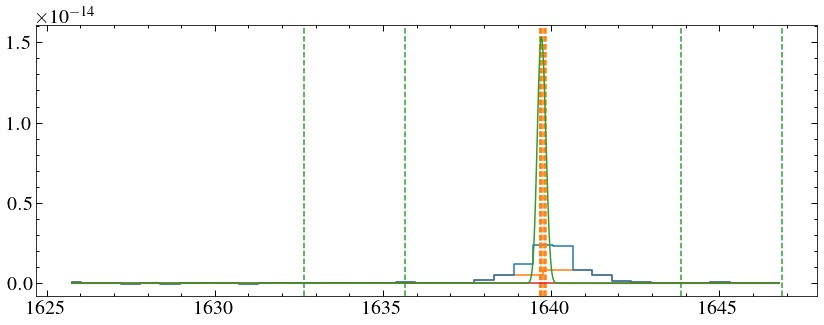

1539.355624700654 209.3252719988116


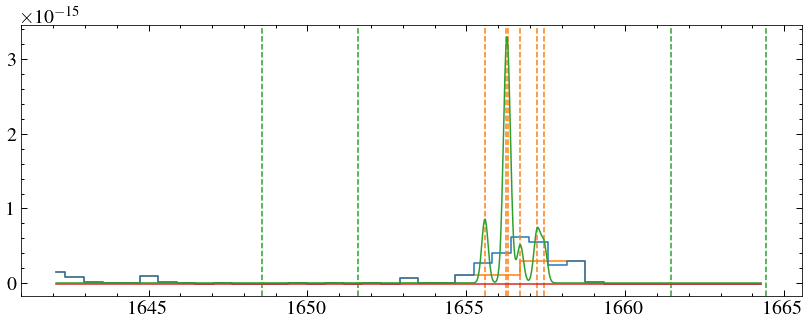

4008.072740209983 384.20323016513544


134337.61311086663 3317.076831746039


GJ729
6560.763691704411 2006.143300333566


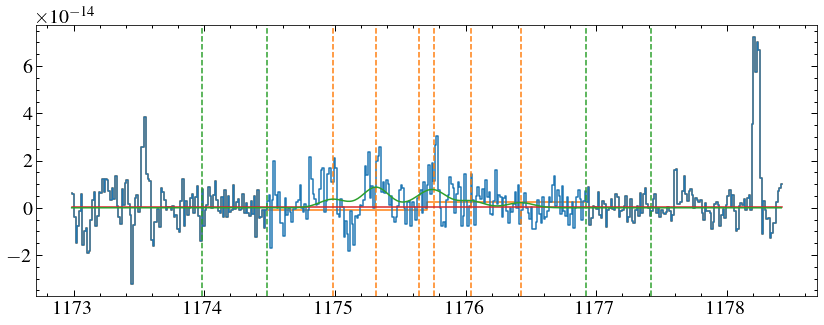

4395.120828608194 586.3056542849197


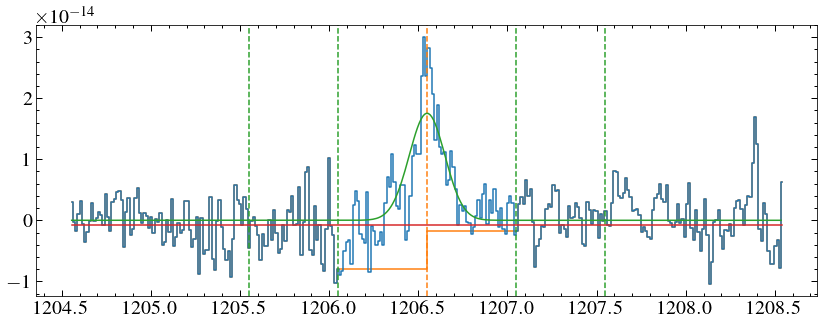

2490.8765382518714 794.4633601580052


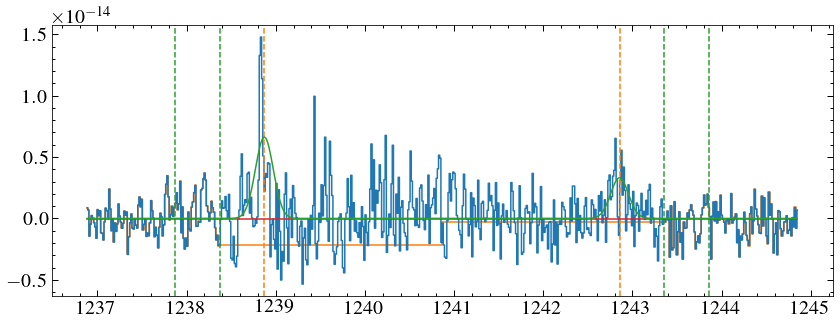

1560.568450838846 255.30424946966164


-296.86686042629356 734.9792105495209


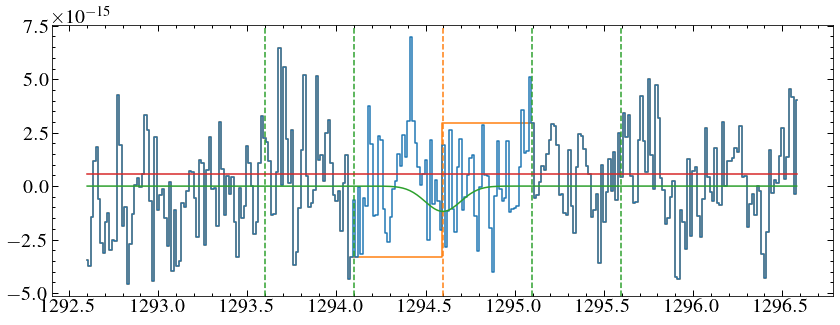

-514.092722784733 6260.081650574953


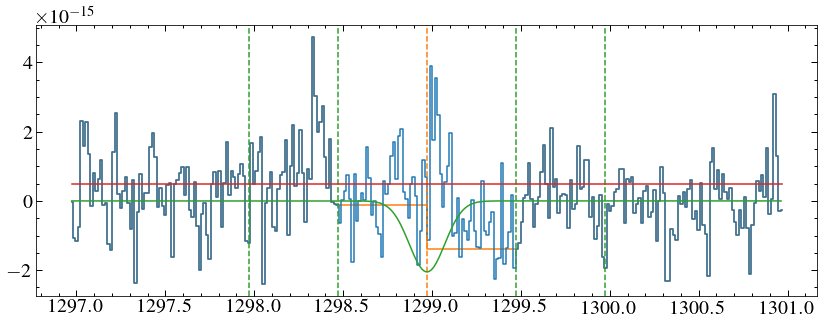

-506.2164253989173 197.24123794785316


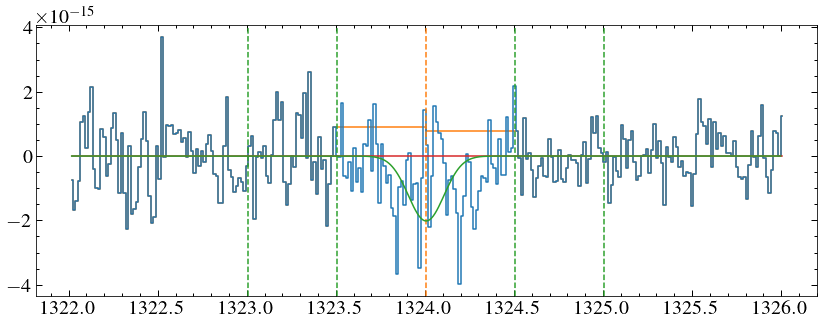

4286.355097115414 335.4681523595789


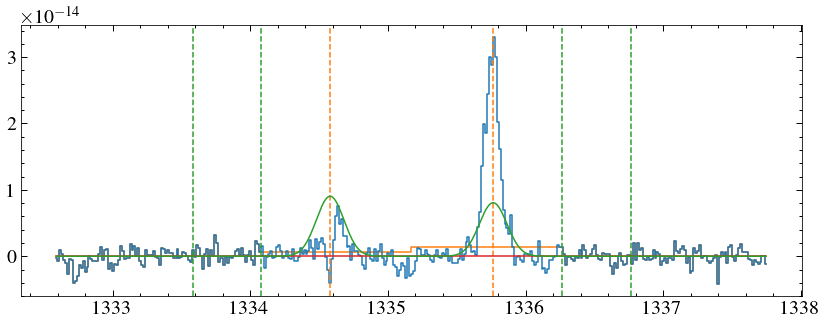

28176.283372835096 3980.695234703279


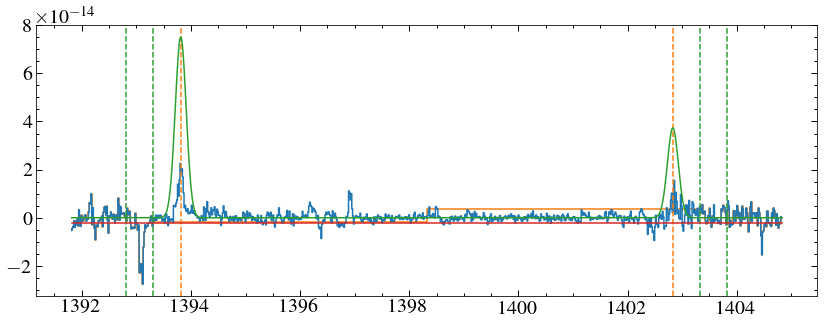

8210.572306617332 1675.758762857733


8202.23521255763 1142.1637101392002


-776.0866686537444 3124.7561830609684


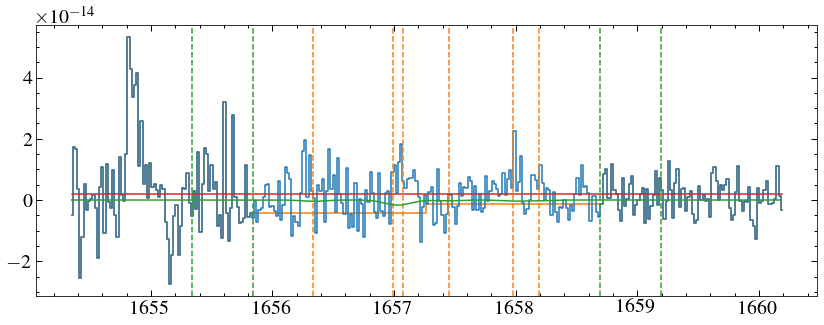

446.88773066189844 3363.120348959947


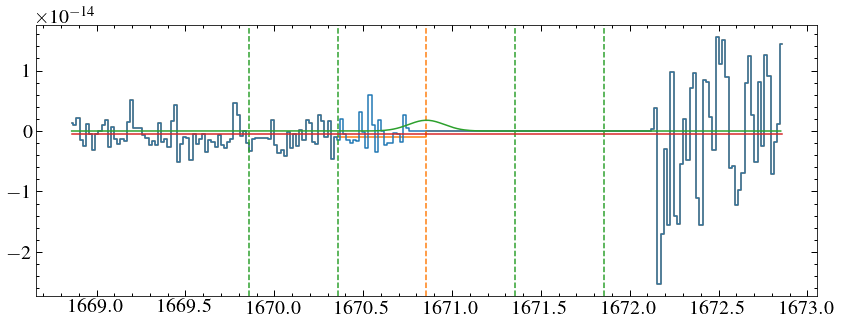

796998.2631016917 41867.93194216253


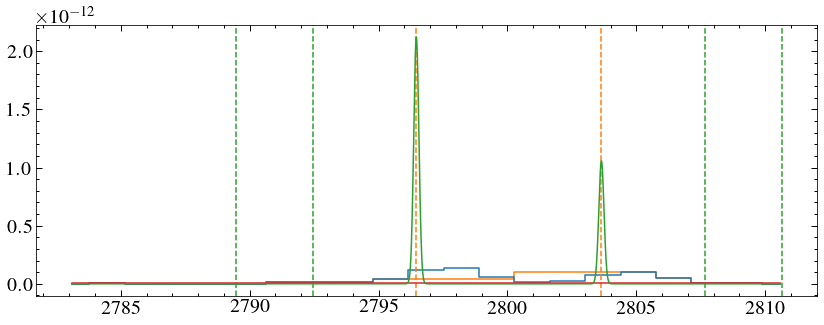

GJ849
3005.919536231306 22.319936258330394


2071.8702416887163 18.33356534363582


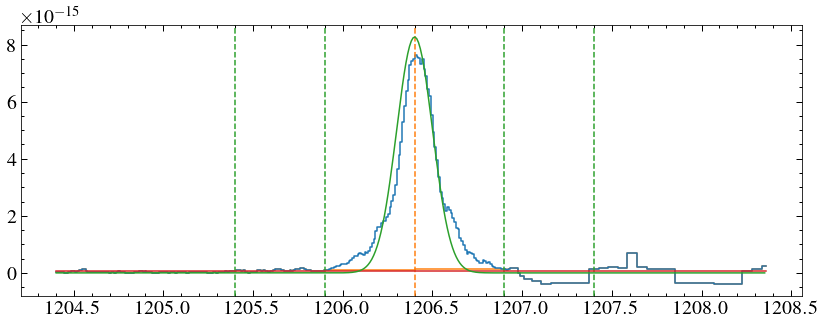

4464.973163012168 23.02614362957629


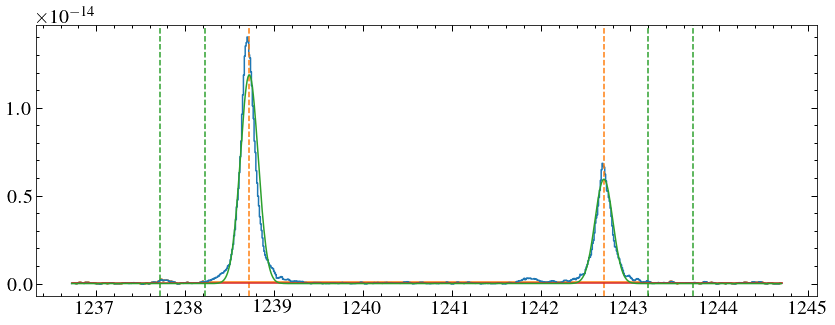

577.8379387088115 8.725877645861374


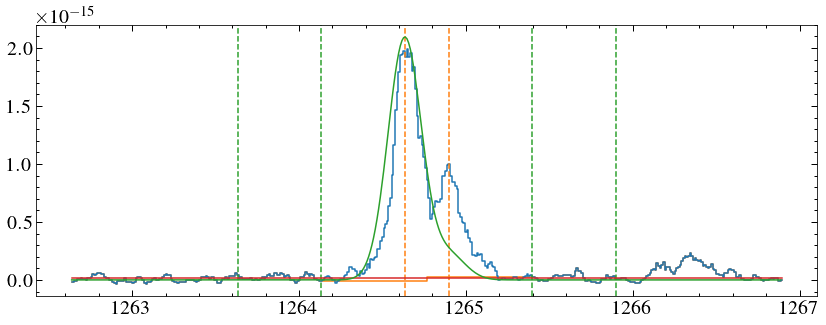

24.63910586463439 4.3714992239265476


158.91648315761597 6.241807372191199


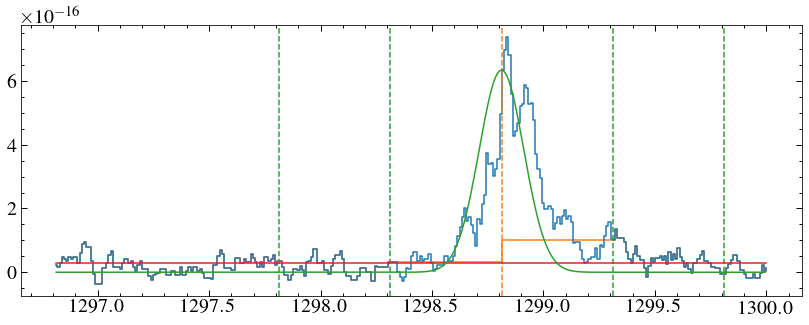

39.89605048748752 3.78957911785043


5864.776848881163 28.14529462052008


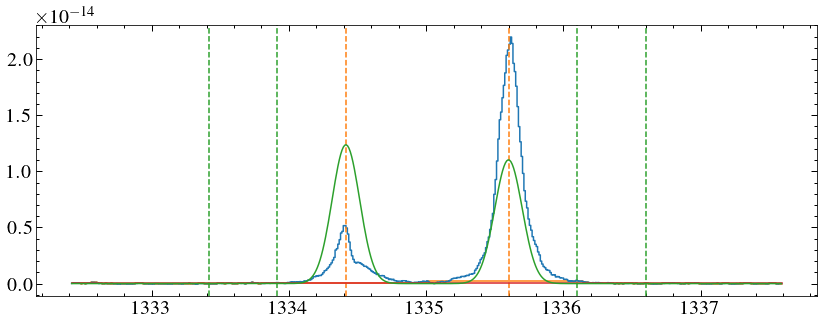

2504.4707715974546 25.177042559970936


10662.5507342178 73.89050581965027


4228.528449903442 67.11682155258325


3893.538493345918 60.73172927572568


716.2494724364024 22.89423025491431


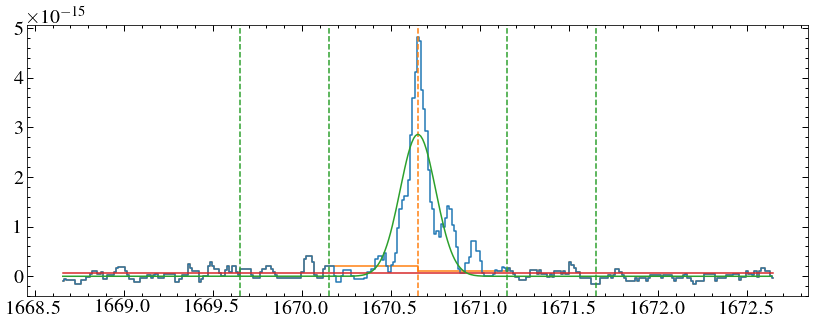

124692.88636467204 3632.893025983257


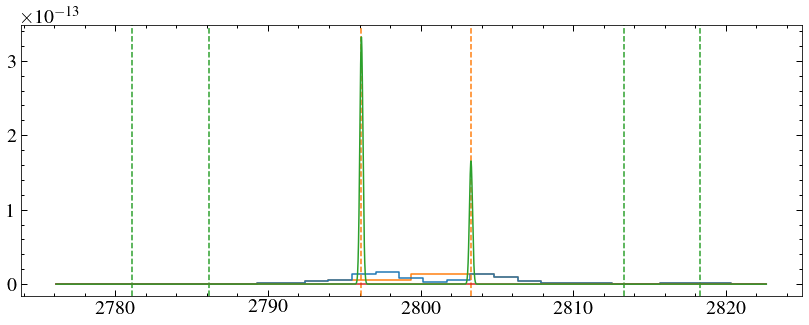

LHS-2686
3199.399440867476 39.132568285962215


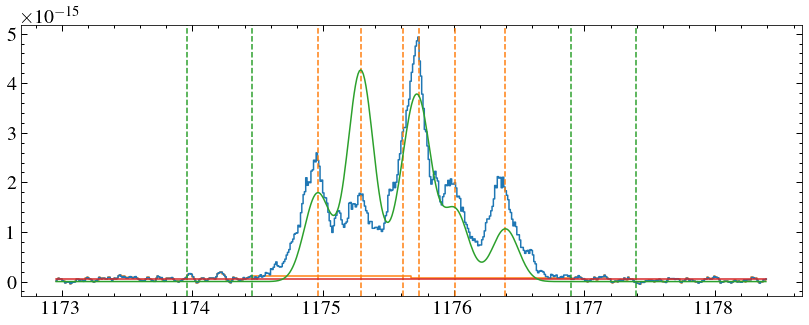

977.9310406938476 14.378776389309518


2372.9792979178164 27.394457622111034


125.64252426352411 5.103136556933938


113.75931848150441 5.470719660716821


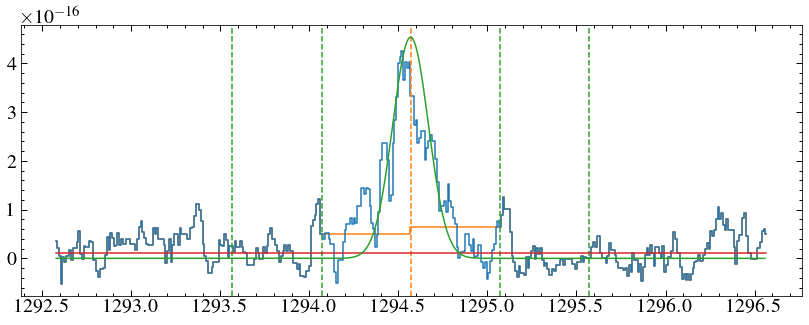

164.43011390582572 6.731181889957355


39.028819948514695 4.392963581158495


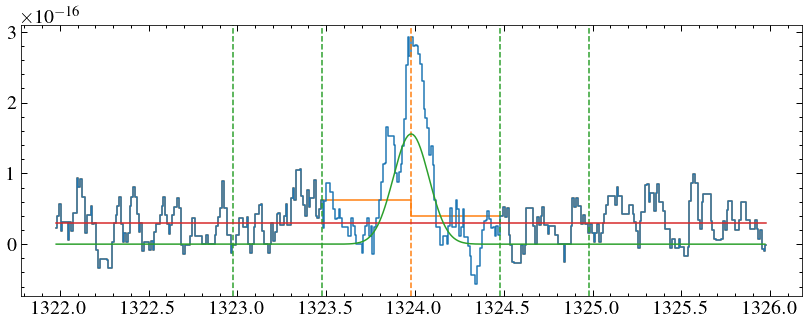

2748.546257418239 29.517080010779807


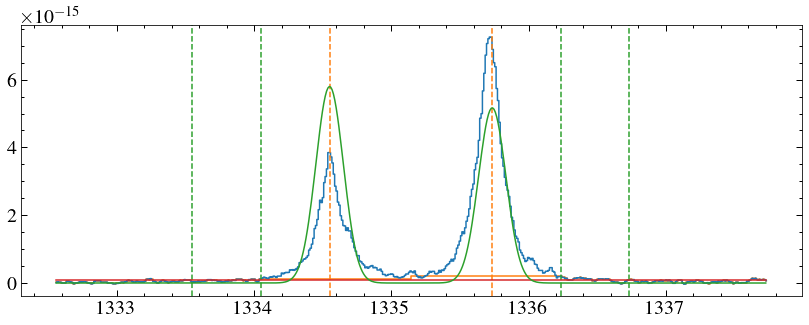

2575.088280105959 314.09006076853746


9292.267490994696 1115.6044825016231


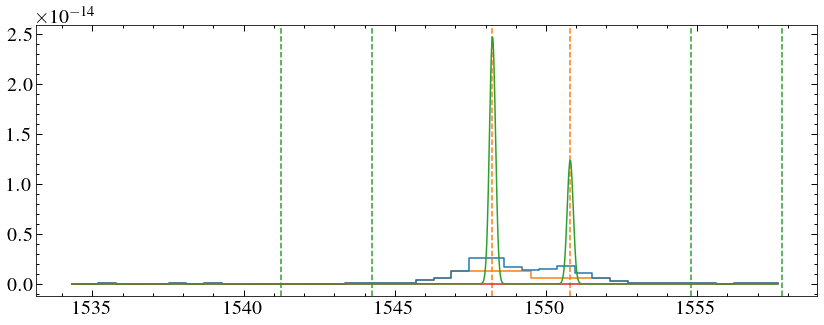

2409.6275543729043 369.06659653055004


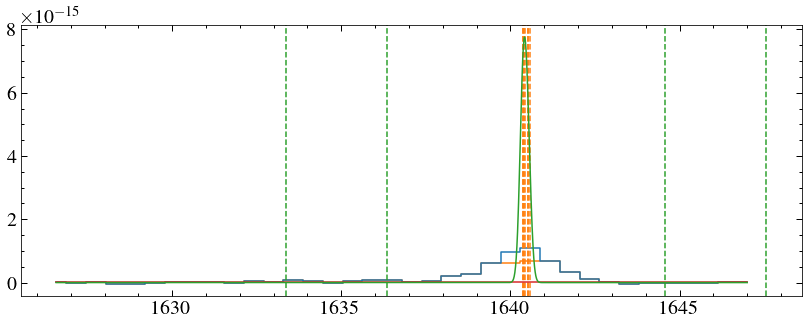

997.6842769764637 118.73902723161031


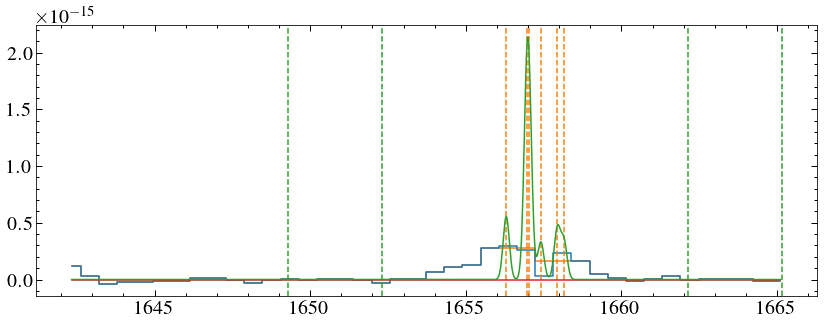

385.8948502985055 65.46635698922148


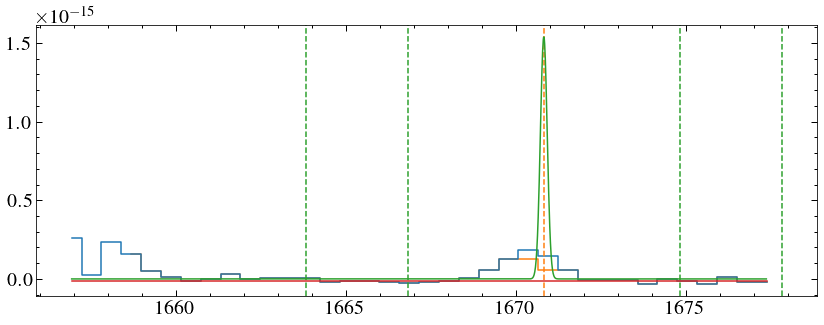

35892.55569136676 2234.292671528871


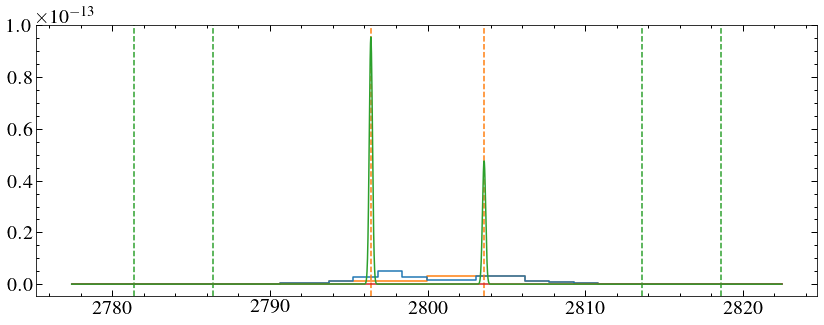

2MASS-J23062928-0502285
84.50215852476981 5.200312842694893


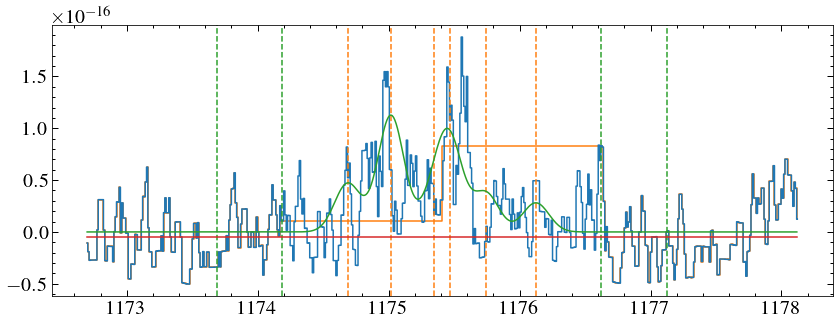

34.59495037635122 3.0643951072076927


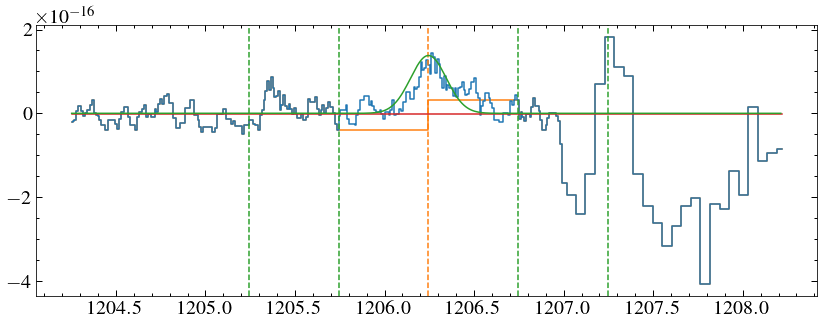

61.41520315741295 5.46053916204164


-3.6517884153392894 2.185873192270966


0.3943533550289657 3.53846276808007


-0.7301515896041227 4.077324891761371


4.93506703014672 8.601582838238917


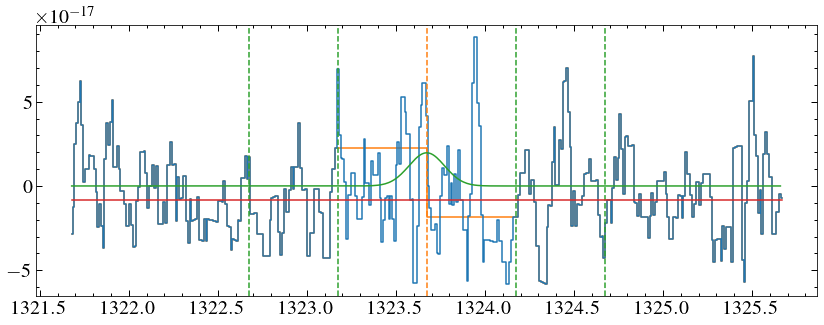

96.56660542297044 5.157305277361569


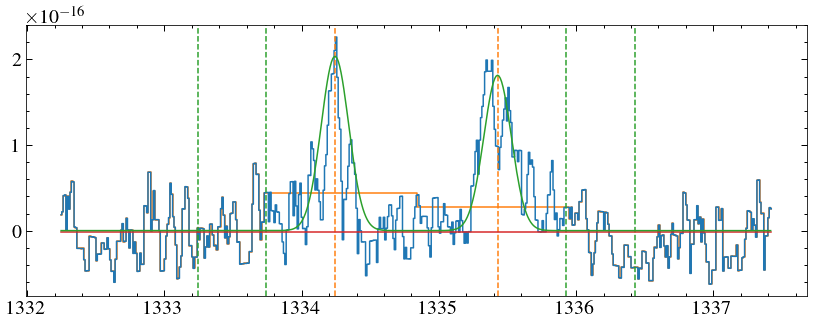

70.3547605397171 9.943079728135345


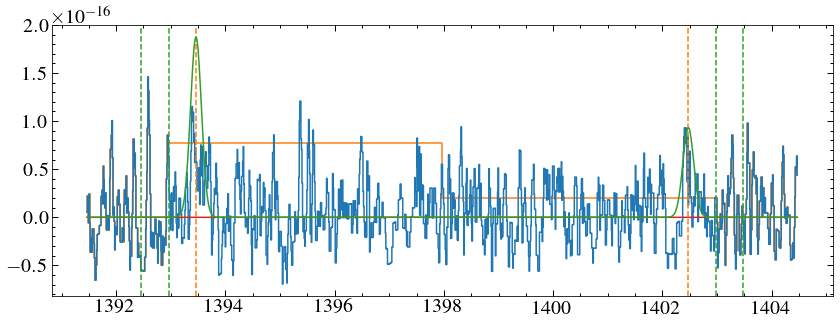

145.75124562517118 12.670641288334345


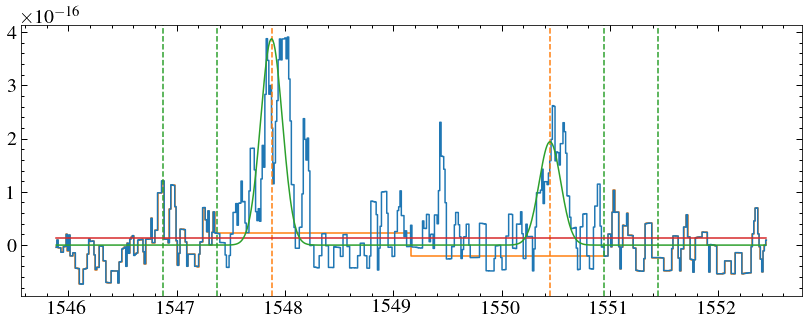

23.476522387250224 20.596207083318912


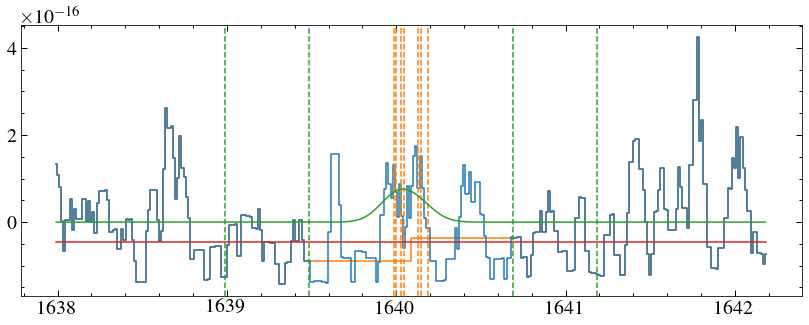

10.535397661021804 26.7685600256052


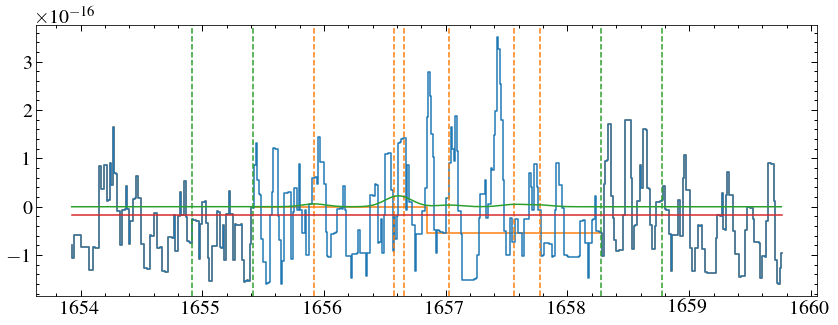

20.207752842231443 15.496647450944117


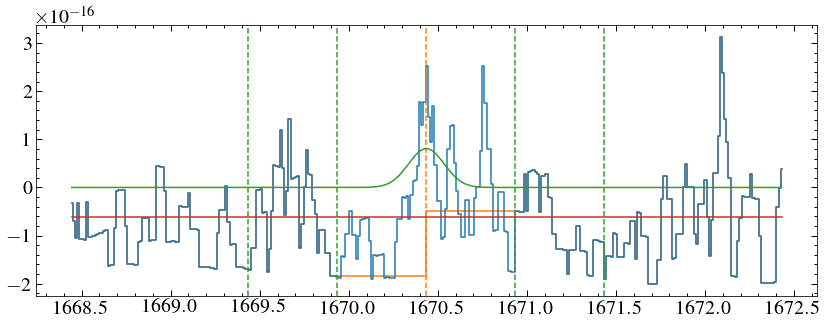

1776.9571715677196 533.8746519345896


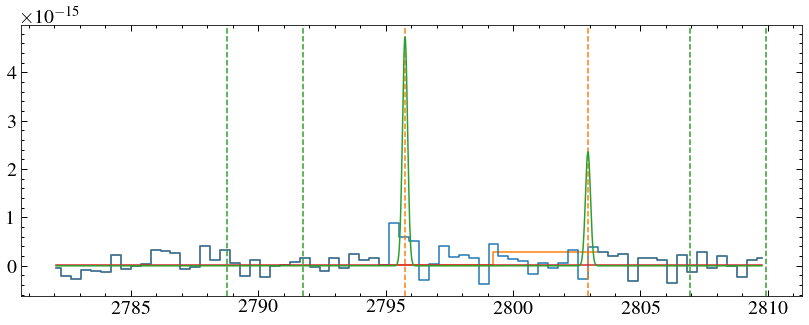

GJ674
49519.930593679455 1264.0663495518297


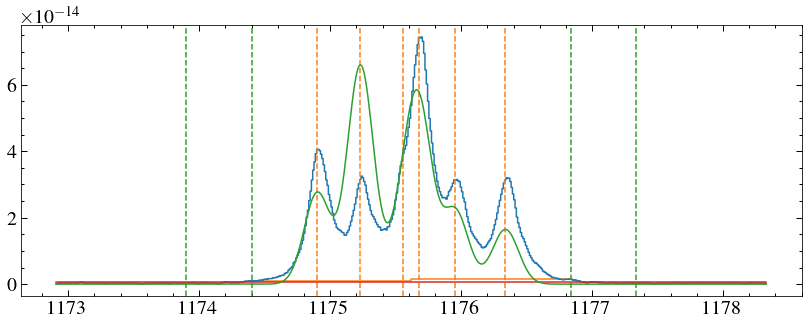

27411.51998167936 1270.2324724301106


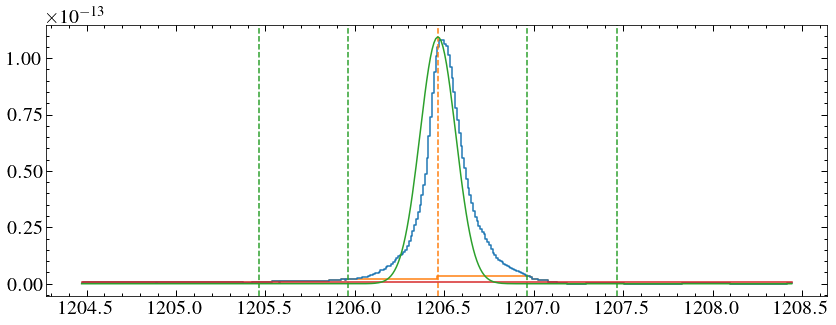

21626.17102436264 463.0538527040635


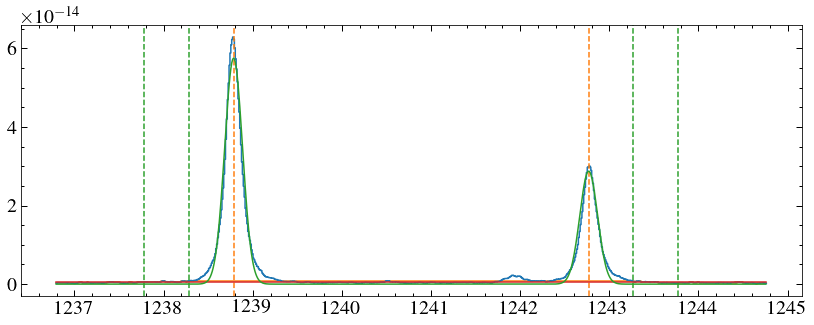

2324.9350978409293 64.90565748036047


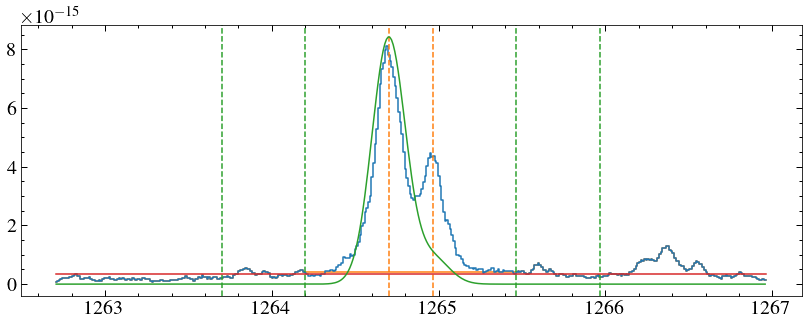

2211.71832440008 136.65191840266098


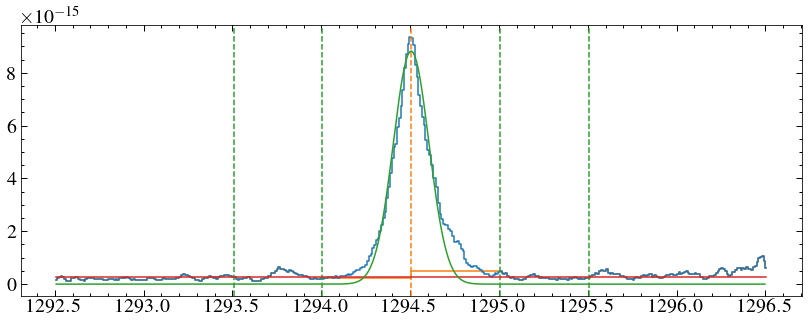

3591.87073961652 189.01428757716172


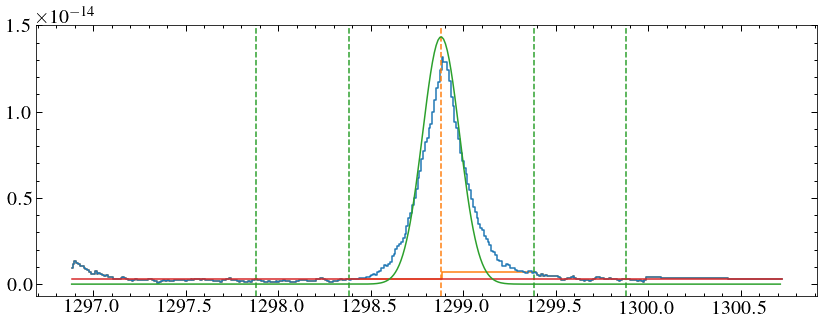

585.4179205885182 37.94670854082877


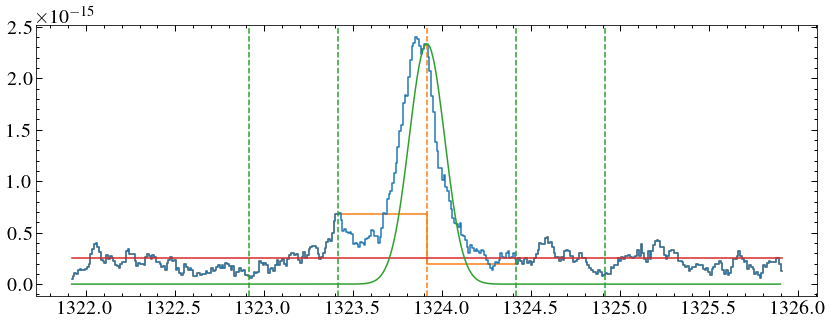

45298.33705166947 1167.0184308425141


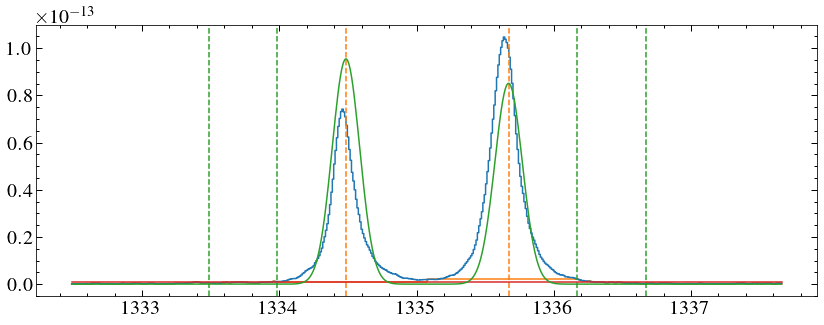

18775.23189459904 1661.9743822155024


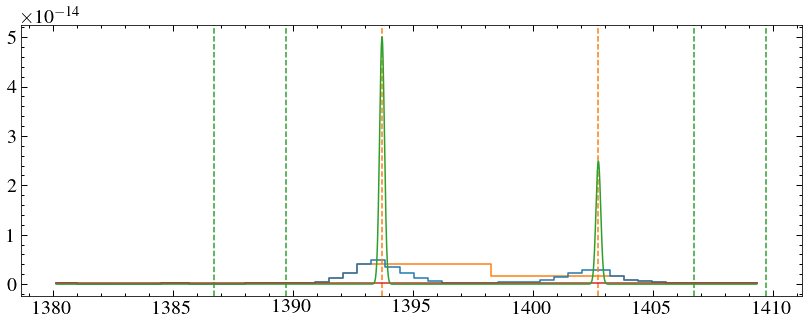

58885.631416643955 3233.923185169632


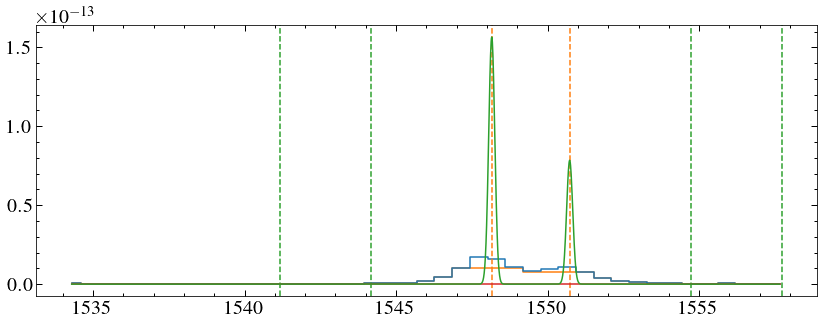

24966.828622881454 1103.3007277476945


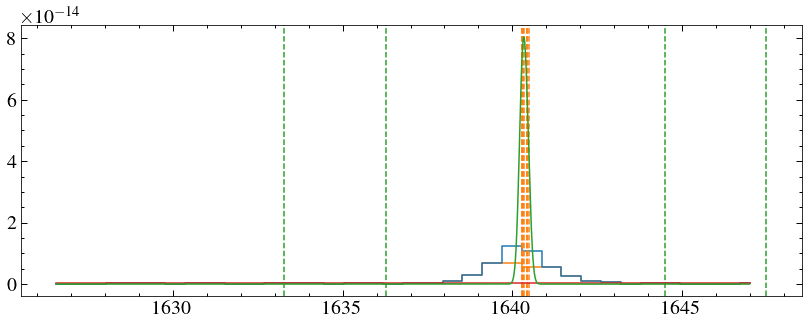

13187.138974153695 496.289192254957


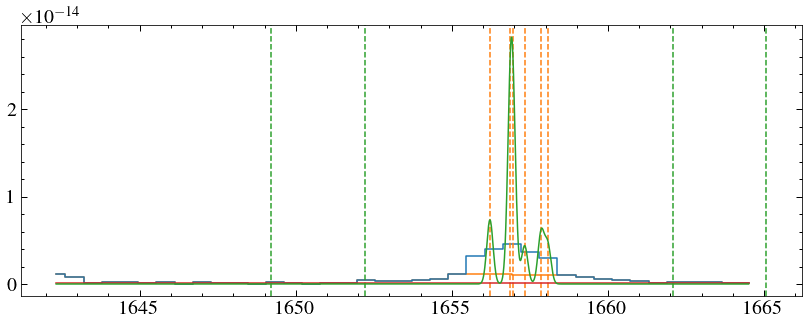

3688.655286185782 253.71543492355198


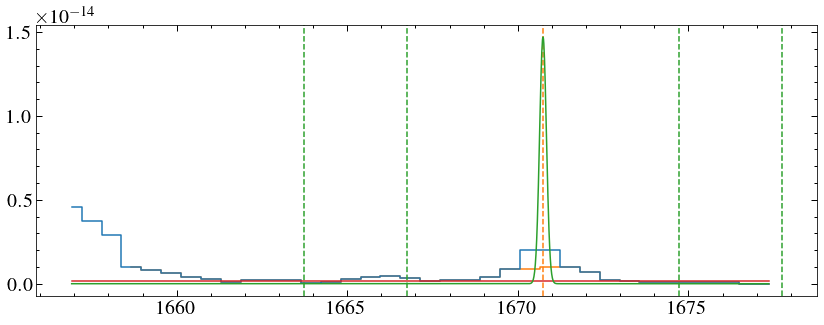

557921.8912380268 11015.57658108192


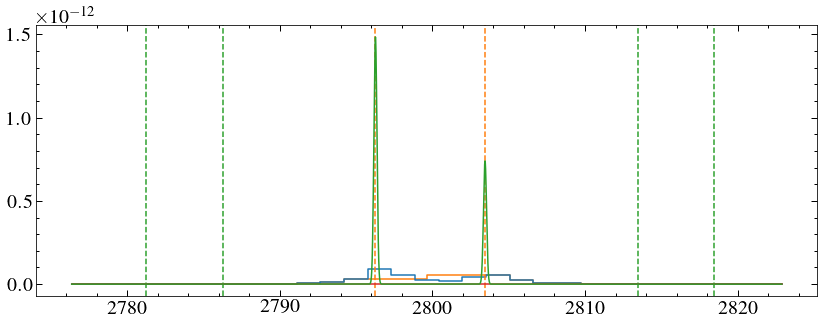

L-980-5
307.6538795511636 8.74613320477904


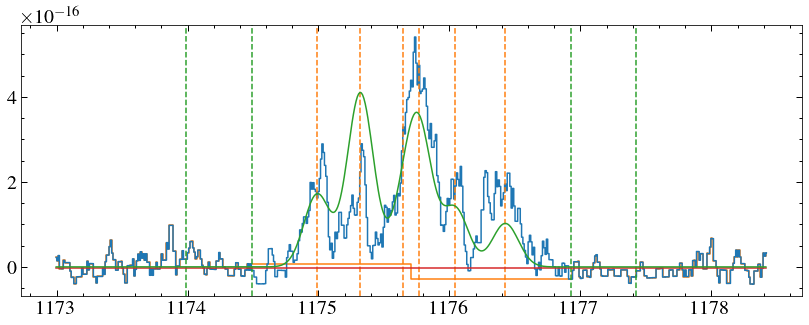

191.93268883913757 8.816387155649535


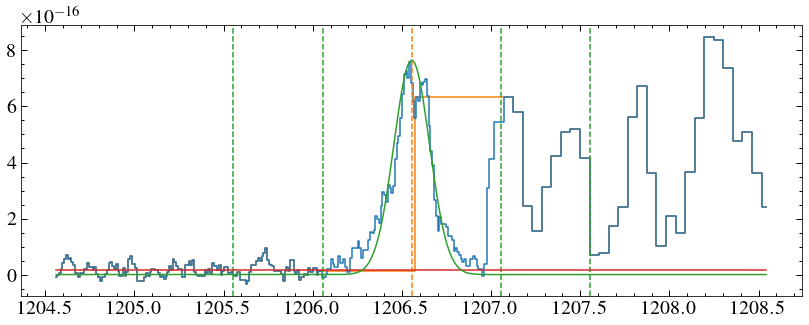

199.18776082834444 7.424455335866656


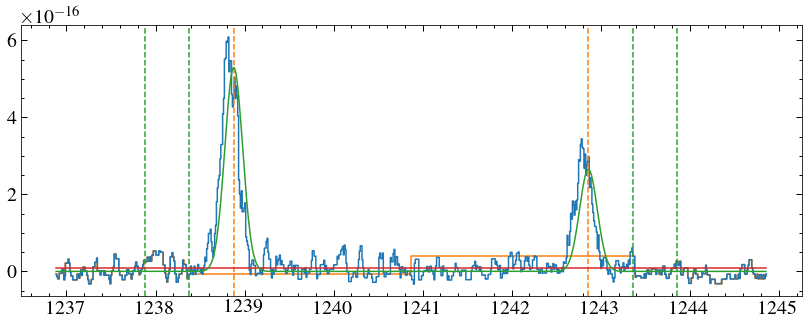

18.14955562839089 2.4171915229484133


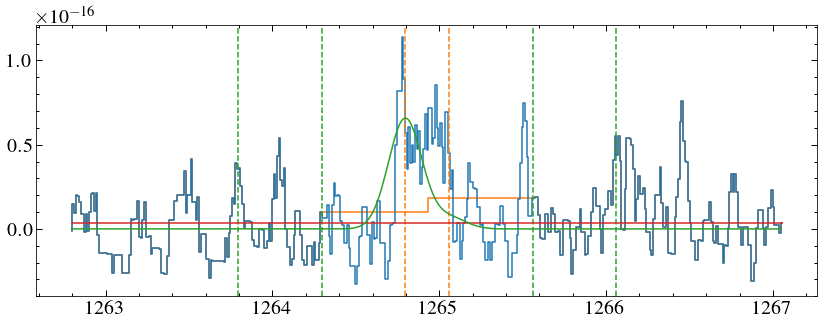

12.472419999980954 2.967922538281217


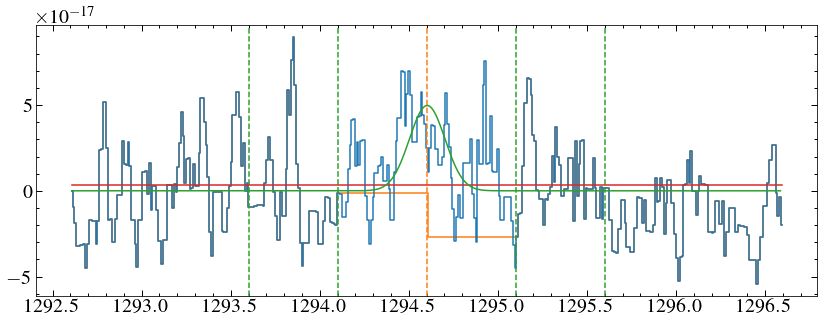

29.246632166208148 3.4047559245546863


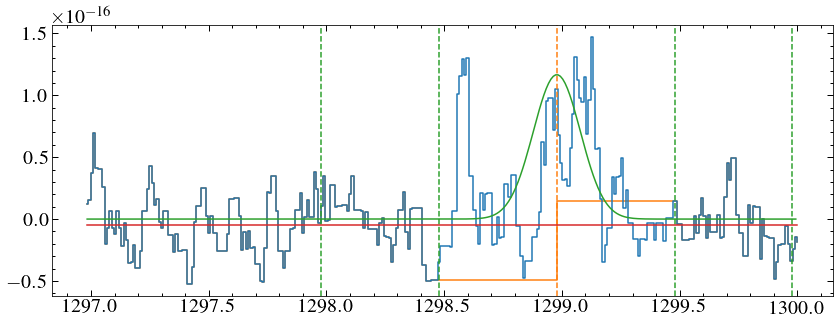

4.473927737814882 3.460747462725073


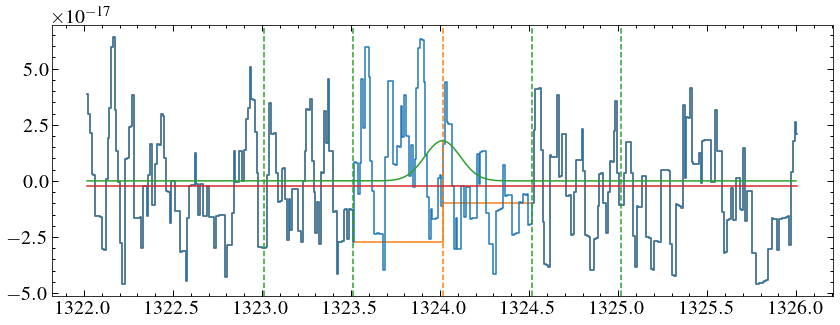

375.3387618730582 10.618378425560197


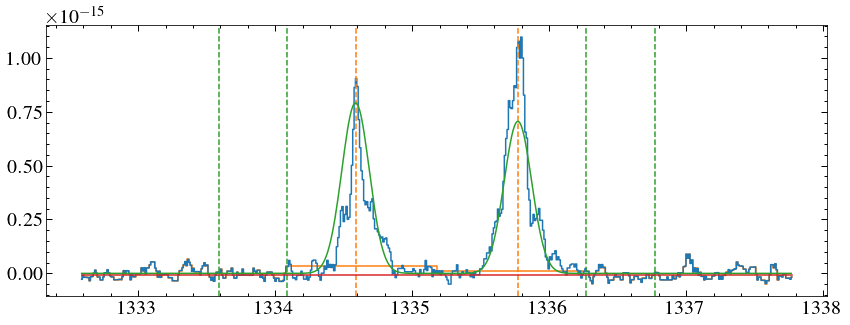

285.1560868436489 11.242787068225564


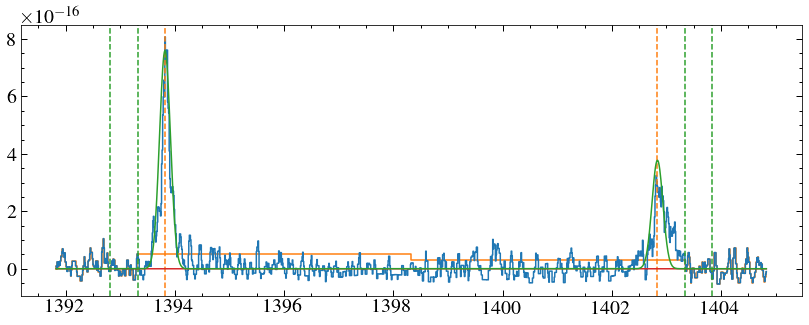

898.3053354972678 30.92824185546505


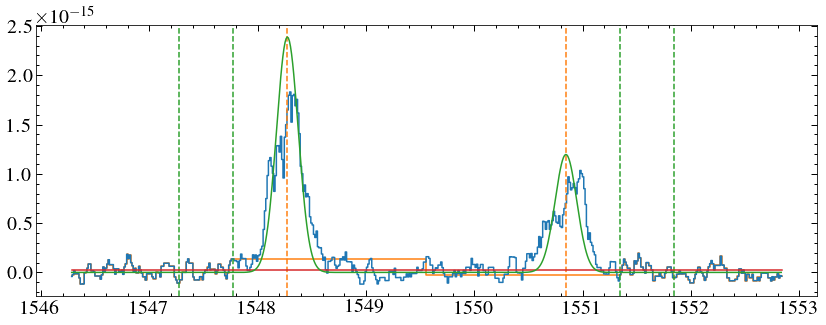

318.03681089524025 15.622249199521406


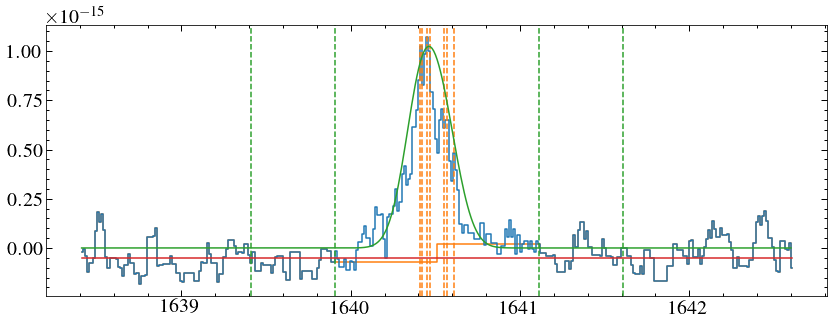

63.08103207589437 17.391947953823657


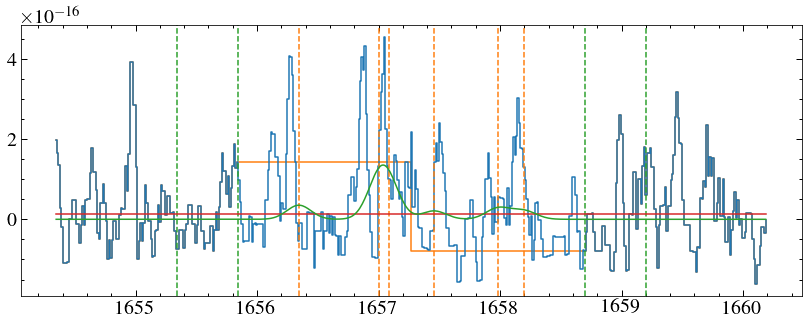

108.69589361482457 10.906604477420377


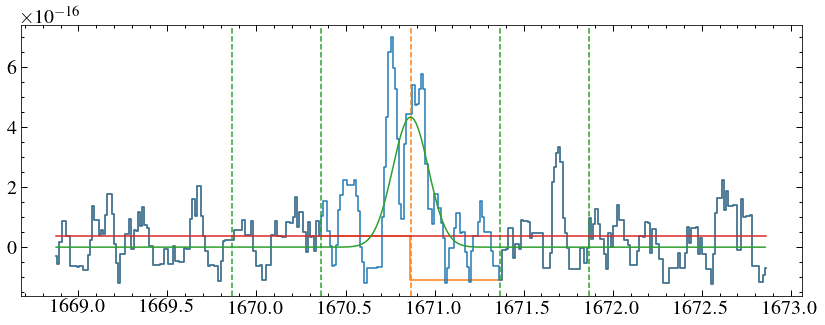

4761.639872099901 1219.1724259228774


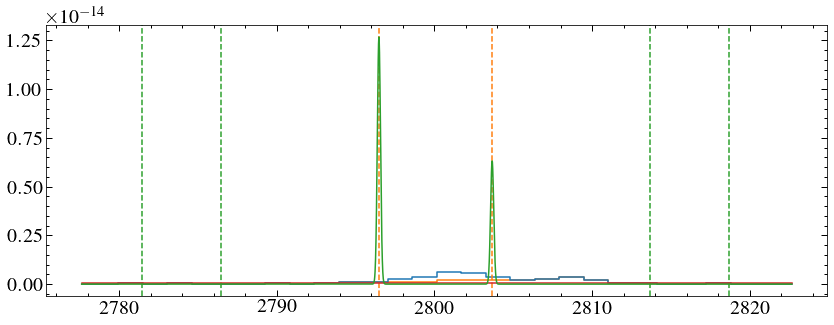

In [14]:
def wavelength_edges(w):
    """
    Calulates w0 and w1
    """
    diff = np.diff(w)
    diff0 = np.concatenate((np.array([diff[0]]), diff)) #adds an extravalue to make len(diff) = len(w)
    diff1 = np.concatenate((diff, np.array([diff[-1]]))) #adds an extravalue to make len(diff) = len(w)
    w0 = w - diff0/2.
    w1 = w + diff1/2.
    return w0, w1

def mask_maker(x, pairs, include=True):
    """
    creates a mask for a spectrum that excudes between pairs from an array
    """
    b = pairs[::2]
    r = pairs[1::2]
    C = np.zeros_like(x,dtype='bool')
    for i in range(len(b)):
        C |= (x>b[i])&(x<r[i])
    if include:
        return ~C
    else:
        return C

def make_line_mask(w, grouped_lines, dv=0*u.km/u.s): 
    """
    makes a list of wavelength ranges to cut
    """
    pairs = []
    for group in grouped_lines:
        group =  dv.to(u.AA, equivalencies=u.doppler_optical(group*u.AA)).value
        pairs.append(min(group)-0.5)    
        pairs.append(max(group)+0.5)
    mask = mask_maker(w, pairs)
    return mask


fitter = fitting.LinearLSQFitter()



for j, spec in enumerate(specs):
 
#     print(spec)
    # plt.figure(figsize = (4*len(doublets), 10))
    # gs = GridSpec(2, 4)
    data = fits.getdata(spec, 1)
    star = fits.getheader(spec)['TARGNAME']
    # if star == 'GJ163':
    if star in stars:
        allfluxes = []
        allerrors = []
        print(star)
        # print(j)
        # print(dv_guess[j])
        # stars.append(star)
        w, f, e, inst = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['INSTRUMENT']
        # lines = line_list[(line_list['Likelihood to measure'] == 'High') | (line_list['Likelihood to measure'] == 'Medium')]['Wavelength']

        smooth =5 

        # dvs = []
        # dv_es = []

        # for i, lines in enumerate(doublets):
    #         plt.subplot(1, len(doublets) , i+1)
            # plt.subplot(gs[0, i])
        for i, lines in enumerate(line_groups):
            # if  1670.787 in lines:
            stat_lines = np.copy(lines) 
            lines = (final_dv[j]*u.km/u.s).to(u.AA, equivalencies=u.doppler_optical(lines*u.AA)).value
            mask = (w >= min(lines)-7-7) & (w <= max(lines)+7)
            if np.median(inst[mask]) in [1, 2, 16]:
                mask = (w >= min(lines)-2) & (w <= max(lines)+2)
            elif np.median(inst[mask]) in [128]:
                mask = (w >= min(lines)-20) & (w <= max(lines)+20)
            wi, fi, ei = w[mask], f[mask], e[mask]
            # print(fi)
            meane = np.mean(ei)
            for k in range(len(ei)):
                if ei[k] == 0.0:
                    ei[k] = meane
            # print(ei)



            if np.median(inst[mask]) in [1, 2]:
                fi = convolve(fi,Box1DKernel(smooth))
                ei = convolve(ei,Box1DKernel(smooth))/smooth**0.5

            cmask = make_line_mask(wi, line_groups, dv=final_dv[j]*u.km/u.s)
            wc, fc, ec, = wi[cmask], fi[cmask], ei[cmask]
            plt.step(wi, fi, where='mid')
            plt.step(wc, fc, where='mid', zorder=-1)
            [plt.axvline(line, ls='--', c='C1') for line in lines]


            c_gap = [4, 7]#distance from lines for continumm calculation
            # std_guess = 0.5
            if np.median(inst[mask]) in [1, 2, 16]:
                c_gap = [0.5, 1] 
            if np.median(inst[mask]) in [128]:
                c_gap = [10, 15] #distance from lines for continumm calculation

            fit_mask = (wc >= (min(lines)-c_gap[1])) & (wc <= (min(lines)-c_gap[0])) | (wc >= (max(lines)+c_gap[0])) & (wc <= (max(lines)+c_gap[1]))
            linemask = (wi >= (min(lines)-c_gap[0])) & (wi <= (max(lines)+c_gap[0]))


            if 1206.499 in stat_lines: #hits the lower SN G140m spectrum at the red end so cutting off the fit
                fit_mask = (wc >= (min(lines)-2)) & (wc <= (min(lines)-c_gap[0])) 
                linemask = (wi >= (min(lines)-c_gap[0])) & (wi <= (max(lines)+0.3))



            [plt.axvline(line, ls='--', c='C2') for line in [min(lines)-c_gap[1], min(lines)-c_gap[0], max(lines)+c_gap[0], max(lines)+c_gap[1]]]
            # mod_init = models.Polynomial1D(4)
            mod_init = models.Const1D(1)
            weights = 1/ec[fit_mask]
            weights = np.nan_to_num(weights, 0)
            # print(weights)
            # print(ec[fit_mask])
            mod_fit = fitter(mod_init, wc[fit_mask], fc[fit_mask])#, weights=1/ec[fit_mask])
            plt.plot(wi, mod_fit(wi), c='C3')

            lw, lf, le = wi[linemask], fi[linemask], ei[linemask]
            # plt.plot(wi[linemask], fi[linemask], c='C4')

            w0, w1 = wavelength_edges(lw)
            lineflux = np.sum((w1-w0)*lf)
            # print(lineflux*1e18)
            # lineflux = np.trapz(lf, lw)
            # print(lineflux*1e18)
            line_error = (np.sum(le**2 * (w1-w0)**2))**0.5
            cflux = np.sum((w1-w0)*mod_fit(lw))
            cerror = (line_error/abs(lineflux))*abs(cflux)
            flux = lineflux - cflux
            flux_error = (line_error**2+cerror**2)**0.5
            print(flux*1e18, flux_error*1e18)

            modlines = models.Const1D(0)
            # modlines = mod_fit
            oss = line_oss[i]
            sum_oss = np.sum(oss)
            # ampsum = 0
            for k, line in enumerate(lines):
                stdmod = 0.1
                fmod = flux * (oss[k]/sum_oss) 
                amp = fmod/(stdmod*(2*np.pi)**0.5)
                # ampsum += amp
                modlines = modlines+models.Gaussian1D(amplitude=amp, mean=line, stddev = stdmod)
            wmod = np.arange(wi[0], wi[-1], 0.01)
            plt.plot(wmod, modlines(wmod))
            
            if flux > flux_error:
                allfluxes.append(flux)
                allerrors.append(flux_error)
            else:
                allfluxes.append(flux_error)
                allerrors.append(-1.0)
                


            plt.show()
        allfluxes = np.array(allfluxes)
        allerrors = np.array(allerrors)
        if star == '2MASS-J23062928-0502285':
            star = 'TRAPPIST-1'
        savdat = Table([line_names_mult, line_tab*u.AA, allfluxes*u.erg/u.s/u.cm**2/u.AA, allerrors*u.erg/u.s/u.cm**2/u.AA], names=['Line', 'Wavelength', 'Flux', 'Error'])
        ascii.write(savdat, 'line_tables/{}_line_fluxes.ecsv'.format(star), format='ecsv', overwrite=True)


How big is the Mg II line really?

In [15]:
# datah= fits.getdata('/media/david/2tb_ext_hd/hddata/mega_muscles/gj699_e230h/odn904050_x1d.fits',1)
# datal = fits.getdata('/media/david/2tb_ext_hd/hddata/mega_muscles/v10_hlsp/GJ699/hlsp_muscles_hst_stis_gj699_g230l_v10_component-spec.fits', 1)

In [16]:
# for dt in datah:
#     plt.step(dt['WAVELENGTH'], dt['FLUX'], where='mid')

# plt.step(datal['WAVELENGTH'], datal['FLUX'], where='mid', lw=2, c='C0')
# plt.xlim(2787, 2801)
# plt.yscale('log')
# plt.ylim(9e-16)

In [17]:
# ((2*np.pi)**0.5)*9.1e-15*0.2

In [18]:
stars

['GJ1132',
 'GJ15A',
 'GJ163',
 'GJ649',
 'GJ676A',
 'GJ699',
 'GJ729',
 'GJ849',
 'LHS-2686',
 '2MASS-J23062928-0502285',
 'GJ674',
 'L-980-5']

In [19]:
g1=  [1.56e-01,7.80e-02]
g2 = [6.9591e-01, 2.8995e-01, 1.3592e-02, 1.4498e-01, 6.2629e-01, 6.9588e-02, 1.3593e-02]

print(g1[0]/g1[1])
print(g2[0]/g2[1])

print(g1[0]/np.sum(g1), g1[1]/np.sum(g1))
print(g2[0]/np.sum(g2), g2[1]/np.sum(g2))
print((g2[0]/np.sum(g2))/(g2[1]/np.sum(g2)))



2.0
2.4001034661148477
0.6666666666666667 0.33333333333333337
0.375375626448633 0.15639976848842682
2.4001034661148477


Make line models, spin off into a script later.

GJ1132


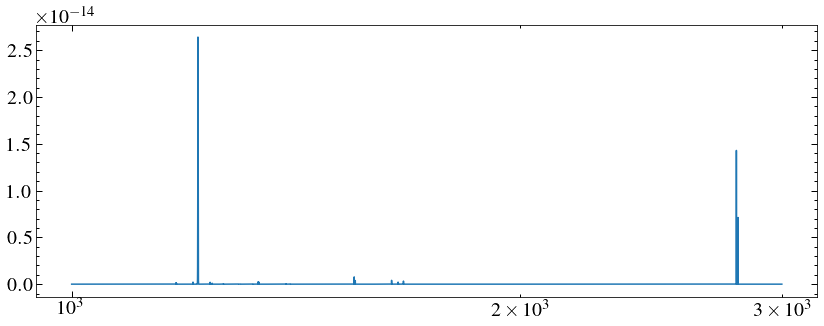

GJ15A


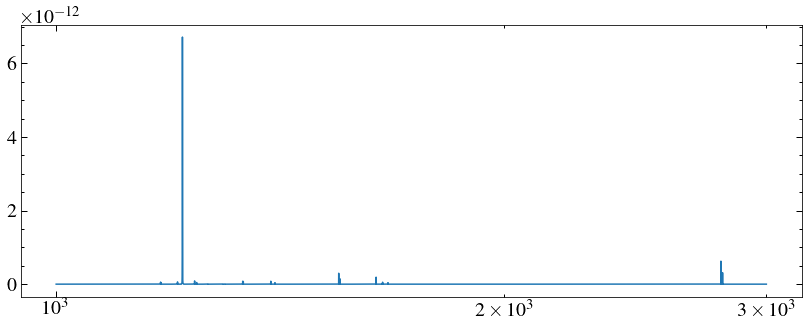

GJ163


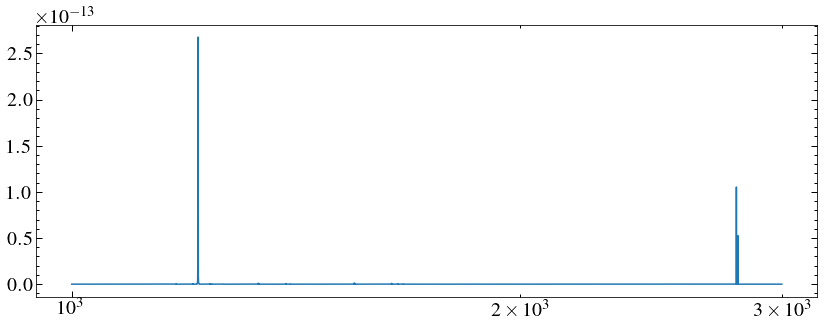

GJ649


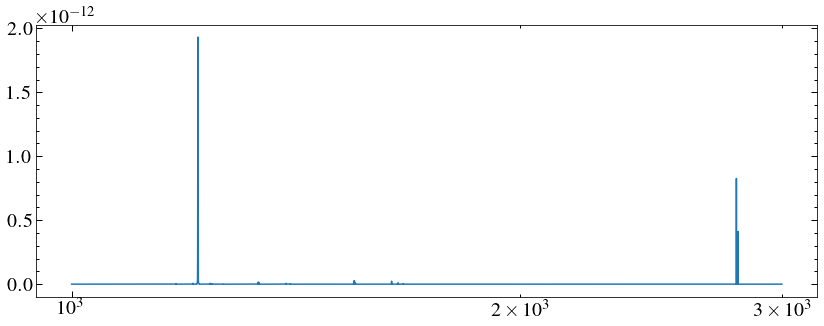

GJ676A


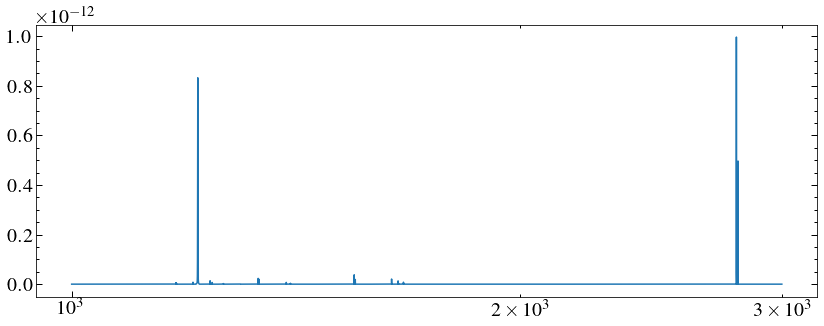

GJ699


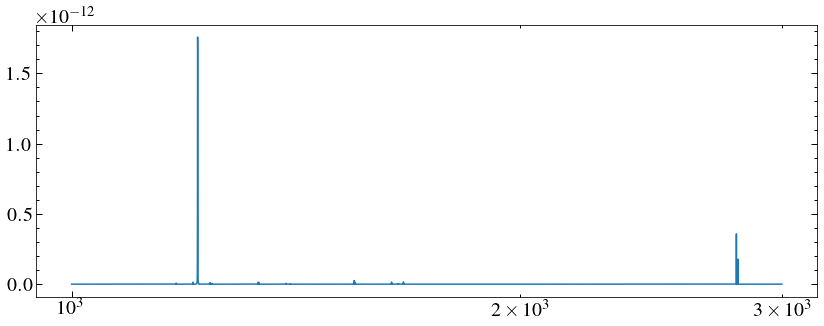

GJ729


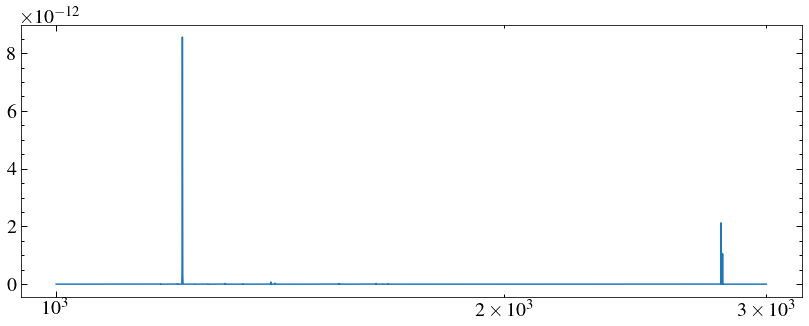

GJ849


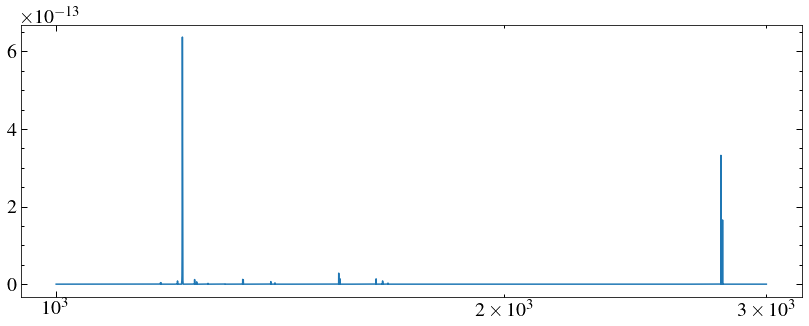

LHS-2686


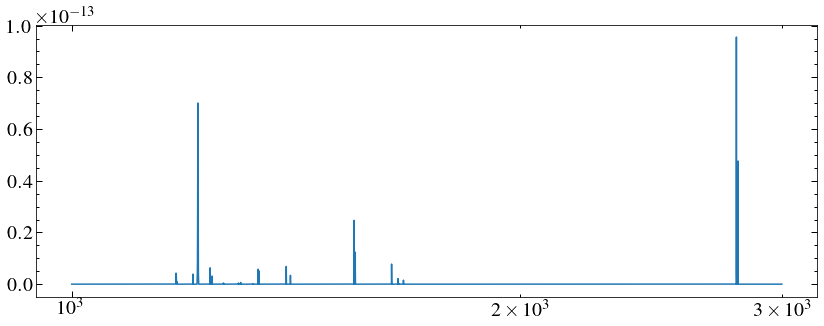

TRAPPIST-1


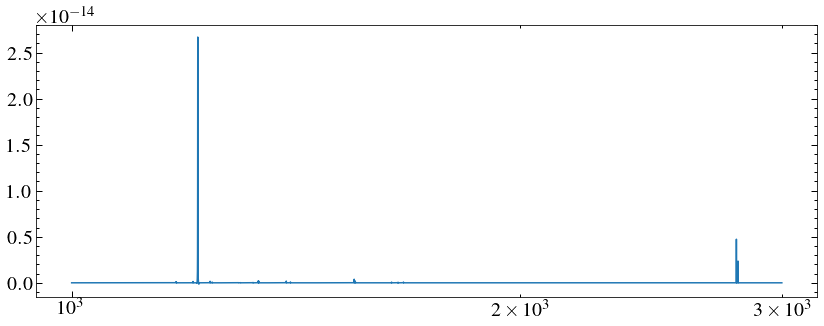

GJ674


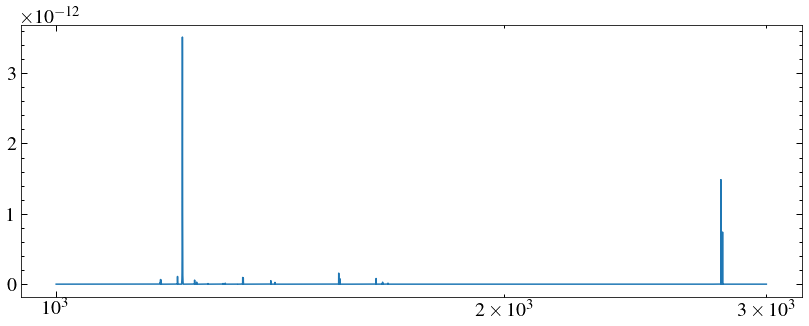

L-980-5


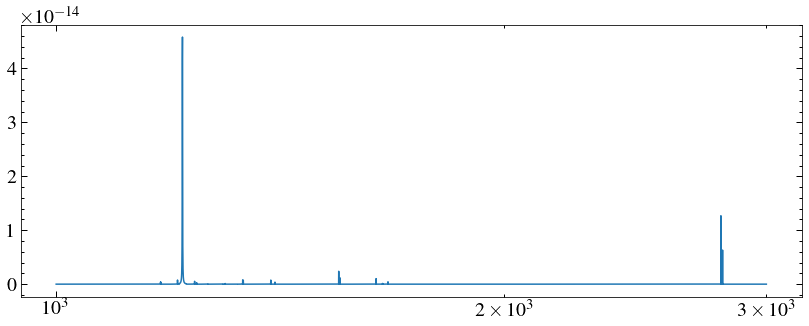

In [20]:
path = '/media/david/2tb_ext_hd/hddata/mega_muscles/v10_hlsp/'
for star in stars:
    if star == '2MASS-J23062928-0502285':
            star = 'TRAPPIST-1'
    lyapath = glob.glob('{}{}/*model_lya*'.format(path, star))[0]
    lyadata = fits.getdata(lyapath, 1)
    lw, lf = lyadata['WAVELENGTH'], lyadata['FLUX']
    linedata = Table.read('line_tables/{}_line_fluxes.ecsv'.format(star))
    mw = np.arange(1000, 3000, 0.01)
    lf = interpolate.interp1d(lw, lf, bounds_error=False, fill_value=0)(mw)
    modlines = models.Const1D(0)
    for i, lines in enumerate(line_groups):
        oss = line_oss[i]
        sum_oss = np.sum(oss)
        for k, line in enumerate(lines):
            stdmod = 0.1
            fmod = linedata['Flux'][i] * (oss[k]/sum_oss) 
            amp = fmod/(stdmod*(2*np.pi)**0.5)
            modlines = modlines+models.Gaussian1D(amplitude=amp, mean=line, stddev = stdmod)
    mf = modlines(mw)
    mf += lf
    print(star)
    plt.plot(mw, mf)
    # plt.yscale('log')
    plt.xscale('log')
    plt.show()



GJ1132
121.78484449480337 5.22480740681187


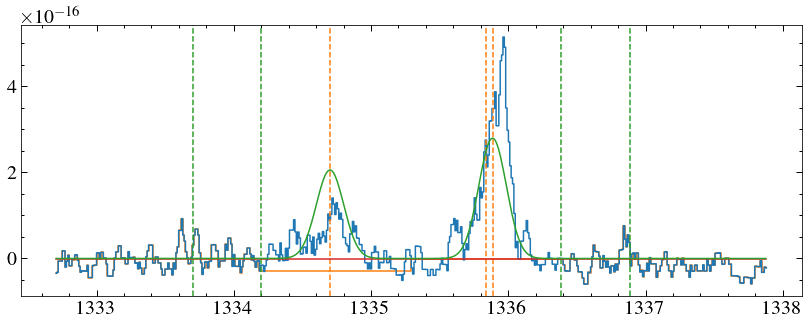

GJ15A
38026.086595878995 580.7328917211438


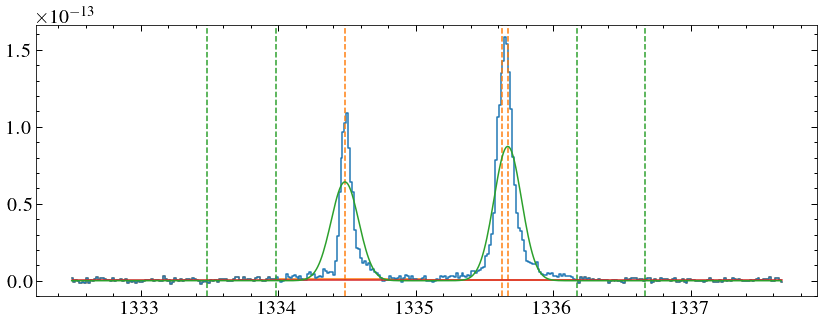

GJ163
434.02365147572965 8.656201711738703


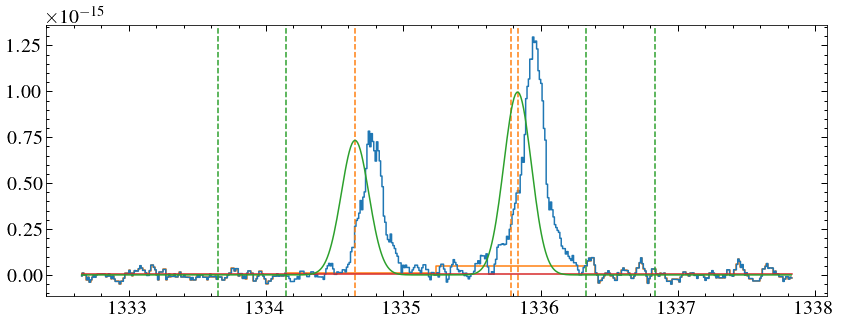

GJ649
7469.393121349226 35.884745089347454


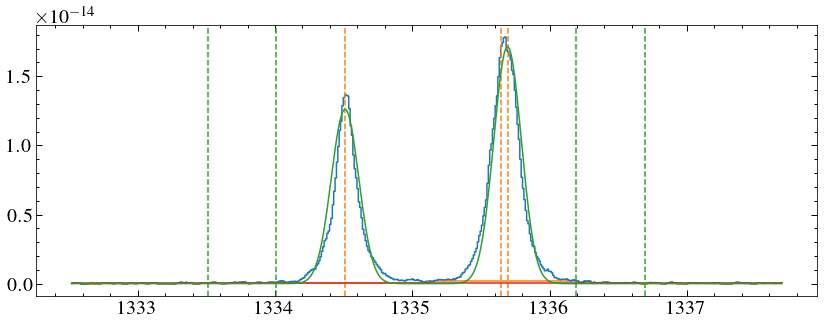

GJ676A
11047.579456214713 50.32957591286645


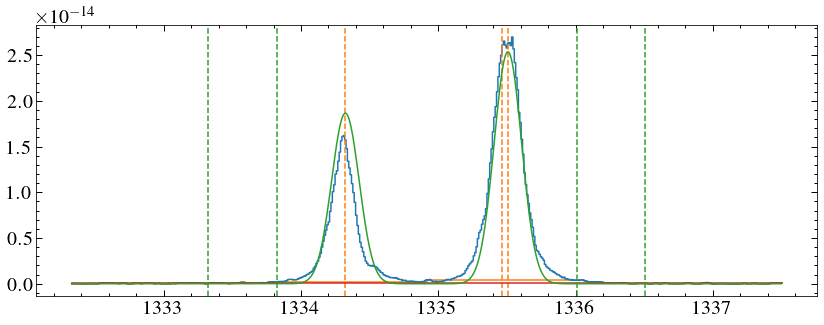

GJ699
6522.055357014729 136.6587619722188


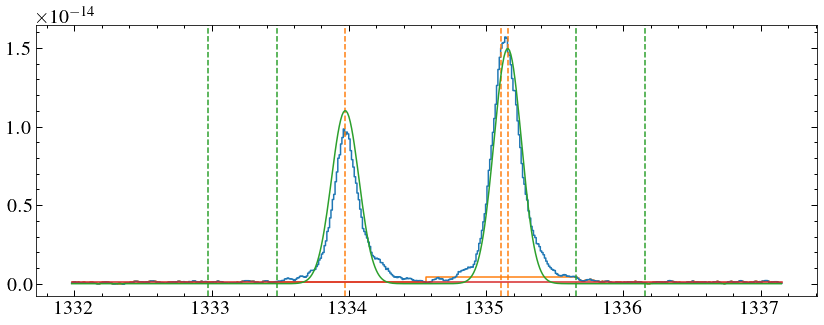

GJ729
4286.355097115414 335.4681523595789


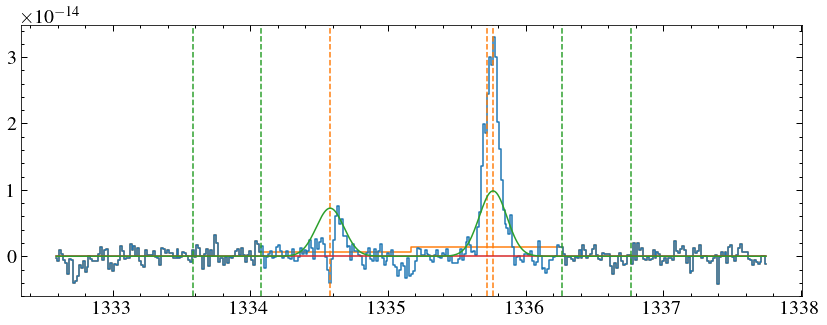

GJ849
5864.776848881163 28.14529462052008


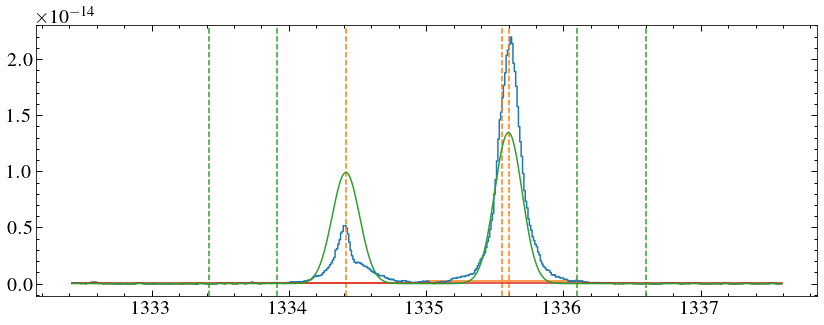

LHS-2686
2748.546257418239 29.517080010779807


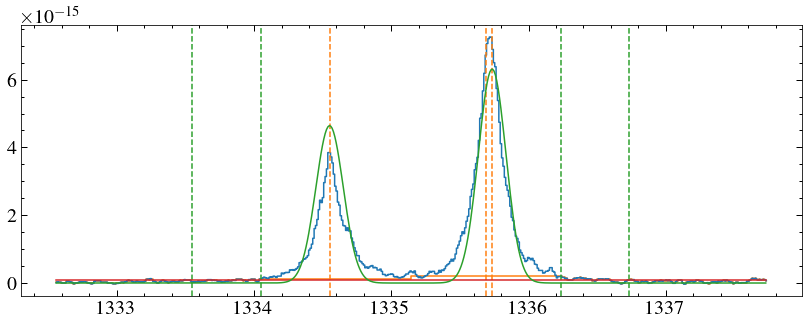

2MASS-J23062928-0502285
96.56660542297044 5.157305277361569


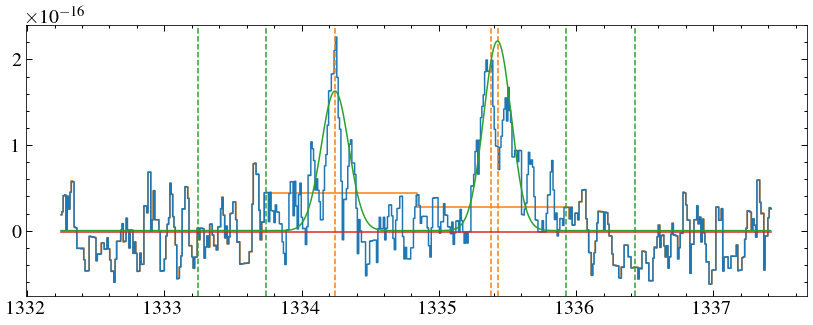

GJ674
45298.33705166947 1167.0184308425141


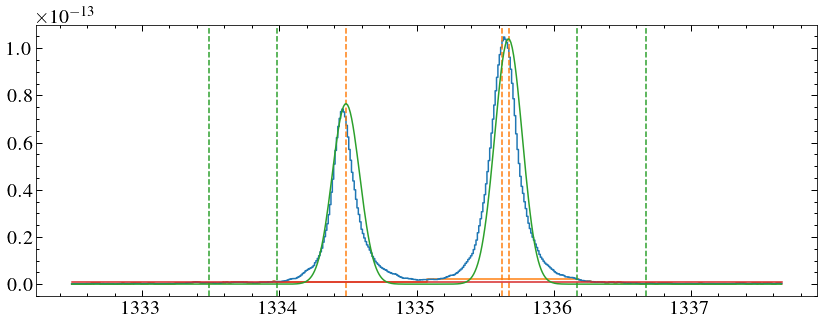

L-980-5
375.3387618730582 10.618378425560197


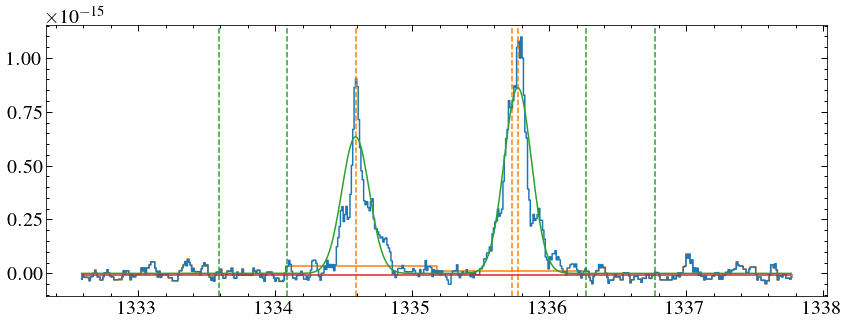

In [21]:
def wavelength_edges(w):
    """
    Calulates w0 and w1
    """
    diff = np.diff(w)
    diff0 = np.concatenate((np.array([diff[0]]), diff)) #adds an extravalue to make len(diff) = len(w)
    diff1 = np.concatenate((diff, np.array([diff[-1]]))) #adds an extravalue to make len(diff) = len(w)
    w0 = w - diff0/2.
    w1 = w + diff1/2.
    return w0, w1

def mask_maker(x, pairs, include=True):
    """
    creates a mask for a spectrum that excudes between pairs from an array
    """
    b = pairs[::2]
    r = pairs[1::2]
    C = np.zeros_like(x,dtype='bool')
    for i in range(len(b)):
        C |= (x>b[i])&(x<r[i])
    if include:
        return ~C
    else:
        return C

def make_line_mask(w, grouped_lines, dv=0*u.km/u.s): 
    """
    makes a list of wavelength ranges to cut
    """
    pairs = []
    for group in grouped_lines:
        group =  dv.to(u.AA, equivalencies=u.doppler_optical(group*u.AA)).value
        pairs.append(min(group)-0.5)    
        pairs.append(max(group)+0.5)
    mask = mask_maker(w, pairs)
    return mask


fitter = fitting.LinearLSQFitter()



for j, spec in enumerate(specs):
 
#     print(spec)
    # plt.figure(figsize = (4*len(doublets), 10))
    # gs = GridSpec(2, 4)
    data = fits.getdata(spec, 1)
    star = fits.getheader(spec)['TARGNAME']
    # if star == 'GJ163':
    if star in stars:
        allfluxes = []
        allerrors = []
        print(star)
        # print(j)
        # print(dv_guess[j])
        # stars.append(star)
        w, f, e, inst = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['INSTRUMENT']
        # lines = line_list[(line_list['Likelihood to measure'] == 'High') | (line_list['Likelihood to measure'] == 'Medium')]['Wavelength']

        smooth =5 

        # dvs = []
        # dv_es = []

        # for i, lines in enumerate(doublets):
    #         plt.subplot(1, len(doublets) , i+1)
            # plt.subplot(gs[0, i])
        # for i, lines in enumerate(line_groups):
        lines = [1334.524, 1335.663, 1335.709]

        stat_lines = np.copy(lines) 
        lines = (final_dv[j]*u.km/u.s).to(u.AA, equivalencies=u.doppler_optical(lines*u.AA)).value
        mask = (w >= min(lines)-7-7) & (w <= max(lines)+7)
        if np.median(inst[mask]) in [1, 2, 16]:
            mask = (w >= min(lines)-2) & (w <= max(lines)+2)
        elif np.median(inst[mask]) in [128]:
            mask = (w >= min(lines)-20) & (w <= max(lines)+20)
        wi, fi, ei = w[mask], f[mask], e[mask]
        # print(fi)
        meane = np.mean(ei)
        for k in range(len(ei)):
            if ei[k] == 0.0:
                ei[k] = meane
        # print(ei)



        if np.median(inst[mask]) in [1, 2]:
            fi = convolve(fi,Box1DKernel(smooth))
            ei = convolve(ei,Box1DKernel(smooth))/smooth**0.5

        cmask = make_line_mask(wi, line_groups, dv=final_dv[j]*u.km/u.s)
        wc, fc, ec, = wi[cmask], fi[cmask], ei[cmask]
        plt.step(wi, fi, where='mid')
        plt.step(wc, fc, where='mid', zorder=-1)
        [plt.axvline(line, ls='--', c='C1') for line in lines]


        c_gap = [4, 7]#distance from lines for continumm calculation
        # std_guess = 0.5
        if np.median(inst[mask]) in [1, 2, 16]:
            c_gap = [0.5, 1] 
        if np.median(inst[mask]) in [128]:
            c_gap = [10, 15] #distance from lines for continumm calculation

        fit_mask = (wc >= (min(lines)-c_gap[1])) & (wc <= (min(lines)-c_gap[0])) | (wc >= (max(lines)+c_gap[0])) & (wc <= (max(lines)+c_gap[1]))
        linemask = (wi >= (min(lines)-c_gap[0])) & (wi <= (max(lines)+c_gap[0]))


        if 1206.499 in stat_lines: #hits the lower SN G140m spectrum at the red end so cutting off the fit
            fit_mask = (wc >= (min(lines)-2)) & (wc <= (min(lines)-c_gap[0])) 
            linemask = (wi >= (min(lines)-c_gap[0])) & (wi <= (max(lines)+0.3))



        [plt.axvline(line, ls='--', c='C2') for line in [min(lines)-c_gap[1], min(lines)-c_gap[0], max(lines)+c_gap[0], max(lines)+c_gap[1]]]
        # mod_init = models.Polynomial1D(4)
        mod_init = models.Const1D(1)
        weights = 1/ec[fit_mask]
        weights = np.nan_to_num(weights, 0)
        # print(weights)
        # print(ec[fit_mask])
        mod_fit = fitter(mod_init, wc[fit_mask], fc[fit_mask])#, weights=1/ec[fit_mask])
        plt.plot(wi, mod_fit(wi), c='C3')

        lw, lf, le = wi[linemask], fi[linemask], ei[linemask]
        # plt.plot(wi[linemask], fi[linemask], c='C4')

        w0, w1 = wavelength_edges(lw)
        lineflux = np.sum((w1-w0)*lf)
        # print(lineflux*1e18)
        # lineflux = np.trapz(lf, lw)
        # print(lineflux*1e18)
        line_error = (np.sum(le**2 * (w1-w0)**2))**0.5
        cflux = np.sum((w1-w0)*mod_fit(lw))
        cerror = (line_error/abs(lineflux))*abs(cflux)
        flux = lineflux - cflux
        flux_error = (line_error**2+cerror**2)**0.5
        print(flux*1e18, flux_error*1e18)

        modlines = models.Const1D(0)
        # modlines = mod_fit
        oss = [1.29e-01*4, 1.27e-02,1.15e-01*6]
        sum_oss = np.sum(oss)
        # ampsum = 0
        for k, line in enumerate(lines):
            stdmod = 0.1
            fmod = flux * (oss[k]/sum_oss) 
            amp = fmod/(stdmod*(2*np.pi)**0.5)
            # ampsum += amp
            modlines = modlines+models.Gaussian1D(amplitude=amp, mean=line, stddev = stdmod)
        wmod = np.arange(wi[0], wi[-1], 0.01)
        plt.plot(wmod, modlines(wmod))

        if flux > flux_error:
            allfluxes.append(flux)
            allerrors.append(flux_error)
        else:
            allfluxes.append(flux_error)
            allerrors.append(-1.0)



        plt.show()
        allfluxes = np.array(allfluxes)
        allerrors = np.array(allerrors)
        if star == '2MASS-J23062928-0502285':
            star = 'TRAPPIST-1'
        # savdat = Table([line_names_mult, line_tab*u.AA, allfluxes*u.erg/u.s/u.cm**2/u.AA, allerrors*u.erg/u.s/u.cm**2/u.AA], names=['Line', 'Wavelength', 'Flux', 'Error'])
            # ascii.write(savdat, 'line_tables/{}_line_fluxes.ecsv'.format(star), format='ecsv', overwrite=True)


In [22]:
 1.56e-01/7.8e-2

2.0

In [23]:
1.29e-1/1.15e-1

1.1217391304347826